# Import Project Dependencies

In [1]:
!pip install xgboost

You should consider upgrading via the 'c:\users\kanishk verma\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import time
import json
import csv
import pandas as pd
import numpy as np
import pickle
import nltk
from nltk.corpus import stopwords
from stanfordcorenlp import StanfordCoreNLP
from pycorenlp import StanfordCoreNLP
import os

from sklearn.ensemble import RandomForestClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras import layers
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import xml.etree.ElementTree as ET, getopt, logging, sys, random, re, copy, os
from lxml import etree
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

from keras import backend as K

import matplotlib.pyplot as plt
from sklearn import svm

from sklearn.feature_extraction.text import TfidfVectorizer
import scipy

import glob
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from numpy import where
from imblearn.over_sampling import SVMSMOTE
from matplotlib import pyplot
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC, SVC
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import ADASYN


C:\Users\Kanishk Verma\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Kanishk Verma\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Kanishk Verma\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)
[nltk_data] Downloading package vader_lexicon to C:\Users\Kanishk
[nltk_data]     Verma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Using TensorFlow backend.
C:\Users\Kanishk Verma\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Kanishk Verma\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is depre

# Setting Paths

In [3]:
# Path for Feature Jsons
path1 = r'C:\Users\Kanishk Verma\Desktop\Practicum\DepTag\AirlineRatings'
path2 = r'C:\Users\Kanishk Verma\Desktop\Practicum\DepTag\TripAdvisor'

In [4]:
#Path for Trained CRF Model
modelPath = r'C:\Users\Kanishk Verma\Desktop\Practicum\Code'

In [5]:
#Path for Aspect Labelled Csvs
aspectPath = r'C:\Users\Kanishk Verma\Desktop\Practicum\Final\FinalLabelsv2'

# Stop Words

In [6]:
stop_words = list(stopwords.words('english'))
newStop = ['was', 'and', 'the', 'to', 'in', 'of', 'a', 'an', 'is', 'were', 'for', 'with', 'are', 'one', 'our', 'gave', 'have',
           'me', 'an', 'i', 'or', 'had', 'did', 'get', 'made', 'take', 'given', 'told', 'let', 'us', "n't", 'air', 'one', 'two', 'three', 
          'four', 'five', 'thousand', 'cc', 'twenty', 'ten', 'hundred', 'eightyseven']
stop_words = stop_words+newStop
stop_words.remove('not')

# Helper Functions

In [7]:
def load(path1, path2):
    
    '''
    This function takes all feature produced jsons for data from both Airline Ratings and TripAdvisor and merges them together
    This function creates a Corpus and produces 2 lists.
    1st List called finInfo --> produces final information of each review
    2nd List called finDet --> produces detailed information of each review
    
    This function returns Corpus and 2 lists.
    '''
    print("Begnning Loading Process\n")
    tic = time.perf_counter()
    file1 = glob.glob(path1+r'/*.json')
    file2 = glob.glob(path2+r'/*.json')
    
    files = file1+file2
    
    print("There are a total of: "+str(len(files))+" files to process")
    finInfo = []
    
    for i in range(len(files)):
        for line in open(files[i], encoding='utf-8'):
            info = json.loads(line) 
        finInfo.append(info)
    
    print("\nCreating Corpus")
    labelledWords = []
    for i in range(len(finInfo)):
        for j in range(len(finInfo[i])):
            info = finInfo[i][j]
            labels = info['Labels']
            for p in range(len(labels)):
                for k,v in labels[p].items():
                    for l in range(len(v)):
                        lblWrd = v[l].split()
                        for w in lblWrd:
                            if (w not in stop_words):
                                labelledWords.append(w)
    labelledWords = list(set(labelledWords))
    
    neglist = []
    with open(r'C:\Users\Kanishk Verma\Desktop\Practicum\DepTag\negative-words-list.csv', "rt") as infile:
        csvreader = csv.reader(infile)
        for row in csvreader:
            neglist.append(row[0])
    poslist= []
    with open(r'C:\Users\Kanishk Verma\Desktop\Practicum\DepTag\positive-words-list.csv', "rt") as infile1:
        csvreader = csv.reader(infile1)
        for row in csvreader:
            poslist.append(row[0])
            
    labelledWords = labelledWords + neglist + poslist
    print("\nCorpus Created")
    print("\nCorpus consists of "+ str(len(labelledWords))+" words.")
    
    
    finDet = []
    for i in range(len(finInfo)):
        info = finInfo[i]
        det = []
        for j in range(len(info)):
            dic = {}
            if (info[j]['Details'] != []):
                dic['id'] = info[j]['id']
                dic['sentence'] = info[j]['sentence']
                dic['details'] = info[j]['Details']
                #dic['id'] = info[j]['id']
                det.append(dic)
        finDet.append(det)
    print("\nAll "+str(len(finDet))+" files have been processed")
    toc = time.perf_counter()
    
    tot = toc - tic
    
    print("Loading function took "+str(tot)+" seconds to load files")
    
    
    return finDet, labelledWords, finInfo

In [8]:
def process(finInfo, corpus, stop_words):
    '''
    This function takes final Information of all airlines as input in the form of a list produced from load process.
    It iterates over all reviews and gathers word, pos-tag, dep-tag, sentiment, the entity the main-word belongs to, the id
    of the review the combination belongs to, previous and next word information
    It returns a list of all these combinations
    The return list has these combinations stored in tuples.
    Each tuple is of the form
    (MAIN-WORD, MAIN-WORD-POS-TAG, DEPENDENT-WORD, DEPENDENT-WORD-POS-TAG, DEPENDENCY-TAG, MAIN-WORD-SENTIMENT-SCORE,
    PREVIOUS WORD, NEXT WORD, ENTITY, ID)
    '''
    
    print("\n Beginning the process function\n")
    tic = time.perf_counter()
    
    #Change Bookings to Off-flight
    for i in range(len(finInfo)):
        info = finInfo[i]
        for j in range(len(info)):
            det = info[j]['Details']
            for k in range(len(det)):
                if (det[k][-1]) == 'b':
                    det[k][-1] = 'o'
    
    #Get ID and Details
    details = []
    for i in range(len(finInfo)):
        info = finInfo[i]
        for j in range(len(info)):
            dic = {}
            ids = info[j]['id']
            sent = info[j]['sentence']
            newSent = ' '.join(sent)
            dic['sentences'] = sent
            sentTkn = newSent.split()
            det = info[j]['Details']
            nli = []
            for k in range(len(det)):
                li = []
                for l in range(len(sentTkn)):
                    if (det[k][0] == 1):  
                        word = det[k][2][0]
                        if word in corpus and word not in stop_words:
                            if word == sentTkn[l]:
                                if (l == 0):
                                    a = (word, det[k][2][1], det[k][1][0], det[k][1][1], det[k][2][2], det[k][3], '', sentTkn[l+1], det[k][4], ids)
                                elif (l == len(sentTkn)-1):
                                    a = (word, det[k][2][1], det[k][1][0], det[k][1][1], det[k][2][2], det[k][3], sentTkn[l-1], '', det[k][4], ids)
                                else:
                                    a = (word, det[k][2][1], det[k][1][0], det[k][1][1], det[k][2][2], det[k][3], sentTkn[l-1], sentTkn[l+1], det[k][4], ids)
                    else:
                        word = det[k][1][0]
                        if word in corpus and word not in stop_words:
                            if word == sentTkn[l]:
                                if (l == 0):
                                    a = (word, det[k][1][1], det[k][1][2], det[k][2][0], det[k][2][1], '', sentTkn[l+1], det[k][4], ids)
                                elif (l == len(sentTkn)-1):
                                    a = (word, det[k][1][1], det[k][1][2], det[k][2][0], det[k][2][1], sentTkn[l-1], '', det[k][4], ids)
                                else:
                                    a = (word, det[k][1][1], det[k][1][2], det[k][2][0], det[k][2][1], sentTkn[l-1], sentTkn[l+1], det[k][4], ids)
                li.append(a)
                li = list(set(li))
                nli.append(li)
            dic['details'] = nli
            details.append(dic)
    
    print("\nDetails has "+str(len(details))+" reviews and their combinations")
    toc = time.perf_counter()
    
    tot = toc - tic
    
    print("\nThis function took "+str(tot)+" seconds to complete");
    return details

In [9]:
def getEntityData(details):
    '''
    This function gets entity related data
    It contains only combinations that are unique.
    Return type is list
    Input type is from process function i.e. also list.
    '''
    print("\n Getting Entity")
    tic = time.perf_counter()
    print("\nTotal number of reviews processed are: "+str(len(details)))
    data = []
    for i in range(len(details)):
        if details[i]['details'] != []:
            det = details[i]['details']
            for d in det:
                for combos in d:
                    data.append(combos)

    data = list(set(data))
    print("Entity list has "+str(len(data))+" relevant data")
    toc = time.perf_counter()
    
    tot = toc - tic
    
    print("\nThis function took "+str(tot)+" seconds to complete");

    
    return data

In [10]:
def getEntityDataframe(data):
    '''
    This function is part of the data preparation for multi-class classification model.
    Input is from getEntityData function i.e. list.
    Returns a dataframe
    '''
    
    print("\n Getting Entity DataFrame")
    tic = time.perf_counter()
    columns=['main','main_pos','dep','dep_pos','main_sent','dep_tag','prev','next','entity','id']
    
    df_entity = pd.DataFrame(data)
    
    df_entity.columns = columns
    print("\n The entity dataframe has "+str(len(df_entity))+" data")
    toc = time.perf_counter()
    
    tot = toc - tic
    
    print("\nThis function took "+str(tot)+" seconds to complete");

    return df_entity

In [11]:
def getAspect(string):
    '''
    This function is called by getAspectFrame function.
    A string i.e. entity name is passed and it gets the aspect list of that entity.
    It returns a dataframe of the specific entity mentioned while calling the entity.
    '''
    fileAsp = glob.glob(aspectPath+r'\*.csv')
    
    for i in range(len(fileAsp)):
        if string in fileAsp[i]:
            df0 = pd.read_csv(fileAsp[i])
            df0 = df0.rename(columns={string:'word'})
            df1 = df0[df0['Aspect'].notna()]
            df1 = df1[df1['word'].notna()]
            string = string.lower()
            
            df1['Aspect'] = string+'_'+df1['Aspect'].str.lower().astype(str)
            
    df = df1[['id','id_updated', 'Aspect', 'word']]
    
    return df

In [12]:
def getAspectFrame():
    '''
    This function calls all entities and using getAspect function gets the aspect list.
    It creates a new dataframe for each entity.
    It merges all entity dataframes into one and returns this aspect dataframe
    '''
    print("\n Getting all Aspects")
    
    tic = time.perf_counter()
    dfCabin = getAspect('Cabin')
    dfFood = getAspect('Food')
    dfEnt = getAspect('Entertainment')
    dfPos = getAspect('Possession')
    dfSeat = getAspect('Seat')
    dfStaff = getAspect('Staff')
    dfInf = getAspect('Inflight')
    dfOff = getAspect('Offflight')
    
    df_list = [dfCabin, dfFood, dfEnt, dfInf, dfOff, dfPos, dfSeat, dfStaff]
    
    df_aspect=pd.concat(df_list, ignore_index=True)
    
    toc = time.perf_counter()
    
    tot = toc - tic
    
    print("\nThis function took "+str(tot)+" seconds to complete");

    return df_aspect

In [13]:
def callAll(path1, path2):
    '''
    This is a calling function to call all functions.
    It returns
    finDetails (list), corpus(list), finInfo(list), data(list), df_entity(dataframe),
    df_aspect(dataframe), df_data(dataframe)
    '''
    print("***START***\n")
    tic = time.perf_counter()
    
    finDet, corpus, finInfo = load(path1, path2)
    

    details = process(finInfo, corpus, stop_words)
    data = getEntityData(details)
    df_entity = getEntityDataframe(data)
    df_aspect = getAspectFrame()
    df_data=pd.merge(df_entity, df_aspect, how='inner', left_on=['id','main'], right_on=['id','word'],
         left_index=False, right_index=False, sort=True)
    
    print("***END***")
    
    toc = time.perf_counter()
    
    tot = toc - tic
    
    print("\n***Total time taken for all functions to process is "+str(tot)+" seconds***");

    
    return finDet, corpus, finInfo, details, data, df_entity, df_data, df_aspect

In [14]:
finDet, corpus, finInfo, details, data, df_entity, df_data, df_aspect = callAll(path1, path2)

***START***

Begnning Loading Process

There are a total of: 21 files to process

Creating Corpus

Corpus Created

Corpus consists of 9714 words.

All 21 files have been processed
Loading function took 0.407416000000012 seconds to load files

 Beginning the process function


Details has 1803 reviews and their combinations

This function took 250.55480809999995 seconds to complete

 Getting Entity

Total number of reviews processed are: 1803
Entity list has 12574 relevant data

This function took 0.009097200000041994 seconds to complete

 Getting Entity DataFrame

 The entity dataframe has 12574 data

This function took 0.021967200000062803 seconds to complete

 Getting all Aspects

This function took 0.6983111999998073 seconds to complete
***END***

***Total time taken for all functions to process is 251.9117928999999 seconds***


# Vectorising Data using Word Embeddings and Cosine Distances

In [15]:
# Loading Trained CRF Model
pickle_obj = open(r"C:\Users\Kanishk Verma\Desktop\Practicum\Code\embedding.pickle", "rb") #location to your pickle file.
wvec = pickle.load(pickle_obj)
pickle_obj.close()

def cosine_distance_between_two_words(word1, word2):
    '''
    Takes input of words and returns the cosine distance of each word.
    '''
    return (1- scipy.spatial.distance.cosine(wvec[word1], wvec[word2]))

In [16]:
def getAllReviews(finInfo):
    allReviews = []
    for i in range(len(finInfo)):
        for j in range(len(finInfo[i])):
            info = finInfo[i][j]
            sent = info['sentence']
            review = []
            for s in sent:
                review.append(s)
            newSent = ' '.join(review)
            allReviews.append(newSent)
    
    return allReviews

In [17]:
def vectorizing(finInfo, stop_words, df_data):
    
    reviews = getAllReviews(finInfo)
    
    transformer = TfidfTransformer()
    cvec = CountVectorizer(stop_words=stop_words)
    tokenizer = Tokenizer(num_words = 5000)
    sf = cvec.fit_transform(reviews)
    
    transformed_weights = transformer.fit_transform(sf)
    
    weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
    weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
    
    dff=weights_df.sort_values(by='weight', ascending=False)
    
    df_data['main_s']=df_data['main'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: round(float(dff[dff['term']==x]['weight']),7) if x in list(dff['term']) else 0)
    df_data['dep_s']=df_data['dep'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: round(float(dff[dff['term']==x]['weight']),7) if x in list(dff['term']) else 0)
    df_data['prev_s']=df_data['prev'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: round(float(dff[dff['term']==x]['weight']),7) if x in list(dff['term']) else 0)
    df_data['next_s']=df_data['next'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: round(float(dff[dff['term']==x]['weight']),7) if x in list(dff['term']) else 0)
    
    
    lst1= []
    for i in zip(df_data['main'],df_data['dep']):
        try:
            lst1.append(float(cosine_distance_between_two_words(i[0],i[1])))
        except:
            lst1.append(float(0))
            continue;
    df_data['dep_d']=lst1
    
    lst2=[]
    for i in zip(df_data['main'],df_data['prev']):
        try:
            lst2.append(float(cosine_distance_between_two_words(i[0],i[1])))
        except:
            lst2.append(float(0))
            continue;
    df_data['prev_d']=lst2

    lst3=[]
    for i in zip(df_data['main'],df_data['next']):
        try:
            lst3.append(float(cosine_distance_between_two_words(i[0],i[1])))
        except:
            lst3.append(float(0))
            continue;
    df_data['next_d']=lst3
    
    
    df_data['main_s']=df_data['main'].apply(lambda x: float(format(wvec[x].mean(), '.8f')) if x in wvec.keys() else 0)
    df_data['dep_s']=df_data['dep'].apply(lambda x: float(format(wvec[x].mean(), '.8f')) if x in wvec.keys() else 0)
    df_data['prev_s']=df_data['prev'].apply(lambda x: float(format(wvec[x].mean(), '.8f')) if x in wvec.keys() else 0)
    df_data['next_s']=df_data['next'].apply(lambda x: float(format(wvec[x].mean(), '.8f')) if x in wvec.keys() else 0)
    
    
    df_main_pos=pd.get_dummies(df_data['main_pos'],prefix='main_pos')
    df_dep_pos=pd.get_dummies(df_data['dep_pos'],prefix='dep_pos')
    df_dep_tag=pd.get_dummies(df_data['dep_tag'],prefix='dep_tag')
    
    
    df_data2=pd.concat([df_data,df_main_pos,df_dep_pos,df_dep_tag], axis=1)
    
    new_columns=['main_s','dep_s', 'prev_s', 'next_s','main_sent'] + list(df_main_pos.columns)+ list(df_dep_pos.columns)+ list(df_dep_tag.columns)+['Aspect']
    
    
    df_data3=df_data2[new_columns]
    
    df_data3['Aspect']=df_data3['Aspect'].str.lower()
    
    x_columns=['main_s','dep_s', 'prev_s', 'next_s','main_sent'] + list(df_main_pos.columns)+ list(df_dep_pos.columns)+ list(df_dep_tag.columns)
    
    return df_data3, x_columns

In [18]:
df_data3, x_columns = vectorizing(finInfo, stop_words, df_data)

C:\Users\Kanishk Verma\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
df_data3['main_sent'] = df_data3['main_sent'].astype('float64')

# Class Imbalance Check

In [20]:
def imbalanceCheck(string):
    imb = df_data3['Aspect'].where(df_data3['Aspect'].str.startswith(string)).dropna().value_counts()

    print(imb)

In [21]:
def checkImbalance():
    entitylist = ['cabin', 'entertainment', 'food', 'possession', 'inflight', 'offflight', 'seat', 'staff']
    for i in range(len(entitylist)):
        print("Checking imbalance in class for: **"+str(entitylist[i].upper())+"**")
        print("\n")
        imbalanceCheck(entitylist[i])
        print("\n")

In [22]:
checkImbalance()

Checking imbalance in class for: **CABIN**


cabin_condition      182
cabin_size            61
cabin_temperature     39
cabin_fragrance       20
Name: Aspect, dtype: int64


Checking imbalance in class for: **ENTERTAINMENT**


entertainment_general    211
entertainment_visual     154
entertainment_audio       26
Name: Aspect, dtype: int64


Checking imbalance in class for: **FOOD**


food_service        934
food_taste          157
food_temperature     32
Name: Aspect, dtype: int64


Checking imbalance in class for: **POSSESSION**


possession_general     575
possession_handling    412
Name: Aspect, dtype: int64


Checking imbalance in class for: **INFLIGHT**


inflight_operations    327
inflight_facility      263
Name: Aspect, dtype: int64


Checking imbalance in class for: **OFFFLIGHT**


offflight_facility     1114
offflight_general       871
offflight_ticketing     614
Name: Aspect, dtype: int64


Checking imbalance in class for: **SEAT**


seat_comfort       587
seat_operations    

# Implicit Aspect Classification

## 1. Decision Trees
## 2. Random Forest
## 3. Support Vector Machines
## 4. XGBoost
## 5. Voting Classifer

## 1. Decision Trees

In [23]:
from collections import Counter

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
def evaluations(model, y_test, y_pred, string1):
    report = metrics.classification_report(y_test, y_pred)
    lb = LabelBinarizer()
    lb.fit(y_test)

    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    roc_auc = roc_auc_score(y_test, y_pred, average="macro")
  
    fpr, tpr, _ = metrics.roc_curve(y_test.ravel(), y_pred.ravel())

    precision, recall, _ = metrics.precision_recall_curve(y_test.ravel(), y_pred.ravel())


    errors = abs(y_pred.ravel() - y_test.ravel())

    fig, ax = pyplot.subplots()
    ax.set_title("ROC-AUC Curve")
    ax.plot(fpr, tpr, marker='.', label=string1)
    # axis labels
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ## show the legend
    ax.legend()
    # show the plot
    plt.show()

    ax.cla()
    # plot the precision-recall curves
    ax.set_title("Precision-Recall Curves")
    ax.plot(recall, precision, marker='.', label=string1)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    #fig.savefig(pathTA+r'/'+modelname+'_Precision-Recall Curve.png')

    plt.show()
    
    f1 = f1_score(y_test.ravel(), y_pred.ravel())
  
  
    ax.cla()
  
    txt = "Metrics for "+ string1+" trained on Original Data\n 1. ROC AUC Score: "+str(roc_auc)+"\t\n 2. F1 Score: "+str(f1)+"\t\n 3. Average absolute error: "+str(round(np.mean(errors), 2))+" degrees"

    #text_file = open(pathTA+r'/'+"evaluation_metrics_"+modelname+".txt", 'w')
    #n = text_file.write(txt)
    print("\n Classification Report is as follows\n"+report)
    #text_file.close()
    print("\n"+txt)

In [26]:
def classDist(X, y, counter):
    print("\n Viewing class scattered distribution")
    for label, _ in counter.items():
        x = []
        t = []
        row_ix = where(y==label)[0]
        for i in range(len(row_ix)):
            x.append(X.iloc[row_ix[i]][0])
            t.append(X.iloc[row_ix[i]][1])
        pyplot.scatter(x, t, label=str(label))
    pyplot.legend()
    pyplot.show()

In [27]:
def getData(string2):
    df = df_data3.where(df_data3['Aspect'].str.startswith(string2)).dropna()
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    
    return X,y, df

In [28]:
X,y,df = getData('food')

In [29]:
def smote_oversampling(X,y):
    oversample = SVMSMOTE()
    
    X_resampled, y_resampled = oversample.fit_resample(X,y)
    
    return X_resampled, y_resampled

In [30]:
def adasyn_oversampling(X,y):
    oversample = ADASYN(sampling_strategy='minority')
    X_resampled, y_resampled = oversample.fit_sample(X, y)
    
    return X_resampled, y_resampled

In [31]:
def decisionFin(string1, string2, string3):
    X,y, df = getData(string2)
    print("\nBeginning the Decision Tree Classification Model Processing")
    dclf = DecisionTreeClassifier(random_state=0)
        
    counter = Counter(y)
    print(counter)
        
    classDist(X, y, counter)
        
    print("\n Training without fixing imbalance")
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    dclf.fit(X_train, y_train)
    pred = dclf.predict(X_test)
        
    evaluations(dclf, y_test, pred, string1)
        
    print("\n Fixing Imbalance")
    if (string3 == 'SMOTE'):
        print("\nUsing SMOTE")
        X,y = smote_oversampling(X,y)
        
    elif (string3 == 'ADASYN'):
        print("\n Using ADA SYN")
        X,y = adasyn_oversampling(X,y)
    
    counter = Counter(y)
    print("\n After fixing imbalance")
    print(counter)
        
    classDist(X, y, counter)
        
    print("\nTraining Fresh")
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    dclf.fit(X_train, y_train)
    pred = dclf.predict(X_test)
        
    evaluations(dclf, y_test, pred, string1)
    
  

In [32]:
def randomFin(string1, string2, string3):
    X,y, df = getData(string2)
    print("\nBeginning the Random Forest Classification Model Processing")
    rclf = RandomForestClassifier(n_estimators=150)
        
    counter = Counter(y)
    print(counter)
        
    classDist(X, y, counter)
        
    print("\n Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach")
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    rclf.fit(X_train, y_train)
    pred = rclf.predict(X_test)
        
    evaluations(rclf, y_test, pred, string1)
        
    print("\n Fixing Imbalance")
        
    if (string3 == 'SMOTE'):
        print("\nUsing SMOTE")
        X,y = smote_oversampling(X,y)
        
    elif (string3 == 'ADASYN'):
        print("\n Using ADA SYN")
        X,y = adasyn_oversampling(X,y)
    counter = Counter(y)
    print("\n After fixing imbalance")
    print(counter)
        
    classDist(X, y, counter)
        
    print("\nTraining Fresh")
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    rclf.fit(X_train, y_train)
    pred = rclf.predict(X_test)
        
    evaluations(rclf, y_test, pred, string1)
    

In [33]:
def svmFin(string1, string2, string3):
    X,y, df = getData(string2)
    print("\nBeginning the Linear Support Vector Machine Classification Model Processing")
    lin_clf = svm.LinearSVC()
        
    counter = Counter(y)
    print(counter)
        
    classDist(X, y, counter)
        
    print("\n Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach")
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    lin_clf.fit(X_train, y_train)
    pred = lin_clf.predict(X_test)
        
    evaluations(lin_clf, y_test, pred, string1)
        
    print("\n Fixing Imbalance")
        
    if (string3 == 'SMOTE'):
        print("\nUsing SMOTE")
        X,y = smote_oversampling(X,y)
        
    elif (string3 == 'ADASYN'):
        print("\n Using ADA SYN")
        X,y = adasyn_oversampling(X,y)
    counter = Counter(y)
    print("\n After fixing imbalance")
    print(counter)
        
    classDist(X, y, counter)
        
    print("\nTraining Fresh")
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    lin_clf.fit(X_train, y_train)
    pred = lin_clf.predict(X_test)
        
    evaluations(lin_clf, y_test, pred, string1)
   

In [34]:
def xgFin(string1, string2, string3):
    X,y, df = getData(string2)
    print("\nBeginning the XG Boost Classification Model Processing")
    countClass = list(Counter(y))
    if len(countClass) == 2:
        print("\n Using LOGISTIC BINARY classification for XG Boost since there are only "+str(len(countClass))+" classes\n")
        xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)#objective="multi:softprob", random_state=42)
        counter = Counter(y)
        print(counter)
        
        classDist(X, y, counter)
        
        print("\n Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach")
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        xgb_model.fit(X_train, y_train)
        pred = xgb_model.predict(X_test)
        
        evaluations(xgb_model, y_test, pred, string1)
        
        print("\n Fixing Imbalance")
        
        if (string3 == 'SMOTE'):
            print("\nUsing SMOTE")
            X,y = smote_oversampling(X,y)
        
        elif (string3 == 'ADASYN'):
            print("\n Using ADA SYN")
            X,y = adasyn_oversampling(X,y)
        
        counter = Counter(y)
        print("\n After fixing imbalance")
        print(counter)
        
        classDist(X, y, counter)
        
        print("\nTraining Fresh")
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        xgb_model.fit(X_train, y_train)
        pred = xgb_model.predict(X_test)
        
        evaluations(xgb_model, y_test, pred, string1)
    else:
        print("\n Using MULTICLASS SOFTMAX classification approach for XG Boost since there are "+str(len(countClass))+" classes\n")
        xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
        counter = Counter(y)
        print(counter)
        
        classDist(X, y, counter)
        
        print("\n Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach")
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        xgb_model.fit(X_train, y_train)
        pred = xgb_model.predict(X_test)
        
        evaluations(xgb_model, y_test, pred, string1)
        
        print("\n Fixing Imbalance")
        
        if (string3 == 'SMOTE'):
            print("\nUsing SMOTE")
            X,y = smote_oversampling(X,y)
        
        elif (string3 == 'ADASYN'):
            print("\n Using ADA SYN")
            X,y = adasyn_oversampling(X,y)
        
        counter = Counter(y)
        print("\n After fixing imbalance")
        print(counter)
        
        classDist(X, y, counter)
        
        print("\nTraining Fresh")
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        xgb_model.fit(X_train, y_train)
        pred = xgb_model.predict(X_test)
        
        evaluations(xgb_model, y_test, pred, string1)


In [35]:
def votingFin(string1, string2, string3):
    rnf = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 42)
    xtratree =  ExtraTreesClassifier(n_jobs=-1, random_state=42, bootstrap=True, max_depth=100,
                                  max_features= 3, min_samples_leaf= 3, min_samples_split= 10,
                                  n_estimators=200, class_weight='balanced_subsample', )
    dtree = DecisionTreeClassifier(splitter='random',random_state=42)
    bag = BaggingClassifier(random_state=42, base_estimator=dtree)
    estimators=[('rnf', rnf),('bag', bag), ('extra', xtratree)]
    ensemble = VotingClassifier(estimators, voting='hard')
    
    X,y, df = getData(string2)
    print("\nBeginning the Voting Classifier Model Processing")
    
        
    counter = Counter(y)
    print(counter)
        
    classDist(X, y, counter)
        
    print("\n Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach")
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    ensemble.fit(X_train, y_train)
    pred = ensemble.predict(X_test)
        
    evaluations(ensemble, y_test, pred, string1)
        
    print("\n Fixing Imbalance")
        
    if (string3 == 'SMOTE'):
        print("\nUsing SMOTE")
        X,y = smote_oversampling(X,y)
        
    elif (string3 == 'ADASYN'):
        print("\n Using ADA SYN")
        X,y = adasyn_oversampling(X,y)
        
    counter = Counter(y)
    print("\n After fixing imbalance")
    print(counter)
        
    classDist(X, y, counter)
        
    print("\nTraining Fresh")
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    ensemble.fit(X_train, y_train)
    pred = ensemble.predict(X_test)
        
    evaluations(ensemble, y_test, pred, string1)

In [36]:
def model(string1, string2, string3):
    #try:
        if (string1=='decision'):
            decisionFin(string1, string2, string3)
        elif (string1 == 'random'):
            randomFin(string1, string2, string3)
        elif (string1 == 'svm'):
            svmFin(string1, string2, string3)
        elif (string1 == 'xg' or string1=='xgboost'):
            xgFin(string1, string2, string3)
        elif(string1=='voting'):
            votingFin(string1, string2, string3)
        else:
            print(string1+" is not a model")
    #except:
       # print("Invalid entity name")
     #   pass;

# Food


Beginning the Linear Support Vector Machine Classification Model Processing
Counter({'food_service': 934, 'food_taste': 157, 'food_temperature': 32})

 Viewing class scattered distribution


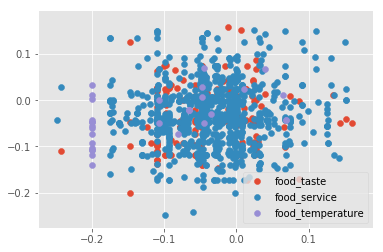


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


C:\Users\Kanishk Verma\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


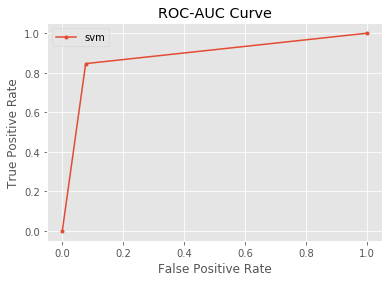


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.87      0.97      0.91       314
      food_taste       0.50      0.21      0.30        47
food_temperature       0.00      0.00      0.00        10

        accuracy                           0.85       371
       macro avg       0.46      0.39      0.40       371
    weighted avg       0.80      0.85      0.81       371


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.5542488704415351	
 2. F1 Score: 0.8463611859838275	
 3. Average absolute error: 0.1 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'food_taste': 934, 'food_service': 934, 'food_temperature': 490})

 Viewing class scattered distribution


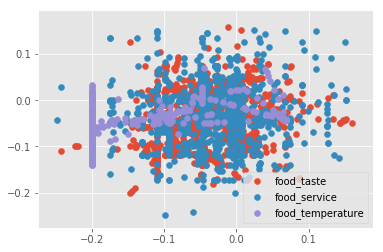


Training Fresh


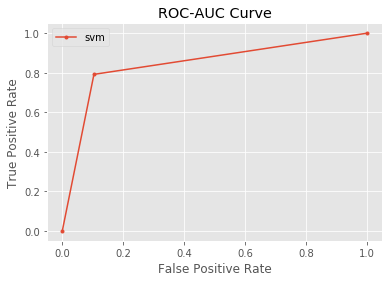


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.86      0.65      0.74       310
      food_taste       0.75      0.88      0.81       317
food_temperature       0.78      0.89      0.83       152

        accuracy                           0.79       779
       macro avg       0.80      0.81      0.80       779
    weighted avg       0.80      0.79      0.79       779


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.8491974260760425	
 2. F1 Score: 0.79204107830552	
 3. Average absolute error: 0.14 degrees


In [37]:
model('svm', 'food', 'SMOTE')


Beginning the Decision Tree Classification Model Processing
Counter({'food_service': 934, 'food_taste': 157, 'food_temperature': 32})

 Viewing class scattered distribution


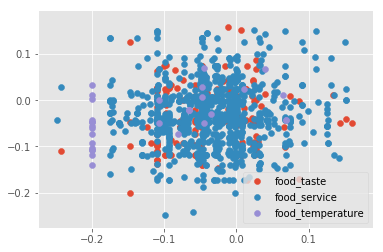


 Training without fixing imbalance


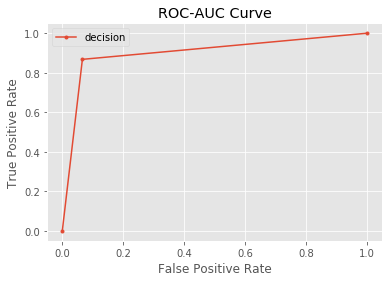


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.93      0.92      0.92       314
      food_taste       0.52      0.55      0.54        47
food_temperature       0.70      0.70      0.70        10

        accuracy                           0.87       371
       macro avg       0.72      0.72      0.72       371
    weighted avg       0.87      0.87      0.87       371


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.7842040698840904	
 2. F1 Score: 0.8679245283018869	
 3. Average absolute error: 0.09 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'food_taste': 934, 'food_service': 934, 'food_temperature': 423})

 Viewing class scattered distribution


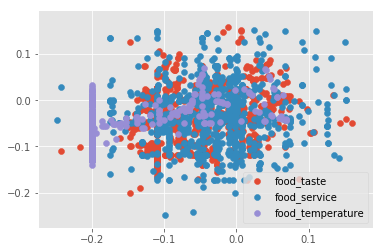


Training Fresh


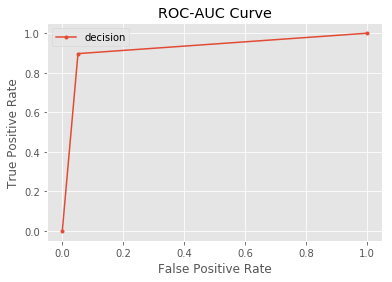


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.89      0.87      0.88       318
      food_taste       0.87      0.90      0.88       300
food_temperature       0.98      0.95      0.96       139

        accuracy                           0.90       757
       macro avg       0.91      0.91      0.91       757
    weighted avg       0.90      0.90      0.90       757


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.924781802995005	
 2. F1 Score: 0.8969616908850726	
 3. Average absolute error: 0.07 degrees


In [38]:
model('decision','food', 'SMOTE')


Beginning the Random Forest Classification Model Processing
Counter({'food_service': 934, 'food_taste': 157, 'food_temperature': 32})

 Viewing class scattered distribution


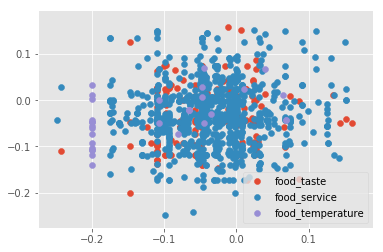


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


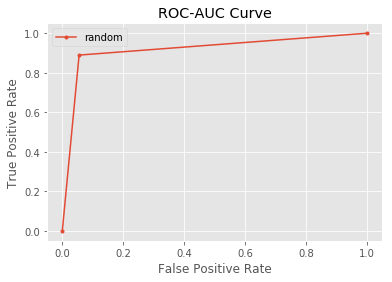


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.91      0.97      0.94       314
      food_taste       0.70      0.40      0.51        47
food_temperature       0.86      0.60      0.71        10

        accuracy                           0.89       371
       macro avg       0.82      0.66      0.72       371
    weighted avg       0.88      0.89      0.88       371


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.731121324811276	
 2. F1 Score: 0.889487870619946	
 3. Average absolute error: 0.07 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'food_taste': 934, 'food_service': 934, 'food_temperature': 467})

 Viewing class scattered distribution


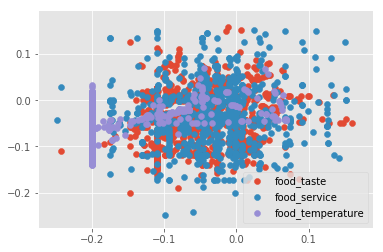


Training Fresh


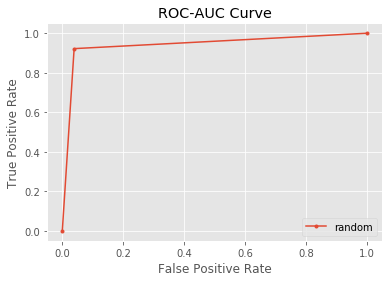


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.91      0.92      0.91       322
      food_taste       0.91      0.92      0.91       288
food_temperature       0.99      0.94      0.96       161

        accuracy                           0.92       771
       macro avg       0.93      0.92      0.93       771
    weighted avg       0.92      0.92      0.92       771


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.9409313163180949	
 2. F1 Score: 0.9221789883268483	
 3. Average absolute error: 0.05 degrees


In [39]:
model('random', 'food', 'SMOTE')


Beginning the Voting Classifier Model Processing
Counter({'food_service': 934, 'food_taste': 157, 'food_temperature': 32})

 Viewing class scattered distribution


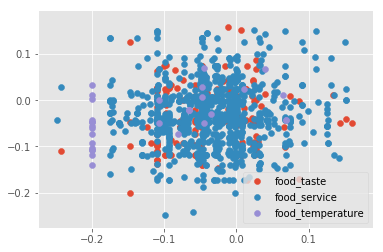


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


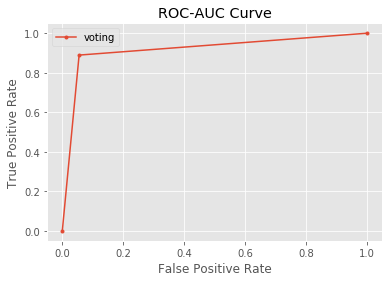


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.91      0.97      0.94       314
      food_taste       0.69      0.43      0.53        47
food_temperature       0.86      0.60      0.71        10

        accuracy                           0.89       371
       macro avg       0.82      0.66      0.72       371
    weighted avg       0.88      0.89      0.88       371


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.7365462118554295	
 2. F1 Score: 0.889487870619946	
 3. Average absolute error: 0.07 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'food_taste': 934, 'food_service': 934, 'food_temperature': 627})

 Viewing class scattered distribution


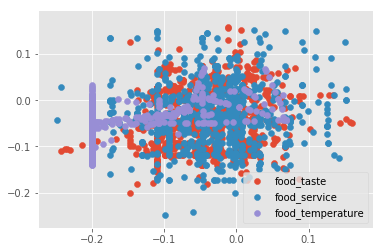


Training Fresh


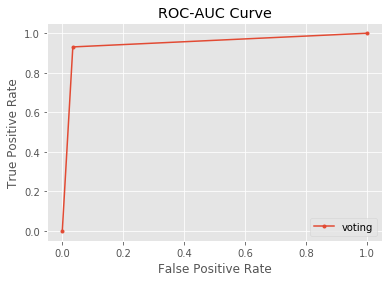


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.91      0.91      0.91       310
      food_taste       0.91      0.93      0.92       312
food_temperature       0.99      0.97      0.98       202

        accuracy                           0.93       824
       macro avg       0.94      0.93      0.94       824
    weighted avg       0.93      0.93      0.93       824


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.948958134665108	
 2. F1 Score: 0.9308252427184466	
 3. Average absolute error: 0.05 degrees


In [40]:
model('voting',data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYgAAAEaCAYAAAAL7cBuAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3XmcXFWZ//HP6W6SdMISoBXJArKELYAwLEEBR0fUAAq+5gePhEUYWdQRHVmccY2IjOI2DAMoMMAgyvYgiuwgm45LAMGNVUIIZGECgbB0V3c63X1/f5zbnUqluuumU0t33+/79apXd906Vfc5HThPnXPuPSckSYKIiEippkYHICIiI5MShIiIlKUEISIiZSlBiIhIWUoQIiJSlhKEiIiUpQQhIiJlKUFIw4QQrgwhJOmjN4SwOIRwVQhhapmyW4QQLgghLAwhdIcQXg4h/DSEsEeZsi0hhM+EEB4KIbwZQng9hPDHEMKXQwibZoztwjSmz5Z57YQQQs8g77snhHBlybGtQgg/DCE8F0JYGUJYEkK4K4TwkRBCqBDHISGEO0MIr4QQOkMIT4cQLg4h7JClHiLrQwlCGu1/gS2BrYCjgT2BG4oLhBCmA38A3gV8CtgeOBRYBcwLIcwuKrsBcBvw74AD/wC8A/gysB9wfKWAQggTgWOBbwKnrE/l0gT2J2AWcDqwG3AQcDNwHrDJEO+dC9wCLAD+EdgJ+DjQDZyznnGNW5/3S04kSaKHHg15AFcC95Qc+wyQABsXHbsZ+L/iY0Wv3Z6+1po+PwPoA945yDk3zRDXPwGPAOOBV4F3lbx+AtAzyHvvAa5Mfw/An4G/Ai1lym5Y7nj62l7p3+ELQ9UDeE9ablrJ6z3ACenvb0/LHJP+vTqA/wBeAL5U8r7xwArgkyX/Jk8BXcAzxGRbNm49xtZDPQgZMUIIU4AjgN70QTokdChwYZIkb5R527eALYD3p8+PA+5LkuT35c6RJMmKDKF8AvhRkiQrgesYfi/iHcDuwLeTJFlrSCpJkvZyx1PHAQViQ76WjPUo9W3gGmIv5gLgauBjJWU+DLQC1wOEEM4CzgS+COwM/Avx7/O1YZxfRhklCGm094QQ2kMIBWAJ8G7gP5Mk6Uhfn0H87/TxQd7ff3zH9OcOwBPDDSaE8A7g74Br00NXAhZCmDyMj+ufJxhOPDsAzyZJ0j2M9w7mkiRJfpIkyYIkSZ4DfgTsGEKYVVTmY8AtSZKsSIfa/hX4RJIkP0+S5LkkSW4HvkLsVcgYpwQhjfYgsAewL/ANYB7w1aLXh5zEJQ6dFAtljq0lTUr9jzuKXvoEcHuSJC8DJEnyEPAccU5iXfXHPpwVMTPVYx09VPwkSZKngIdJexEhhDZgNjFxAMwk9iZuLP57AZcAm4QQ3lLl+GSEaWl0AJJ7nUmSzE9/fyy9Ouci4mQsxDHvPmBX4Odl3r9r+vPpop8zM5y3+OqnToAQwiTiOP1GJVcpNRGHmS5Mn68EmkMIk4p6Ov0mA/316Y9pJvDHDDEVexp4dwhhXIVeRF/6cyCRhhCaKf/lrzRWiMng6yGE04A5xPmHO9PX+j/jSOBvZd776hBxyRigHoSMNGcBx4cQ9gZIkuRV4A7g0yGEjcuU/xKwDPhl+vwnwD+EEN5Z7sP7L3NNkmR+0WNJ+vJRxLmPdxATSP/jQGBmCGG/tNxT6c99Sz57E+LQUP/r/RPU/xZCWOvLWAhhw3LHi+oxkXjl06D1AF5Kf04penkPKve8+l0LbESc5zkOuKZoXuRx4sT0tiV/r/5Hb8ZzyGjV6FlyPfL7oMxVTOnxXwC/LHq+NXF+4g/EIZDpwD7ECdcuYHZR2Q2IyeIN4uTq3un7ZwM3Af8yRDwPAZcP8tqvgSuKnt9P/Fb9IWAb4J3ERPYS0FZU7u+I38ofAT5CnFPZiTiUtQCYPEQ8Xyf2EC4izs1snZ7nPMDTMi3AwvTcOwEHpLH2sfZVTAcMcp6fEXs4CbBnyWtfTf+WpxLneWYSE+m3G/3fjx61fzQ8AD3y+xgiQeyfNlbvKzq2ZdpQPk+8D2A5cGNpg5aWbSFebfMH4rDKG2kD+KXBGmTit+4E+OAgr386/axN0ucbEq+geop4tdHzacJ6e5n3vp04br8wjX0pcRjnMCBU+Bt9GLg7TTJdxKGnHwDbF5WZlSagTmKv5UDKX+Y6WII4PH39r4O8fiLxXo6uNI4HgU81+r8fPWr/COl/ACIiImvQHISIiJSlBCEiImUpQYiISFlKECIiUtZov1FOM+wiIsNT8V6Z0Z4gWLp06bDe19bWxvLly6sczcimOueD6pwP61PnKVOmVC6EhphERGQQShAiIlKWEoSIiJSlBCEiImUpQYiISFl1uYrJzK4grnr5krvvWub1AJwPHEJc+OwEd3+0HrGJiEh59epBXElcbnkwBxOXQZ5B3Jjlh3WISURkVEqefYqOG68iefapyoXXQ116EO7+azN7+xBFDgeucvcEmGdmk81sS3d/sR7xiYiMFMmqVdDVCV2F+LOzACs7STrj82TJQnjgTtqTPmjZgKYzziFst1NNYhkpN8pNBRYVPV+cHlsrQZjZKcReBu5OW1vbsE7Y0tIy7PeOVqpzPqjO9Zes6iYpdNDXWSDp7CDpLMRH6bFC/NlX9HrSVaCv0P+eDujpqXzCfr09TFy8gEmzDqhJvUZKgih3y3fZZTTc/VLg0v4yw72TUHde5oPqnA/DqXP8pl70LT391p6s8e29M/5cGcskZb7Z09kJvRkb9fGt0NoKE1phwsT4c3Ib4W3TYUIrobU1LRNfC/1l0udMmEjy4iKSC8+J52xuoTBtWzrXse5Z76QeKQliMXEbyX7TiLtuiYgAcfdLelaVNOixwe7aoIW+l5et2ainDXlSmgSq0ai3bUKYUOb4hInxeEmjzoRWGD+B0LT+075h081JzjiHiYsXUJi2bc2Gl2DkJIibgVPN7Dri9omva/5BZPQr36inDXfxN/CuCo16/2OQRv310gMTShru1omwYYVGvbRBb22FcdVp1KstbLcTk2YdsM49h3VVr8tcrwXeA7SZ2WLga8TN5XH3i4HbiZe4zide5vpP9YhLRNY20KiXfEsv36ivbsiTlWUa9CEa9bUM1qiXNuitE2F86xqN+qZbTmFF58oR3aiPRqN9T+pEq7lmpzqPXcWN+qatE1jx4pKB4ZaBb+NdWRv1AvT2Vj5pCDB+wpoN94Q4hj5oo17uW/qE9W/U8/LvXKwKq7mO/eW+RUartb+pFwZp1Nccblm7wV+zUX9lqJMO1qhvPDkdO5+4+pt8jRt1GfmUIETWQZIksKp7rQZ97Ya7QqPeP1ST9Zv6hDWvbinbqKevbfSWt9K+qleNuqw3JQgZ87I16hm+pVetUS/5ll569cuEiWtOpI4bv06NemtbGx05G26R2lCCkBFpdaNecj36ujTqnQVe6u4iKXRAX1/lk2Zp1EuGWwauW1/PRl1kJFKCkKoZvFFPbzAauAKmUKax71yjsaersG6NevG38gmtsMmmhPGtTNh0M7oI5Rv10rF1Neoia1CCyLkkSaC7G1YW1roevXyj3n+8c63GvlqNernr0cNa3+yLbj4Kg1+MsXFbG90abhEZFiWIUah8o150nXrx8EtRo76it4feN99Y+6qZzI16SYPeOrFyoz6h9Hg6/DJEoy4iI4MSRJ0MNOplrnQZtFEvvRlpPRv1ZKON4yWOm2xaNFG65lUuatRFpJ8SRAZ9zzwBf5wHU7citG2x9qJdQzbqRWUyNepNqxvs4m/mkzcbolFf82akgfeUNOqb5fBmIhEZPiWICpJnnyL53pehL17aWPa+80Eb9c1XLwewxoJf2Rt1EZFGUYKoIHn6rwPJgRAIB7yf8Pez1xyPV6MuImOQEkQFYcfdSEKAJIGWDQj7H0TYevtGhyUiUnNKEBWE7XaCt24JIdB0wr/UdO11EZGRRHcFZdHTQ3j7DkoOIpIrShBZFDpg4qRGRyEiUldKEBUkfX3xUtWJGzY6FBGRulKCqKSzECeoJ6kHISL5ogRRSaE9/mxVD0JE8kUJopJCBwBBPQgRyRkliEr6exCagxCRnFGCqCTtQegqJhHJGyWIChL1IEQkp5QgKhlIEOpBiEi+KEFUUuiApqa44qqISI4oQVRSaIeJG2q1VhHJHSWISjraNbwkIrmkBFFB0tmhCWoRySUliEo62pUgRCSXlCAq6ewgaIhJRHJICaIS9SBEJKeUIIaQJIn2ghCR3KrblqNmNhs4H2gGLnP3c0te3wr4ETA5LfMFd7+9XvGV1d0NvT3qQYhILtWlB2FmzcBFwMHALsAcM9ulpNhXAHf3PYGjgB/UI7Yh9d9FrZVcRSSH6jXEtC8w390XuHs3cB1weEmZBNg4/X0TYGmdYhuc9oIQkRyr1xDTVGBR0fPFwKySMmcBd5vZZ4BJwEHlPsjMTgFOAXB32trahhVQS0tLxfd2v7SEFcAmW05h/DDPM5JkqfNYozrng+pco3PU9NNXK7dORVLyfA5wpbt/38zeCfzYzHZ1977iQu5+KXBp/2csX758WAG1tbVR6b3Ji0sAeKOnlzDM84wkWeo81qjO+aA6r5spU6ZkKlevIabFwPSi59NYewjpRMAB3P33wASgoV8Jkg6t5Coi+VWvHsTDwAwz2wZYQpyEPrqkzAvA+4ArzWxnYoJ4uU7xldfZv1mQ5iBEJH/q0oNw9x7gVOAu4Ml4yB83s7PN7LC02BnAyWb2Z+Ba4AR3Lx2Gqq/+HkSrehAikj91uw8ivafh9pJjc4t+fwLYv17xZNLZARNaCc3NjY5ERKTu1rkHYWZvrUUgI5KW2RCRHMvUgzCzTYALAAN6gUlm9mFgb3f/Wg3ja6ikoL0gRCS/svYgfgisBGYA3emxB4mXpo5d2gtCRHIsa4I4CPi0uy8ivX/B3V8CtqhVYCOChphEJMeyJog3gM2KD5jZdGBZ1SMaSQraC0JE8itrgrgCuMHMDgSazGwf4H+AS2oW2UhQ0BCTiORX1stcv0Wce7iceAPbNcTkcF6N4mq4pKcHVnZqJVcRya2sCWJzd/8e8L3ig2bWBozNBVA6C/GnVnIVkZzKOsS0YJDjf6tWICOO9oIQkZzLmiDWWo3VzDYE+sqUHRvSBBHUgxCRnBpyiMnMniNe1tpqZqW9iDbgxloF1nCFdKE+9SBEJKcqzUGcROw93AycXHQ8AZa5++O1CqzRkv4hJl3FJCI5NWSCcPd7Aczsbe7+Rn1CGiG0F4SI5Fymq5jc/Q0z2xU4kDi0FIpeO7tGsTWW9oIQkZzLuljficTF+u4F3g/8kri5zy21C63BOtqhZQPCuPGNjkREpCGyXsX0BeAQd/8w0Jn+NKCjZpE1mlZyFZGcy5ogtnD3B9Lf+8ysCbgN+EhNohoJtMyGiORc1gSx2My2Tn9/BjgU2A9YVZOoRgDtBSEieZd1qY3vA7sCzwPnADcAGwCn1yiuxit0wEabNDoKEZGGyXoV0+VFv99qZpsC49399ZpF1miFdsIWUxsdhYhIw6zzntQA7t4FtJjZt6ocz8hR6NAQk4jkWsUehJkdD+xBnHu4FJgIfBX4JPC7mkbXIEmSaJJaRHKv0lpM3wGOIyaCOcSJ6XcCjwAHuPufax5hI3R1QtKndZhEJNcq9SCOAt7t7s+Y2c7A48Acd7++9qE1UP86TK1KECKSX5XmICa7+zMA7v4kUBjzyQEGVnINkzTEJCL5VakHEcxsOqvXXuopeY67v1Cr4BpGK7mKiFRMEJOAhay5YdDzRb8nQHOVY2q8/r0gdBWTiORYpQSxQV2iGGG0F4SISOX9IHrrFciIor0gRESGd6PcmNfZASHAhImNjkREpGGyrsW03sxsNnA+cc7iMnc/t0wZA84izm382d2Prld8a+hoh9ZJhCblTxHJr7q0gGbWDFwEHAzsAswxs11KyswAvgjs7+4zgc/VI7aytJKriEj2HoSZtQD7AFPd/adm1grg7p0Z3r4vMN/dF6SfdR1wOPBEUZmTgYvcfUX6uS9lja3aEi2zISKSecvRmcAv0qdvA35K3HL0GOISHJVMBRYVPV8MzCops0N6rt8Sh6HOcvc7y8RyCnAKgLvT1taWpQpraWlpGfS9r65aSZi8KZsO87NHqqHqPFapzvmgOtfoHBnL/RA4x92vNLMV6bEHgIszvj+UOZaUiWUG8B5gGvC/Zraru79WXMjdLyUuGgiQLF++PGMIa2pra2Ow9/a+/hpsOX3Q10eroeo8VqnO+aA6r5spU6ZkKpd1DmI34Efp7wmAu7cTV3bNYjEwvej5NGBpmTK/cPdV7v4c8DQxYdRfoUPLbIhI7mXtQTwP7Ak82n/AzPYGns34/oeBGWa2DbCEuAhg6RVKNxGHq640szbikNOCjJ9fXYV2LdQnIrmXtQcxF7jNzL4KjDOzzxPnIeZmebO79wCnAncBT8ZD/riZnW1mh6XF7gJeMbMngPuBz7v7K+tQl6pIVnXDqm5dxSQiuReSpHQqoDwz24d4pdHWxAnnS939oRrGlkWydGnpSFU2g43fJa+voO/M4wnHfJKm9xyynuGNLBqnzQfVOR+qMAdRbm54DVmvYtrU3R8mDhWNbdoLQkQEyD4HscTM7gGuBm7OeO/D6KS9IEREgOwJYhvgo8BpwH+b2S+Aa4C7x9yCflrJVUQEyJgg3H0Z8F/Af5nZtsQrkL4HtAFb1C68+ku0kquICDC8tZg2SR8bAR3VDWcE6OzfLEg9CBHJt6yT1DsQ71E4mpgcbgCOcvff1TC2xlAPQkQEyD4H8TDwc+CzwD1jbt6hWGcHjBtPaMnlZnoiIgOyJogt3L2rppGMFB3tGl4SEWGIBGFmc9z92tVPrWw5d7+qFoE1SqK9IEREgKF7ECcA/Qni5EHKJMCYShBoLwgREWCIBOHuHyz6/cD6hDMCFNphs7c0OgoRkYbLdJmrmZVdYsPM5lU3nBGg0EHQMhsiIpnvg9hpkOM7VCuQEaPQAVpmQ0Rk6KuYzOyK9NdxRb/3eztx6e4xI+nrjZe5apJaRKTiZa5LBvk9AR4Brq96RI3Uma5BqAQhIjJ0gnD3r0Kca3D32+oTUgNpoT4RkQFD3Qexv7v/Nn36ppm9u1w5d/91TSJrhDRBBPUgRESG7EFczurJ6asHKZMAW1U1okYqaKE+EZF+Q90HsVPR79PrE06DaYhJRGTAcJb7xswONLN3VjuYRtNeECIiq2W9Ue4BMzsw/f1M4GfAz8zs32oZXN1pLwgRkQFZexC7Ab9Pf/8E8B5gFvDPNYipcTraobkZxk9odCQiIg2XdbnvJqAv3W60xd0fBzCzzWoWWSMU2qF1EiGERkciItJwWRPE74D/BKYQNw4iTRav1CiuxtBKriIiA7IOMZ0AdAFPA19Lj+0CXFCDmBpGe0GIiKyWqQfh7i8D/1py7Fbg1loE1TDqQYiIDMiUIMysBfgicBwwlbgu04+Bc919Ve3Cq7NCB6Fti0ZHISIyImSdg/g2sD/wOeB5YGvgK8Bk4IzahNYA6SS1iIhkTxAG7Onuy9Pnj6ebCP2JMZIgkiRJ94JQghARgeyT1M1AX8mxPmDsXA/avRJ6ezQHISKSytqD+Clws5l9DXiBOMQ0F7ixVoHVnZbZEBFZQ9YE8Xni5a2XA1sCS4HrgK9nPZGZzQbOJ/ZGLnP3cwcpdwRwA7CPu/8h6+evt3SZjaAehIgIkP0y15XAl9LHOjOzZuAi4P3AYuBhM7vZ3Z8oKbcR8FngweGcZ710aCVXEZFilfaknkHsNewKPAp83N1fGMZ59gXmu/uC9HOvAw4Hnigp9w3gO8CZwzjH+hlYqE9DTCIiULkHcSHxnofvAUcTl9v4x2GcZyqwqOj5YuJifwPMbE9gurvfmq4YW5aZnQKcAuDutLW1DSMcaGlpWeO9nU2BN4BNp06nZZifOdKV1jkPVOd8UJ1rdI4Kr+9FbLQ7zex+4Klhnqfc1U5J/y9m1gScR1zSY0jufilwaf9nLF++fKjig2pra6P4vX3LXgRgxcpuwjA/c6QrrXMeqM75oDqvmylTpmQqV+ky13Hu3gng7m8CrcOKJvYYinelm0ac6O63EXEY6wEzWwjsR7xqau9hnm/dFTTEJCJSrFIPYryZzS163lryHHc/O8N5HgZmmNk2xCGro4hDVv2f8Tow0FcysweAM+t6FVOhHVonEpqa63ZKEZGRrFIPwoEZRY+fljzfPstJ3L0HOBW4C3gyHvLHzexsMztsmLFXl5bZEBFZQ0iSpHKpkStZunRp5VJllI7f9V54DrzyMs1fO79asY04GqfNB9U5H6owB1FxJYysS22MfYV2mKR7IERE+ilB9Ct0aIhJRKSIEkS/QgdBK7mKiAxQguhXaIdWDTGJiPTLulgfZvZe4uWpW7j7R8zs74CN3P1XNYuuTpKeHljZpb0gRESKZOpBmNk/E9dkWgS8Nz3cDfx7jeKqr4F1mNSDEBHpl3WI6QzgIHc/h9UbBz0J7FyTqOpNe0GIiKwla4LYiLgXNaxeQ6mF2IsY/bQXhIjIWrImiN+w9hLcnwZG/fwDoL0gRETKyDpJ/RngVjM7GdjIzB4n9h4OqVlkdZQUNMQkIlIqUw/C3ZcQl/4+HvgY8Algb3d/sYax1U9Bk9QiIqUyX+bq7n3Ab9PH2NLfg9BSGyIiAzIlCDN7jqINfoq5+7ZVjagRCh3QsgFhg3GNjkREZMTI2oM4qeT5lsR5iWurG06DaKE+EZG1ZEoQ7n5v6TEzuxe4nbhP9aiWaC8IEZG1rM9aTJ3A6B9egjjEpB6EiMgass5BzC05NBE4FLi76hE1QqEDNp7c6ChEREaUrHMQM0qedwAXAVdWNZpGKbQTtpja6ChEREaUignCzJqBXxL3ke6qfUgNUOjQSq4iIiUqzkG4ey9wwVhNDklfX0wQuklORGQNWSepbzOzMbGsxlpWdkHSp2U2RERKZJ2DaAJ+Zma/Ie4JMXDTnLt/vBaB1U1BC/WJiJSTNUE8A3y3loE0TLqSa1APQkRkDUMmCDOb4+7XuvtX6xVQ3Wk3ORGRsirNQVxSlygaSXtBiIiUVSlBhLpE0UDaC0JEpLxKcxDNZvZehkgU7n5fdUOqM+0FISJSVqUEMR64nMETRMJoX4+p0A6hCSa0NjoSEZERpVKC6BgT+z0MpdAOrRMJTeuzbqGIyNijVlEruYqIlFWpB1G1SWozmw2cDzQDl7n7uSWvn07cmKgHeBn4uLs/X63zDyYpdGgvCBGRMobsQbj7RtU4Sbrg30XAwcAuwBwz26Wk2B+Bvd19d+CnwHeqce6KtJuciEhZWe+kXl/7AvPdfQGAmV0HHA480V/A3e8vKj8POLYukRU6YPJmdTmViMhoUq8EMZW4hlO/xcCsIcqfCNxR7gUzOwU4BcDdaWtrG1ZALS0ttLW18XJXgfGbbs7Gw/yc0aS/znmiOueD6lyjc9T001crN5eRlDmGmR0L7A38fbnX3f1S4NL+z1i+fPmwAmpra2P58uX0tb9JV3ML3cP8nNGkv855ojrng+q8bqZMmZKpXL0SxGJgetHzacDS0kJmdhDwZeDv3X1lrYNKVnXDqm7dJCciUka9EsTDwAwz2wZYAhwFHF1cwMz2JK79NNvdX6pLVB1aZkNEZDB1uQ/C3XuAU4G7gCfjIX/czM42s8PSYt8FNgRuMLM/mdnNNQ9MK7mKiAyqXj0I3P124PaSY3OLfj+oXrEMGNgLQglCRKRUvu+kHuhBaIhJRKRUrhNEor0gREQGlesEgfaCEBEZVM4ThCapRUQGk/ME0Q7jJxBa6jZXLyIyaihBaCVXEZGycp0gEu0FISIyqFwnCAodmqAWERlEzhNEuyaoRUQGkfME0UFQD0JEpKycJwj1IEREBpPbBJH09kJnQXMQIiKDyG+C0E1yIiJDym2C6Gt/I/6iHoSISFm5TRBJQUt9i4gMJbcJoq/9zfiLEoSISFm5TRDJQILQEJOISDm5TRB9HepBiIgMJbcJIulPEFqLSUSkrNwmiL6OdmhuhnHjGx2KiMiIlNsEkbS/CRM3JITQ6FBEREak3O6U09fxhvaCEBmlkiShq6uLvr4+QggsW7aMlStXNjqsuqpU5yRJaGpqYsKECcP+IpzbBJF0tGv+QWSU6urqYoMNNqAl3Q2ypaWF5ubmBkdVX1nq3NPTQ1dXF62trcM6R26HmPra39QlriKjVF9f30BykMG1tLTQ19c37PfnNkEk7W/qLmqRUUpzh9mtz98qtwmir0M9CBGRoeQyQSRJEu+DUA9CREaIWbNm8eqrrzY6jDXkMkHQvRJ6e9WDEMmR5Nmn6Lv9BpJnn6r+ZyfJeo31j1T5nOXpiCu5qgchMvr1XfffdC9eSJIkgxfqLMDi5yBJSEKAadtA68RBi4fp29B01MlDnnfRokUce+yxvOtd7+KRRx5h5syZPPXUU3R1dXHooYdy5plnArFncOSRR/LLX/6Snp4eLrnkErbffnteffVVPv3pT/PKK6+wxx57rBH/JZdcwvXXXw/AnDlzOPnkk1m0aBHHHHMM++67L48++igzZ87kyCOP5Pvf/z7Lly/nwgsvZM8991yHv1xl+exBDCz1rR6ESC50dkB/A5wk8XkVPPvssxxxxBHcfffdzJ07lzvuuIN77rmHefPm8cQTTwyU22yzzbjrrrs47rjjuPjiiwE477zz2Hfffbn77rv5wAc+wJIlSwD4y1/+grtz6623csstt3DNNdfw2GOPAbBw4UJOPPFE7rnnHubPn89NN93ETTfdxNy5c7nggguqUqdi+exBaDc5kTGj6aiTaWlpoaenZ9AyybNP0ff9r0BvDzS30HTSGYTtdlrvc0+bNo299toLgFtuuYWrr76a3t5eli1bxjPPPMMuu+wCwMEHHwzA7rvvzh133AHAvHnzuOyyywA46KCDmDx5MgAPPfQQs2fPZuLEiQPvffDBB/nABz7A9OnT2XnnnQHYcccdOeCAAwghsNNOO7Fo0aL1rk+puiUIM5sNnA80A5e5+7klr48HrgL2Al4BPuruC2sSTNqD0I1yIvkQttuJpjPOIXn6r4Qdd6uotf5vAAAL0ElEQVRKcgAGGvEXXniBSy65hNtuu43Jkyfzuc99jq6uroFy48fHNd+am5vp7e1dHVeZS1CHGirr/xyApqYmxo0bN/B78edWS12GmMysGbgIOBjYBZhjZruUFDsRWOHu2wPnAd+uVTx9C58BIHn5/2p1ChEZYcJ2O9F0yJFVSw7F3nzzTVpbW9l44415+eWXuf/++yu+Z7/99uNnP/sZAPfddx+vvfbawPG77rqLzs5OCoUCd955J7Nmzap6zFnUaw5iX2C+uy9w927gOuDwkjKHAz9Kf/8p8D4zq/rdMMmzT8GdN8bfr/jPmlzRICL5MnPmTHbddVfe+973cvrpp7PPPvtUfM9pp53Ggw8+yAc/+EF+9atfMXXqVAB22203jjzySA499FA+9KEPMWfOHHbddddaV6GsMOTMf5WY2RHAbHc/KX1+HDDL3U8tKvNYWmZx+vzZtMzyks86BTgFwN336u7uXqdYOm68ivarL4kTVU1NbHj0KUz6fx9bn+qNGpXGacci1XlsWrZs2RrDLTK4lStXssUWW6xxLB2aqvgFvF5zEOUCKc1MWcrg7pcCl/a/vnz58tIiQ0qmbQstGwxMVhWmbUvnOn7GaNXW1sa6/r1GO9V5bFq5cuUaC9XlISmWylrnlStXrvXfw5QpU7KdY1iRrbvFwPSi59OApYOUWWxmLcAmQNVvK+yfrJq4eAGFadvWZDxSRGQsqFeCeBiYYWbbAEuAo4CjS8rcDBwP/B44ArjP3Wsy/hW224lJsw7ITc9BZKypx9D4WLE+f6u6TFK7ew9wKnAX8GQ85I+b2dlmdlha7HJgczObD5wOfKEesYnI6NPU1JS7IaXh6Onpoalp+M18XSapayhZurR0pCqbPIzTllKd8yEPdS7dUW78+PG521GuUp2H2lEunYMYMZPUIiJVE0JYY5e0PCTFUvWocz7XYhIRkYqUIEREpCwlCBERKWvUT1I3OgARkVGq4iT1aO9BhOE+zOyR9Xn/aHyozvl4qM75eFShzhWN9gQhIiI1ogQhIiJl5TlBXFq5yJijOueD6pwPNa/zaJ+kFhGRGslzD0JERIagBCEiImWN+bWYzGw2cD7QDFzm7ueWvD4euArYC3gF+Ki7L6x3nNWUoc6nAycBPcDLwMfd/fm6B1pFlepcVO4I4AZgH3f/Qx1DrLosdTYzA84i3jP0Z3cvXWZ/VMnw3/ZWxK2LJ6dlvuDut9c90CoxsyuADwEvufta+46m2zKfDxwCFIAT3P3Rap1/TPcgzKwZuAg4GNgFmGNmu5QUOxFY4e7bA+cB365vlNWVsc5/BPZ2992J+39/p75RVlfGOmNmGwGfBR6sb4TVl6XOZjYD+CKwv7vPBD5X90CrKOO/81eI2wnsSdx35gf1jbLqrgRmD/H6wcCM9HEK8MNqnnxMJwhgX2C+uy9w927gOuDwkjKHE79xQGws35dm5dGqYp3d/X53L6RP5xF3+BvNsvw7A3yDmAy76hlcjWSp88nARe6+AsDdX6pzjNWWpc4JsHH6+yasvXPlqOLuv2bonTUPB65y98Td5wGTzWzLap1/rCeIqcCioueL02Nly6QbG70ObF6X6GojS52LnQjcUdOIaq9inc1sT2C6u99az8BqKMu/8w7ADmb2WzOblw7PjGZZ6nwWcKyZLQZuBz5Tn9AaZl3/f18nYz1BlOsJlF7Xm6XMaJK5PmZ2LLA38N2aRlR7Q9bZzJqIw4dn1C2i2svy79xCHHp4DzAHuMzMJtc4rlrKUuc5wJXuPo04Lv/j9N9/rKpp+zWW/3AQs+n0oufTWLvLOVDGzFqI3dKhunQjXZY6Y2YHAV8GDnP30b4VV6U6bwTsCjxgZguB/YCbzWzvukVYfVn/2/6Fu69y9+eAp4kJY7TKUucTAQdw998DE4C2ukTXGJn+fx+usX4V08PADDPbBlhCnLQqvYrjZuB44PfAEcB97j6aexAV65wOt1wCzB4D49JQoc7u/jpFjYSZPQCcOcqvYsry3/ZNpN+ozayNOOS0oK5RVleWOr8AvI9Y552JCeLlukZZXzcDp5rZdcAs4HV3f7FaHz6mexDpnMKpwF3Ak/GQP25mZ5vZYWmxy4HNzWw+cDrwhcZEWx0Z6/xdYEPgBjP7k5nd3KBwqyJjnceUjHW+C3jFzJ4A7gc+7+6vNCbi9ZexzmcAJ5vZn4FriZd9jtovfGZ2LfHL645mttjMTjSzT5rZJ9MitxOT/nzgv4F/rub5tdSGiIiUNaZ7ECIiMnxKECIiUpYShIiIlKUEISIiZSlBiIhIWUoQMuqY2U/M7KxGx1GJmT1tZgcO8frdZnZMPWMSWRdj/UY5GcHSu5q3AHqLDu/g7nVfYM3MfgIY0J0+/gCc6u5/G+5nuvuORZ9/DjDN3U8oev0Dww54EOlqAKuISz8nwGvE+wH+zd37Mrz/IOIy2m+vdmwy+ihBSKN92N3vaXQQqW+6+1lmNol4A+UVwAENjmm4Zrr7QjPbAfg18ATwPw2OSUYZJQgZcdLF1ZzYOE8A/gR8yt2fLFP2rcQ1898F9AGPufu709emARekn9MOfM/dL6p0fnfvSO9g/VH6OROIy4QfmZ7jeuJGNN0Vzr8YOJZ41/q/AiHdsOhpd9/LzH4DXJZ+3jJgX3d/Kn3v24DniL2OV9I7hb8BbA08BnzS3R/LUJe/mdnvgD2K/mYnEe84nga8BHzL3S8zs02AW4DxZtaeFt8WWE5cYeBE4lpl9xD/PVZUOr+MbpqDkJHqVuLCcm8jNog/HqTc54lLDbwlLftVGNhc5lbi+j1TgfcDnzez91U6cbqx0NHEjZUA5hJXvd0d2BPYn7gRz6DnL5YuMf4d4Gp339Dd9yp5vZPV6yb1+yhwb5oc9iEuo3AScSn6K4BfmNm4DHXZOY13ftHhZcChxH0TTgYuMLPd0zWrPgy8kMa5YbpW1+lp+XcTk0oH8F+Vzi2jn3oQ0mg3mVlP+vsD7v6RdKz8yv4C6YT0y2Y2yd07St6/CtgO2MrdnwV+lR7fD9jY3b+ZPp9vZpcTF3i7d5BYvmBmnwM6ibvOfTw9fgxwsru/nMZzNnGbx68Pcf51dQ2x0f1a+vzo9BwQdwr7gbs/nD6/wsy+DOwD/HaQz/tLmiQnAlcTF2cEwN1vKSp3n5ndCxwI/GWQz/oEcJK7L4GBf4/5ZnZ8lnkNGb2UIKTRPlI6B5E2bN8irq7bRhy6If29NEGcS2yo7zWzXuBid/8ucShmKzN7rahsM/DAELGc6+5nlTm+JVC8Z/fzrN6UZbDzr6t7iLuB7UWcWJ4J/CJ9bWvgGDM7raj8OIbeGGZ34sqmHwXOISaKbgAz+xCxpzODOIowkdjTGsxWwC1mVpwMEuCtwP9lqZyMTkoQMhJ9jLjZyz8QG+PNiUs2r7U5iru/AZwGnGZmuwH3m9lDxF22nnH3nasQz4vERvrp9PlWxOWmBz2/u5f2JIZcFdPde8zsBuIw0+vEfRz6k+Ei4Ovuvk77paff7q81s48Q92o+08xaiVvrHgXc5u6rzOxWVv9ty8W5GDja3Uf9Xt6ybpQgZCTaCFgJvEL8dvvvgxU0sw8Tr9BZQGxYe9PHPKDbzM4gbnS/irjR/Th3f2Qd47kWmGtmjxIb0q8CP6lw/lLLgAPNLAyx/PQ1xH2W24Ezi45fSlya/T7i5beTgPcS9y4p7VGV8y3gN2b2beLfYRwx4famvYn3pZ/bH2ebmW3k7m+mxy4Gvmlm/+TuL6QT8/u5+6heJl4q0yS1jET/Q9wVaynwOPC7IcruCNxHbFR/C5zv7r9J9w44hLjR/ULilTiXsHpD+3XxdeDPwF+J4/QPEhvdQc9f5jOuJzbMr6Y9nHJ+B/QQJ7zv7j+YfnP/FPBDYAXwN+LVUZm4+5+Iewqc6e6vEXs8PyfunHgEcTK/v+xjwI3AQjN7LU0G/wHcSRxGezONc5+s55fRS/tBiIhIWepBiIhIWUoQIiJSlhKEiIiUpQQhIiJlKUGIiEhZShAiIlKWEoSIiJSlBCEiImX9fyckzUiPn7c2AAAAAElFTkSuQmCC 'food', 'SMOTE')


Beginning the XG Boost Classification Model Processing

 Using MULTICLASS SOFTMAX classification approach for XG Boost since there are 3 classes

Counter({'food_service': 934, 'food_taste': 157, 'food_temperature': 32})

 Viewing class scattered distribution


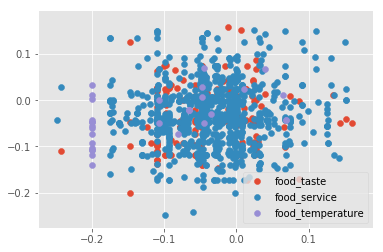


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


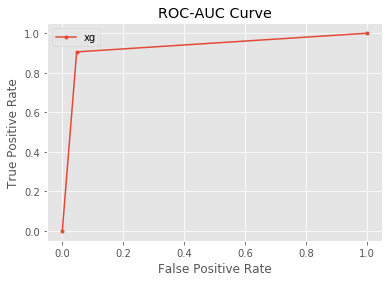


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.92      0.97      0.95       314
      food_taste       0.76      0.53      0.62        47
food_temperature       0.86      0.60      0.71        10

        accuracy                           0.91       371
       macro avg       0.85      0.70      0.76       371
    weighted avg       0.90      0.91      0.90       371


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.7699417802050798	
 2. F1 Score: 0.9056603773584906	
 3. Average absolute error: 0.06 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'food_taste': 934, 'food_service': 934, 'food_temperature': 346})

 Viewing class scattered distribution


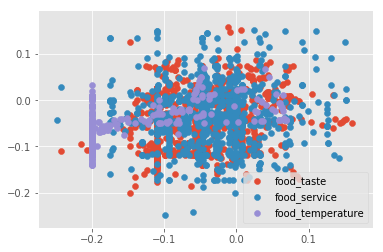


Training Fresh


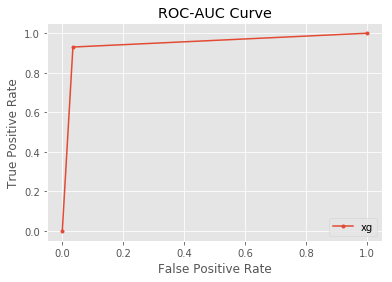


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.94      0.90      0.92       318
      food_taste       0.91      0.95      0.93       305
food_temperature       0.97      0.94      0.96       108

        accuracy                           0.93       731
       macro avg       0.94      0.93      0.94       731
    weighted avg       0.93      0.93      0.93       731


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.9470271931791546	
 2. F1 Score: 0.9302325581395349	
 3. Average absolute error: 0.05 degrees


In [41]:
model('xg', 'food', 'SMOTE')

# Cabin


Beginning the Linear Support Vector Machine Classification Model Processing
Counter({'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39, 'cabin_fragrance': 20})

 Viewing class scattered distribution


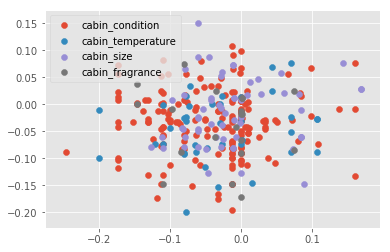


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


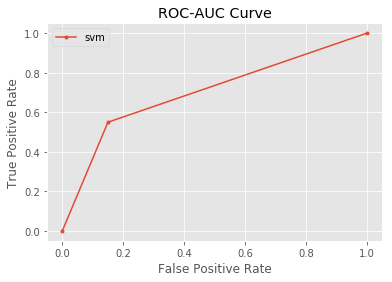


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.60      0.89      0.72        57
  cabin_fragrance       0.50      0.11      0.18         9
       cabin_size       0.20      0.05      0.08        19
cabin_temperature       0.25      0.13      0.17        15

         accuracy                           0.55       100
        macro avg       0.39      0.30      0.29       100
     weighted avg       0.46      0.55      0.47       100


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.533769403593245	
 2. F1 Score: 0.55	
 3. Average absolute error: 0.22 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'cabin_condition': 182, 'cabin_size': 182, 'cabin_temperature': 107, 'cabin_fragrance': 104})

 Viewing class scattered distribution


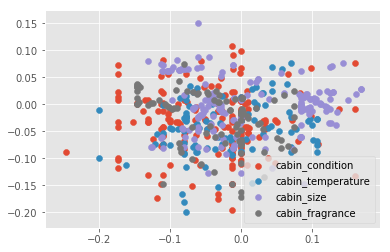


Training Fresh


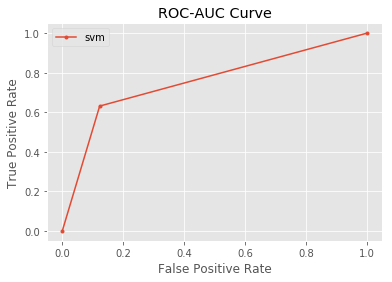


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.63      0.47      0.53        58
  cabin_fragrance       0.54      0.65      0.59        31
       cabin_size       0.66      0.79      0.72        58
cabin_temperature       0.68      0.63      0.65        43

         accuracy                           0.63       190
        macro avg       0.63      0.63      0.62       190
     weighted avg       0.63      0.63      0.63       190


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.7541631300685332	
 2. F1 Score: 0.631578947368421	
 3. Average absolute error: 0.18 degrees


In [42]:
model('svm', 'cabin', 'SMOTE')


Beginning the Decision Tree Classification Model Processing
Counter({'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39, 'cabin_fragrance': 20})

 Viewing class scattered distribution


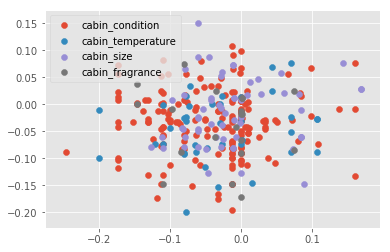


 Training without fixing imbalance


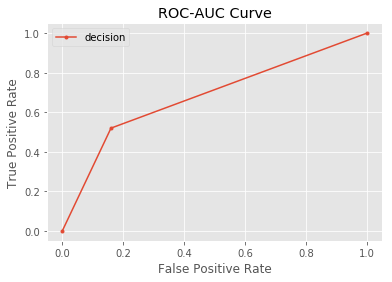


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.62      0.74      0.67        57
  cabin_fragrance       0.17      0.11      0.13         9
       cabin_size       0.47      0.37      0.41        19
cabin_temperature       0.18      0.13      0.15        15

         accuracy                           0.52       100
        macro avg       0.36      0.34      0.34       100
     weighted avg       0.48      0.52      0.50       100


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.5606829499454359	
 2. F1 Score: 0.52	
 3. Average absolute error: 0.24 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'cabin_condition': 182, 'cabin_size': 182, 'cabin_temperature': 126, 'cabin_fragrance': 113})

 Viewing class scattered distribution


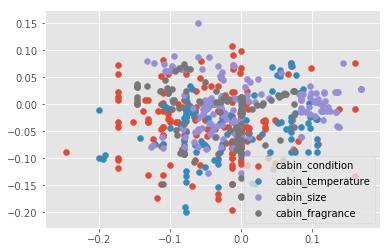


Training Fresh


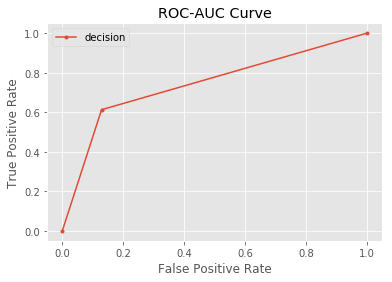


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.56      0.48      0.51        61
  cabin_fragrance       0.65      0.81      0.72        32
       cabin_size       0.64      0.68      0.66        57
cabin_temperature       0.61      0.57      0.59        49

         accuracy                           0.61       199
        macro avg       0.61      0.64      0.62       199
     weighted avg       0.61      0.61      0.61       199


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.7522650442936422	
 2. F1 Score: 0.6130653266331658	
 3. Average absolute error: 0.19 degrees


In [43]:
model('decision', 'cabin', 'SMOTE')


Beginning the Random Forest Classification Model Processing
Counter({'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39, 'cabin_fragrance': 20})

 Viewing class scattered distribution


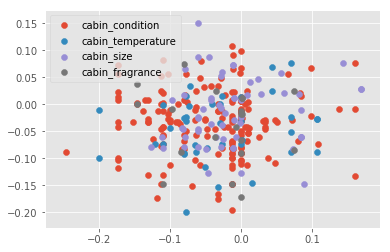


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


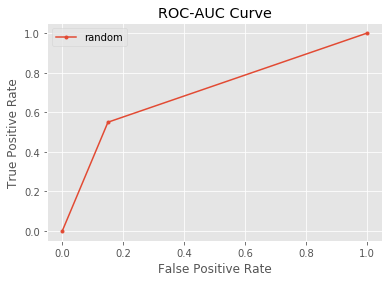


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.57      0.88      0.69        57
  cabin_fragrance       0.33      0.11      0.17         9
       cabin_size       0.60      0.16      0.25        19
cabin_temperature       0.20      0.07      0.10        15

         accuracy                           0.55       100
        macro avg       0.43      0.30      0.30       100
     weighted avg       0.50      0.55      0.47       100


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.5323340221581035	
 2. F1 Score: 0.55	
 3. Average absolute error: 0.22 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'cabin_condition': 182, 'cabin_size': 182, 'cabin_temperature': 118, 'cabin_fragrance': 103})

 Viewing class scattered distribution


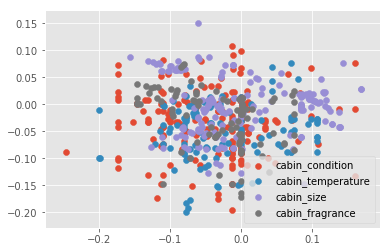


Training Fresh


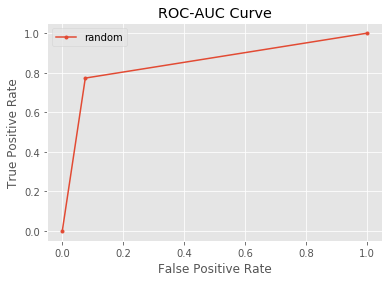


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.64      0.75      0.69        57
  cabin_fragrance       0.80      0.90      0.85        31
       cabin_size       0.89      0.76      0.82        62
cabin_temperature       0.82      0.73      0.77        44

         accuracy                           0.77       194
        macro avg       0.79      0.79      0.78       194
     weighted avg       0.79      0.77      0.78       194


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.8540875669520679	
 2. F1 Score: 0.7731958762886598	
 3. Average absolute error: 0.11 degrees


In [44]:
model('random', 'cabin', 'SMOTE')


Beginning the Voting Classifier Model Processing
Counter({'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39, 'cabin_fragrance': 20})

 Viewing class scattered distribution


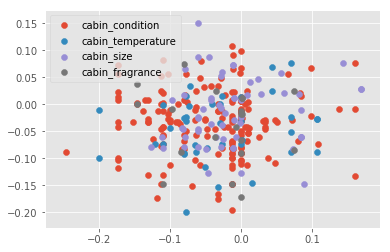


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


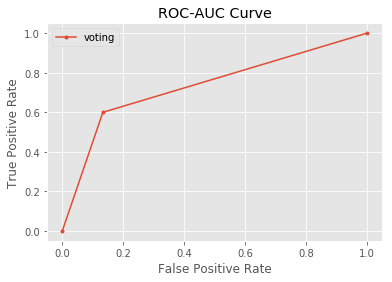


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.63      0.89      0.74        57
  cabin_fragrance       0.33      0.11      0.17         9
       cabin_size       0.64      0.37      0.47        19
cabin_temperature       0.20      0.07      0.10        15

         accuracy                           0.60       100
        macro avg       0.45      0.36      0.37       100
     weighted avg       0.54      0.60      0.54       100


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.5781052115441441	
 2. F1 Score: 0.6	
 3. Average absolute error: 0.2 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'cabin_condition': 182, 'cabin_size': 182, 'cabin_fragrance': 114, 'cabin_temperature': 111})

 Viewing class scattered distribution


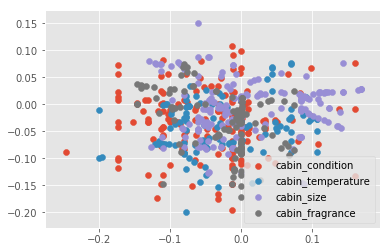


Training Fresh


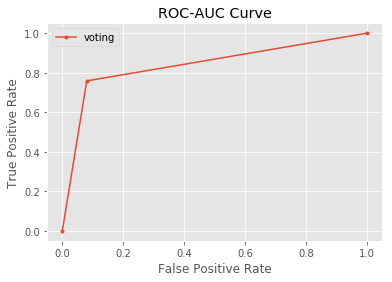


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.67      0.72      0.69        60
  cabin_fragrance       0.79      0.85      0.81        39
       cabin_size       0.84      0.73      0.78        52
cabin_temperature       0.77      0.77      0.77        44

         accuracy                           0.76       195
        macro avg       0.77      0.77      0.77       195
     weighted avg       0.76      0.76      0.76       195


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.8422366173193988	
 2. F1 Score: 0.7589743589743589	
 3. Average absolute error: 0.12 degrees


In [45]:
model('voting', 'cabin', 'SMOTE')


Beginning the XG Boost Classification Model Processing

 Using MULTICLASS SOFTMAX classification approach for XG Boost since there are 4 classes

Counter({'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39, 'cabin_fragrance': 20})

 Viewing class scattered distribution


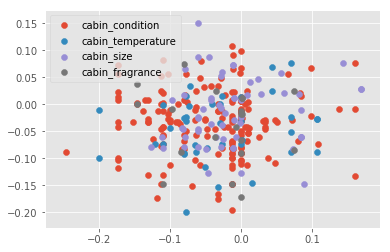


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


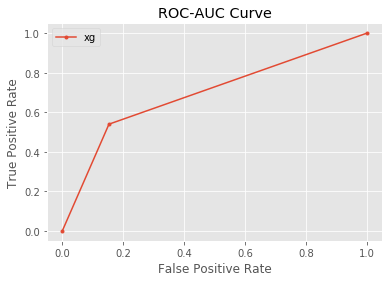


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.61      0.77      0.68        57
  cabin_fragrance       0.17      0.11      0.13         9
       cabin_size       0.50      0.32      0.39        19
cabin_temperature       0.30      0.20      0.24        15

         accuracy                           0.54       100
        macro avg       0.39      0.35      0.36       100
     weighted avg       0.50      0.54      0.51       100


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.5670369435579313	
 2. F1 Score: 0.54	
 3. Average absolute error: 0.23 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'cabin_condition': 182, 'cabin_size': 182, 'cabin_temperature': 96, 'cabin_fragrance': 61})

 Viewing class scattered distribution


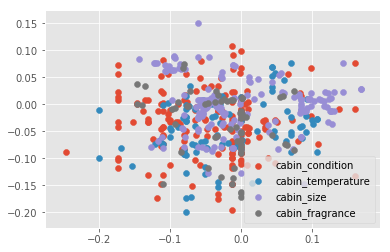


Training Fresh


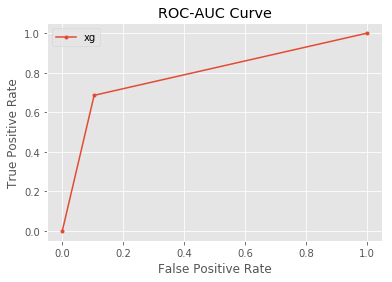


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.67      0.71      0.69        65
  cabin_fragrance       0.71      0.50      0.59        20
       cabin_size       0.75      0.73      0.74        49
cabin_temperature       0.63      0.68      0.66        38

         accuracy                           0.69       172
        macro avg       0.69      0.66      0.67       172
     weighted avg       0.69      0.69      0.68       172


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.7719782971175221	
 2. F1 Score: 0.686046511627907	
 3. Average absolute error: 0.16 degrees


In [46]:
model('xg', 'cabin', 'SMOTE')

# Entertainment


Beginning the Linear Support Vector Machine Classification Model Processing
Counter({'entertainment_general': 211, 'entertainment_visual': 154, 'entertainment_audio': 26})

 Viewing class scattered distribution


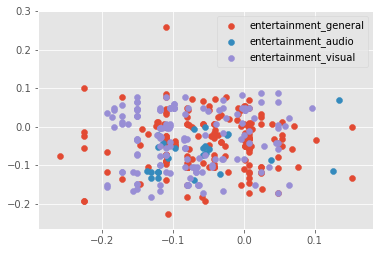


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


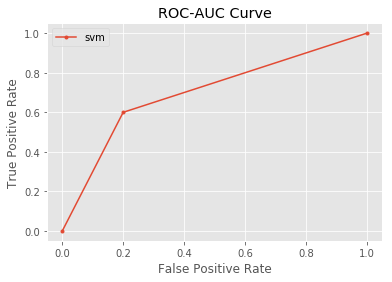


 Classification Report is as follows
                       precision    recall  f1-score   support

  entertainment_audio       0.50      0.07      0.12        14
entertainment_general       0.67      0.75      0.71        69
 entertainment_visual       0.50      0.53      0.52        47

             accuracy                           0.60       130
            macro avg       0.56      0.45      0.45       130
         weighted avg       0.59      0.60      0.58       130


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.603485272720398	
 2. F1 Score: 0.6	
 3. Average absolute error: 0.27 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'entertainment_general': 211, 'entertainment_audio': 211, 'entertainment_visual': 211})

 Viewing class scattered distribution


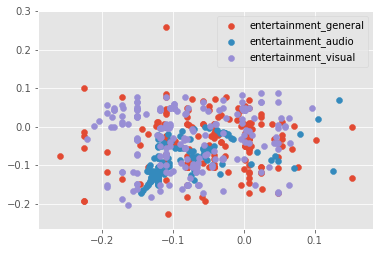


Training Fresh


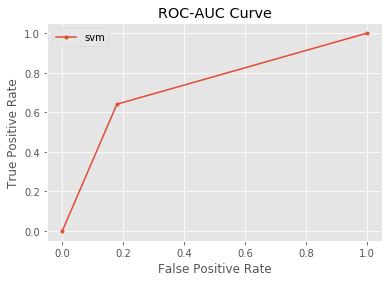


 Classification Report is as follows
                       precision    recall  f1-score   support

  entertainment_audio       0.72      0.78      0.75        60
entertainment_general       0.68      0.53      0.59        80
 entertainment_visual       0.55      0.65      0.60        69

             accuracy                           0.64       209
            macro avg       0.65      0.65      0.65       209
         weighted avg       0.65      0.64      0.64       209


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.7367295672122763	
 2. F1 Score: 0.6411483253588517	
 3. Average absolute error: 0.24 degrees


In [47]:

model('svm', 'entertainment', 'SMOTE')


Beginning the Decision Tree Classification Model Processing
Counter({'entertainment_general': 211, 'entertainment_visual': 154, 'entertainment_audio': 26})

 Viewing class scattered distribution


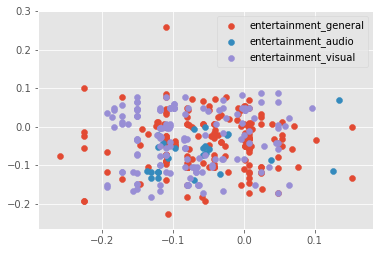


 Training without fixing imbalance


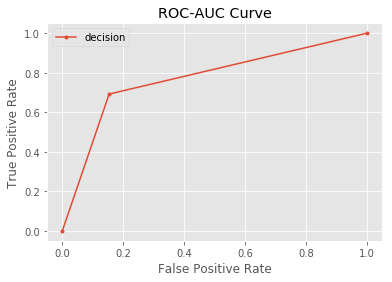


 Classification Report is as follows
                       precision    recall  f1-score   support

  entertainment_audio       0.20      0.07      0.11        14
entertainment_general       0.75      0.81      0.78        69
 entertainment_visual       0.66      0.70      0.68        47

             accuracy                           0.69       130
            macro avg       0.54      0.53      0.52       130
         weighted avg       0.66      0.69      0.67       130


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.6723954980560669	
 2. F1 Score: 0.6923076923076923	
 3. Average absolute error: 0.21 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'entertainment_general': 211, 'entertainment_audio': 211, 'entertainment_visual': 211})

 Viewing class scattered distribution


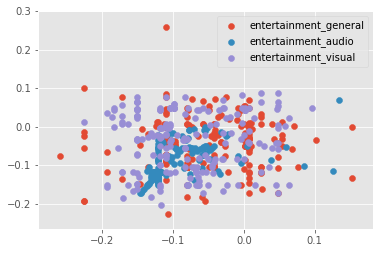


Training Fresh


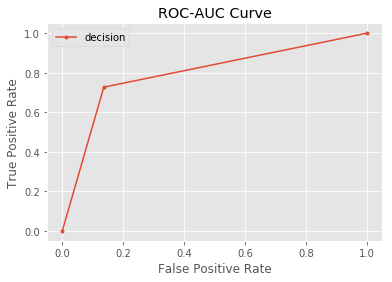


 Classification Report is as follows
                       precision    recall  f1-score   support

  entertainment_audio       0.84      0.90      0.87        60
entertainment_general       0.73      0.66      0.69        80
 entertainment_visual       0.62      0.65      0.64        69

             accuracy                           0.73       209
            macro avg       0.73      0.74      0.73       209
         weighted avg       0.73      0.73      0.73       209


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.799943986089447	
 2. F1 Score: 0.7272727272727273	
 3. Average absolute error: 0.18 degrees


In [48]:
model('decision', 'entertainment', 'SMOTE')


Beginning the Random Forest Classification Model Processing
Counter({'entertainment_general': 211, 'entertainment_visual': 154, 'entertainment_audio': 26})

 Viewing class scattered distribution


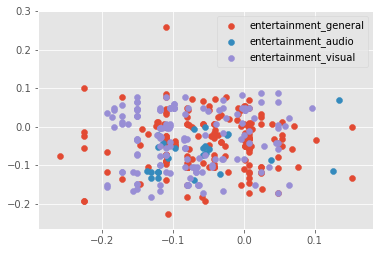


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


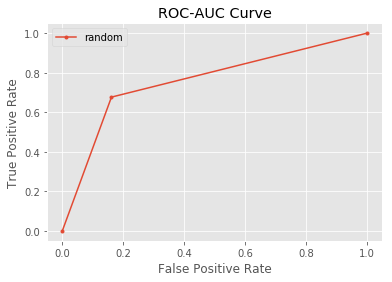


 Classification Report is as follows
                       precision    recall  f1-score   support

  entertainment_audio       0.50      0.07      0.12        14
entertainment_general       0.72      0.81      0.76        69
 entertainment_visual       0.62      0.66      0.64        47

             accuracy                           0.68       130
            macro avg       0.61      0.51      0.51       130
         weighted avg       0.66      0.68      0.65       130


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.6574008587335893	
 2. F1 Score: 0.676923076923077	
 3. Average absolute error: 0.22 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'entertainment_general': 211, 'entertainment_audio': 211, 'entertainment_visual': 211})

 Viewing class scattered distribution


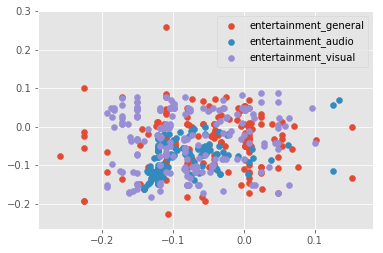


Training Fresh


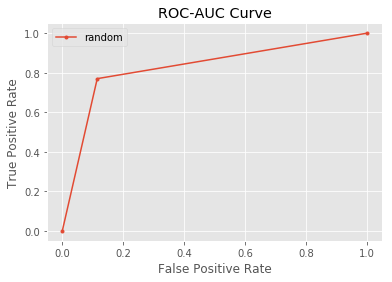


 Classification Report is as follows
                       precision    recall  f1-score   support

  entertainment_audio       0.91      0.87      0.89        60
entertainment_general       0.78      0.66      0.72        80
 entertainment_visual       0.67      0.81      0.73        69

             accuracy                           0.77       209
            macro avg       0.79      0.78      0.78       209
         weighted avg       0.78      0.77      0.77       209


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.8318207921363184	
 2. F1 Score: 0.7703349282296652	
 3. Average absolute error: 0.15 degrees


In [49]:
model('random', 'entertainment', 'SMOTE')


Beginning the Voting Classifier Model Processing
Counter({'entertainment_general': 211, 'entertainment_visual': 154, 'entertainment_audio': 26})

 Viewing class scattered distribution


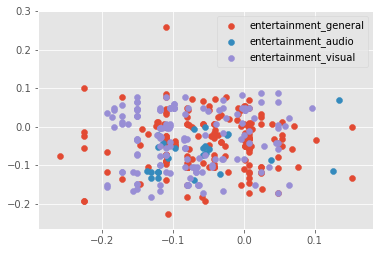


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


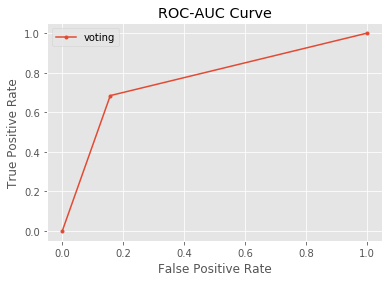


 Classification Report is as follows
                       precision    recall  f1-score   support

  entertainment_audio       0.38      0.21      0.27        14
entertainment_general       0.76      0.83      0.79        69
 entertainment_visual       0.62      0.62      0.62        47

             accuracy                           0.68       130
            macro avg       0.58      0.55      0.56       130
         weighted avg       0.67      0.68      0.67       130


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.6837235103391173	
 2. F1 Score: 0.6846153846153846	
 3. Average absolute error: 0.21 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'entertainment_general': 211, 'entertainment_audio': 211, 'entertainment_visual': 211})

 Viewing class scattered distribution


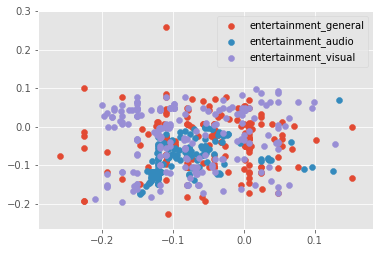


Training Fresh


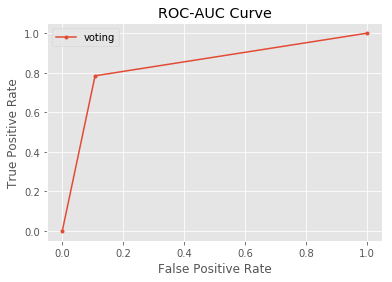


 Classification Report is as follows
                       precision    recall  f1-score   support

  entertainment_audio       0.88      0.88      0.88        60
entertainment_general       0.79      0.66      0.72        80
 entertainment_visual       0.71      0.84      0.77        69

             accuracy                           0.78       209
            macro avg       0.79      0.80      0.79       209
         weighted avg       0.79      0.78      0.78       209


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.8432462457491553	
 2. F1 Score: 0.784688995215311	
 3. Average absolute error: 0.14 degrees


In [50]:
model('voting', 'entertainment', 'SMOTE')


Beginning the XG Boost Classification Model Processing

 Using MULTICLASS SOFTMAX classification approach for XG Boost since there are 3 classes

Counter({'entertainment_general': 211, 'entertainment_visual': 154, 'entertainment_audio': 26})

 Viewing class scattered distribution


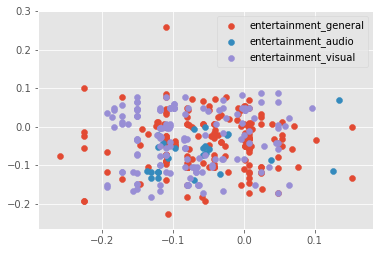


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


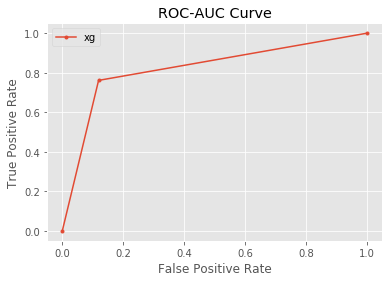


 Classification Report is as follows
                       precision    recall  f1-score   support

  entertainment_audio       0.67      0.14      0.24        14
entertainment_general       0.79      0.88      0.84        69
 entertainment_visual       0.72      0.77      0.74        47

             accuracy                           0.76       130
            macro avg       0.73      0.60      0.60       130
         weighted avg       0.75      0.76      0.74       130


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.7255470150437633	
 2. F1 Score: 0.7615384615384615	
 3. Average absolute error: 0.16 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'entertainment_general': 211, 'entertainment_audio': 211, 'entertainment_visual': 211})

 Viewing class scattered distribution


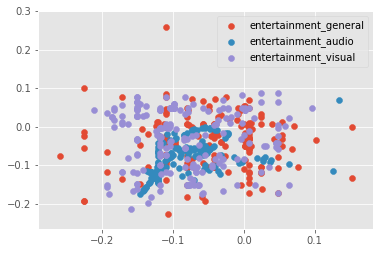


Training Fresh


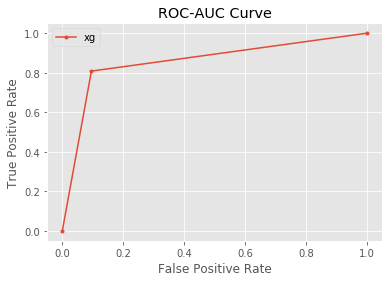


 Classification Report is as follows
                       precision    recall  f1-score   support

  entertainment_audio       0.87      0.90      0.89        60
entertainment_general       0.82      0.76      0.79        80
 entertainment_visual       0.74      0.78      0.76        69

             accuracy                           0.81       209
            macro avg       0.81      0.82      0.81       209
         weighted avg       0.81      0.81      0.81       209


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.8591546568286089	
 2. F1 Score: 0.8086124401913876	
 3. Average absolute error: 0.13 degrees


In [51]:
model('xg', 'entertainment', 'SMOTE')

# In-flight


Beginning the Linear Support Vector Machine Classification Model Processing
Counter({'inflight_operations': 327, 'inflight_facility': 263})

 Viewing class scattered distribution


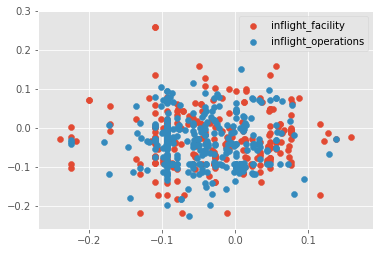


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


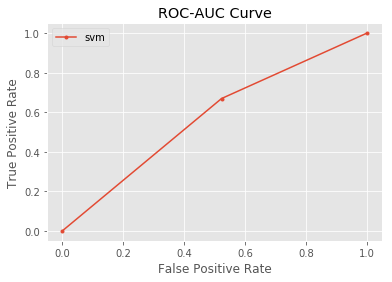


 Classification Report is as follows
                     precision    recall  f1-score   support

  inflight_facility       0.53      0.48      0.50        86
inflight_operations       0.62      0.67      0.64       109

           accuracy                           0.58       195
          macro avg       0.58      0.57      0.57       195
       weighted avg       0.58      0.58      0.58       195


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.5732344783443567	
 2. F1 Score: 0.6431718061674009	
 3. Average absolute error: 0.42 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'inflight_facility': 327, 'inflight_operations': 327})

 Viewing class scattered distribution


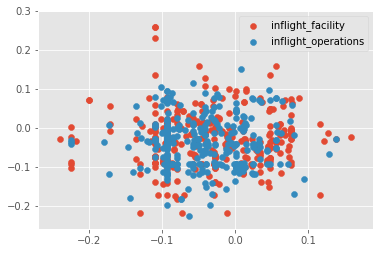


Training Fresh


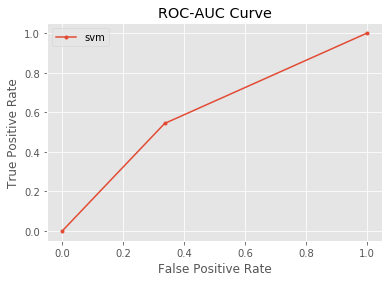


 Classification Report is as follows
                     precision    recall  f1-score   support

  inflight_facility       0.61      0.66      0.64       113
inflight_operations       0.60      0.54      0.57       103

           accuracy                           0.61       216
          macro avg       0.61      0.60      0.60       216
       weighted avg       0.61      0.61      0.61       216


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.6037030672738207	
 2. F1 Score: 0.5685279187817259	
 3. Average absolute error: 0.39 degrees


In [52]:
model('svm', 'inflight', 'SMOTE')


Beginning the Decision Tree Classification Model Processing
Counter({'inflight_operations': 327, 'inflight_facility': 263})

 Viewing class scattered distribution


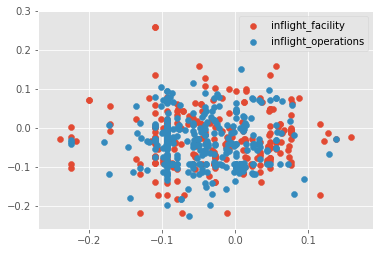


 Training without fixing imbalance


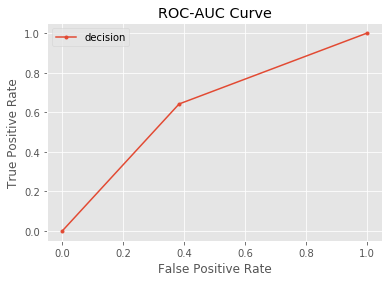


 Classification Report is as follows
                     precision    recall  f1-score   support

  inflight_facility       0.58      0.62      0.60        86
inflight_operations       0.68      0.64      0.66       109

           accuracy                           0.63       195
          macro avg       0.63      0.63      0.63       195
       weighted avg       0.63      0.63      0.63       195


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.6292404523149137	
 2. F1 Score: 0.6603773584905661	
 3. Average absolute error: 0.37 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'inflight_facility': 327, 'inflight_operations': 327})

 Viewing class scattered distribution


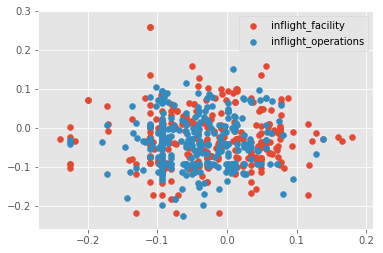


Training Fresh


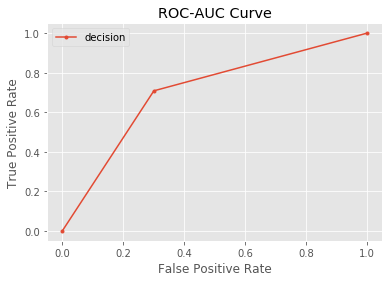


 Classification Report is as follows
                     precision    recall  f1-score   support

  inflight_facility       0.72      0.70      0.71       113
inflight_operations       0.68      0.71      0.70       103

           accuracy                           0.70       216
          macro avg       0.70      0.70      0.70       216
       weighted avg       0.70      0.70      0.70       216


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.7039264541627288	
 2. F1 Score: 0.6952380952380953	
 3. Average absolute error: 0.3 degrees


In [53]:
model('decision', 'inflight', 'SMOTE')


Beginning the Random Forest Classification Model Processing
Counter({'inflight_operations': 327, 'inflight_facility': 263})

 Viewing class scattered distribution


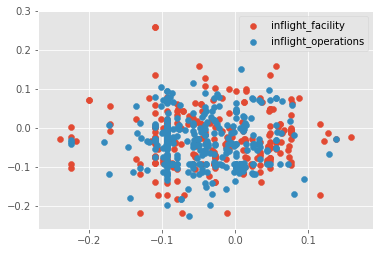


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


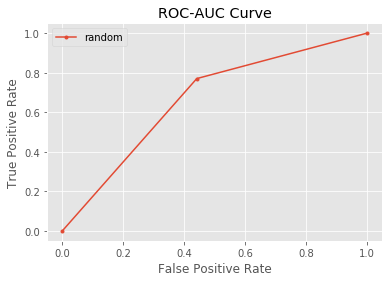


 Classification Report is as follows
                     precision    recall  f1-score   support

  inflight_facility       0.66      0.56      0.60        86
inflight_operations       0.69      0.77      0.73       109

           accuracy                           0.68       195
          macro avg       0.67      0.66      0.67       195
       weighted avg       0.67      0.68      0.67       195


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.6643908683592916	
 2. F1 Score: 0.7272727272727273	
 3. Average absolute error: 0.32 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'inflight_facility': 327, 'inflight_operations': 327})

 Viewing class scattered distribution


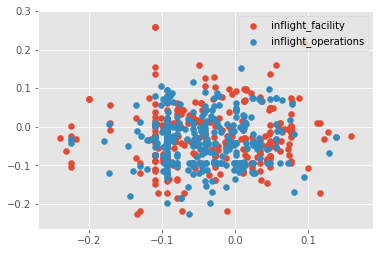


Training Fresh


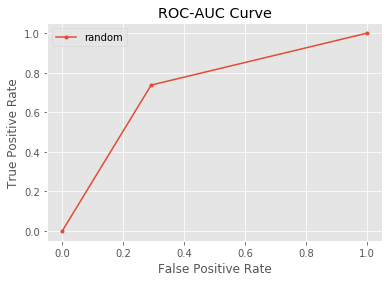


 Classification Report is as follows
                     precision    recall  f1-score   support

  inflight_facility       0.75      0.71      0.73       113
inflight_operations       0.70      0.74      0.72       103

           accuracy                           0.72       216
          macro avg       0.72      0.72      0.72       216
       weighted avg       0.72      0.72      0.72       216


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.7229143397199073	
 2. F1 Score: 0.7169811320754718	
 3. Average absolute error: 0.28 degrees


In [54]:
model('random', 'inflight', 'SMOTE')


Beginning the Voting Classifier Model Processing
Counter({'inflight_operations': 327, 'inflight_facility': 263})

 Viewing class scattered distribution


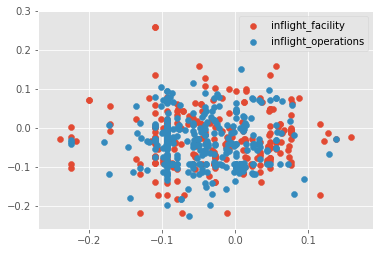


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


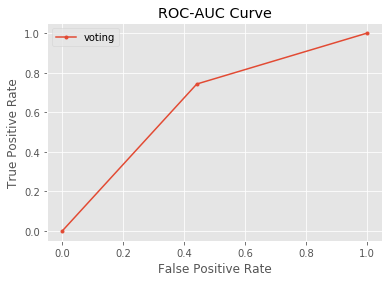


 Classification Report is as follows
                     precision    recall  f1-score   support

  inflight_facility       0.63      0.56      0.59        86
inflight_operations       0.68      0.74      0.71       109

           accuracy                           0.66       195
          macro avg       0.66      0.65      0.65       195
       weighted avg       0.66      0.66      0.66       195


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.6506294004693834	
 2. F1 Score: 0.7105263157894737	
 3. Average absolute error: 0.34 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'inflight_facility': 327, 'inflight_operations': 327})

 Viewing class scattered distribution


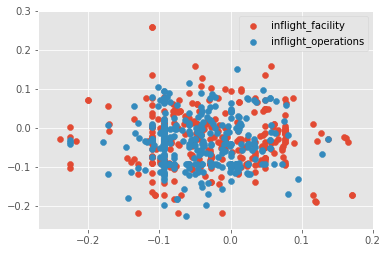


Training Fresh


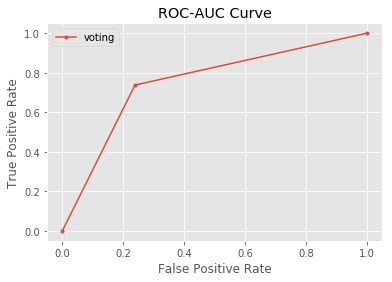


 Classification Report is as follows
                     precision    recall  f1-score   support

  inflight_facility       0.76      0.76      0.76       113
inflight_operations       0.74      0.74      0.74       103

           accuracy                           0.75       216
          macro avg       0.75      0.75      0.75       216
       weighted avg       0.75      0.75      0.75       216


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.7494630122862789	
 2. F1 Score: 0.7378640776699028	
 3. Average absolute error: 0.25 degrees


In [55]:
model('voting', 'inflight', 'SMOTE')


Beginning the XG Boost Classification Model Processing

 Using LOGISTIC BINARY classification for XG Boost since there are only 2 classes

Counter({'inflight_operations': 327, 'inflight_facility': 263})

 Viewing class scattered distribution


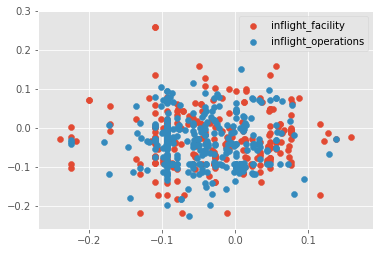


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


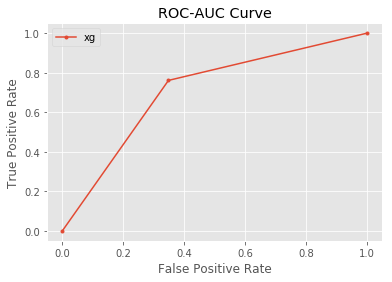


 Classification Report is as follows
                     precision    recall  f1-score   support

  inflight_facility       0.68      0.65      0.67        86
inflight_operations       0.73      0.76      0.75       109

           accuracy                           0.71       195
          macro avg       0.71      0.71      0.71       195
       weighted avg       0.71      0.71      0.71       195


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.7063153403029656	
 2. F1 Score: 0.7477477477477478	
 3. Average absolute error: 0.29 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'inflight_facility': 327, 'inflight_operations': 327})

 Viewing class scattered distribution


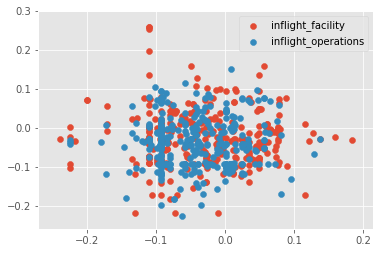


Training Fresh


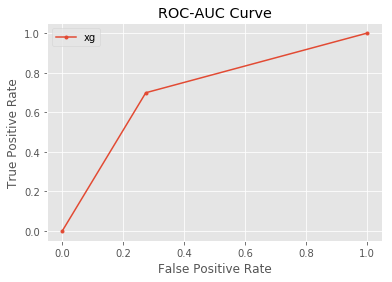


 Classification Report is as follows
                     precision    recall  f1-score   support

  inflight_facility       0.73      0.73      0.73       113
inflight_operations       0.70      0.70      0.70       103

           accuracy                           0.71       216
          macro avg       0.71      0.71      0.71       216
       weighted avg       0.71      0.71      0.71       216


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.7123464215138757	
 2. F1 Score: 0.6990291262135923	
 3. Average absolute error: 0.29 degrees


In [56]:
model('xg', 'inflight', 'SMOTE')

# Off-flight


Beginning the XG Boost Classification Model Processing

 Using MULTICLASS SOFTMAX classification approach for XG Boost since there are 3 classes

Counter({'offflight_facility': 1114, 'offflight_general': 871, 'offflight_ticketing': 614})

 Viewing class scattered distribution


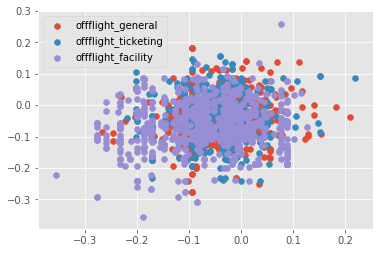


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


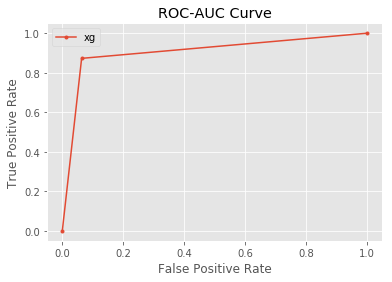


 Classification Report is as follows
                     precision    recall  f1-score   support

 offflight_facility       0.88      0.92      0.90       370
  offflight_general       0.89      0.85      0.87       278
offflight_ticketing       0.84      0.82      0.83       210

           accuracy                           0.87       858
          macro avg       0.87      0.86      0.87       858
       weighted avg       0.87      0.87      0.87       858


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.8988654071176239	
 2. F1 Score: 0.872960372960373	
 3. Average absolute error: 0.08 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'offflight_general': 1114, 'offflight_ticketing': 1114, 'offflight_facility': 1114})

 Viewing class scattered distribution


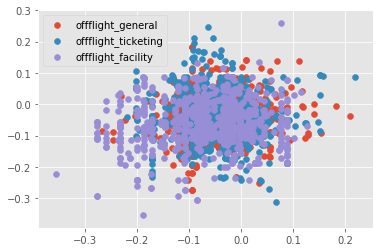


Training Fresh


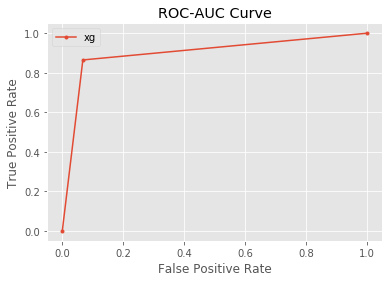


 Classification Report is as follows
                     precision    recall  f1-score   support

 offflight_facility       0.89      0.87      0.88       360
  offflight_general       0.89      0.81      0.85       375
offflight_ticketing       0.82      0.91      0.86       368

           accuracy                           0.86      1103
          macro avg       0.87      0.87      0.87      1103
       weighted avg       0.87      0.86      0.86      1103


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.8988675754097432	
 2. F1 Score: 0.8649138712601995	
 3. Average absolute error: 0.09 degrees


In [57]:
model('xg', 'offflight', 'SMOTE')


Beginning the Voting Classifier Model Processing
Counter({'offflight_facility': 1114, 'offflight_general': 871, 'offflight_ticketing': 614})

 Viewing class scattered distribution


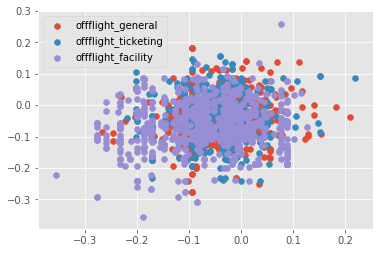


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


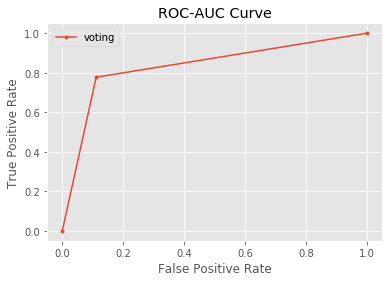


 Classification Report is as follows
                     precision    recall  f1-score   support

 offflight_facility       0.78      0.86      0.82       370
  offflight_general       0.80      0.77      0.79       278
offflight_ticketing       0.74      0.63      0.68       210

           accuracy                           0.78       858
          macro avg       0.77      0.76      0.76       858
       weighted avg       0.78      0.78      0.77       858


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.8194053340036497	
 2. F1 Score: 0.7773892773892774	
 3. Average absolute error: 0.15 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'offflight_general': 1114, 'offflight_ticketing': 1114, 'offflight_facility': 1114})

 Viewing class scattered distribution


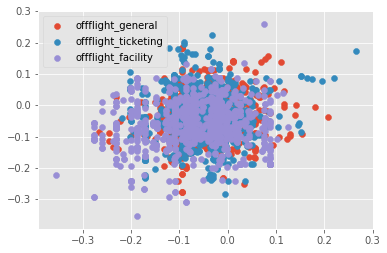


Training Fresh


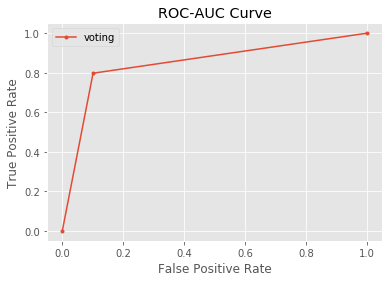


 Classification Report is as follows
                     precision    recall  f1-score   support

 offflight_facility       0.77      0.81      0.79       360
  offflight_general       0.83      0.77      0.80       375
offflight_ticketing       0.80      0.81      0.80       368

           accuracy                           0.80      1103
          macro avg       0.80      0.80      0.80      1103
       weighted avg       0.80      0.80      0.80      1103


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.848565046515472	
 2. F1 Score: 0.7978241160471442	
 3. Average absolute error: 0.13 degrees


In [58]:
model('voting', 'offflight', 'SMOTE')


Beginning the Random Forest Classification Model Processing
Counter({'offflight_facility': 1114, 'offflight_general': 871, 'offflight_ticketing': 614})

 Viewing class scattered distribution


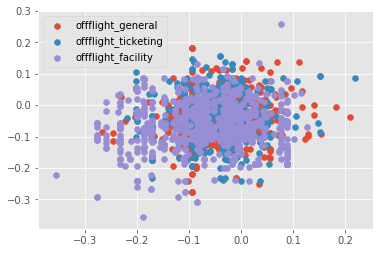


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


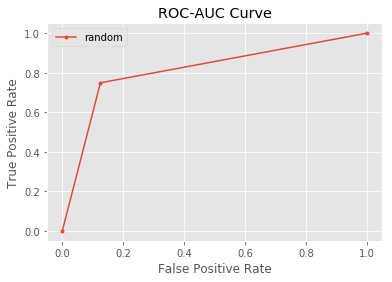


 Classification Report is as follows
                     precision    recall  f1-score   support

 offflight_facility       0.74      0.86      0.80       370
  offflight_general       0.79      0.75      0.77       278
offflight_ticketing       0.71      0.55      0.62       210

           accuracy                           0.75       858
          macro avg       0.75      0.72      0.73       858
       weighted avg       0.75      0.75      0.74       858


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.7938314976459192	
 2. F1 Score: 0.7494172494172494	
 3. Average absolute error: 0.17 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'offflight_general': 1114, 'offflight_ticketing': 1114, 'offflight_facility': 1114})

 Viewing class scattered distribution


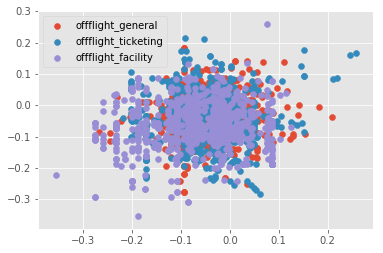


Training Fresh


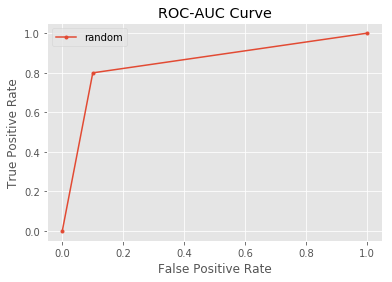


 Classification Report is as follows
                     precision    recall  f1-score   support

 offflight_facility       0.78      0.80      0.79       360
  offflight_general       0.82      0.78      0.80       375
offflight_ticketing       0.80      0.82      0.81       368

           accuracy                           0.80      1103
          macro avg       0.80      0.80      0.80      1103
       weighted avg       0.80      0.80      0.80      1103


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.8498473929002924	
 2. F1 Score: 0.7996373526745241	
 3. Average absolute error: 0.13 degrees


In [59]:
model('random', 'offflight', 'SMOTE')


Beginning the Decision Tree Classification Model Processing
Counter({'offflight_facility': 1114, 'offflight_general': 871, 'offflight_ticketing': 614})

 Viewing class scattered distribution


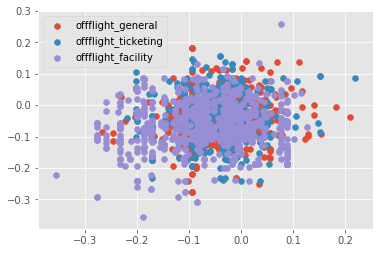


 Training without fixing imbalance


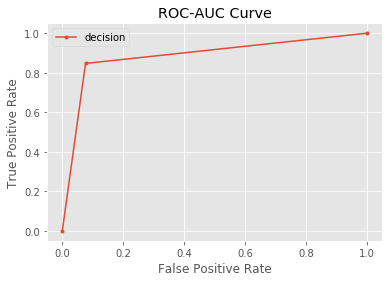


 Classification Report is as follows
                     precision    recall  f1-score   support

 offflight_facility       0.86      0.90      0.88       370
  offflight_general       0.86      0.85      0.86       278
offflight_ticketing       0.80      0.74      0.77       210

           accuracy                           0.85       858
          macro avg       0.84      0.83      0.84       858
       weighted avg       0.85      0.85      0.85       858


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.8768689494084363	
 2. F1 Score: 0.8473193473193473	
 3. Average absolute error: 0.1 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'offflight_general': 1114, 'offflight_ticketing': 1114, 'offflight_facility': 1114})

 Viewing class scattered distribution


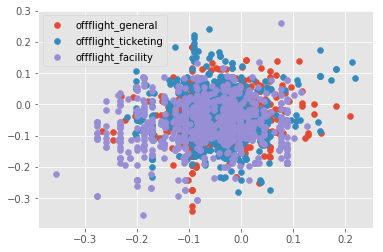


Training Fresh


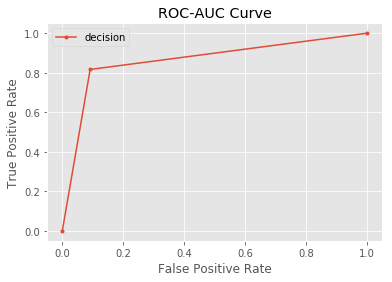


 Classification Report is as follows
                     precision    recall  f1-score   support

 offflight_facility       0.81      0.83      0.82       360
  offflight_general       0.84      0.79      0.81       375
offflight_ticketing       0.80      0.83      0.82       368

           accuracy                           0.82      1103
          macro avg       0.82      0.82      0.82      1103
       weighted avg       0.82      0.82      0.82      1103


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.8628030127386607	
 2. F1 Score: 0.8168631006346329	
 3. Average absolute error: 0.12 degrees


In [60]:
model('decision', 'offflight', 'SMOTE')


Beginning the Linear Support Vector Machine Classification Model Processing
Counter({'offflight_facility': 1114, 'offflight_general': 871, 'offflight_ticketing': 614})

 Viewing class scattered distribution


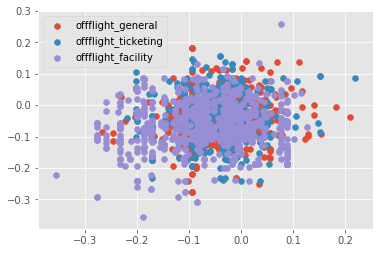


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


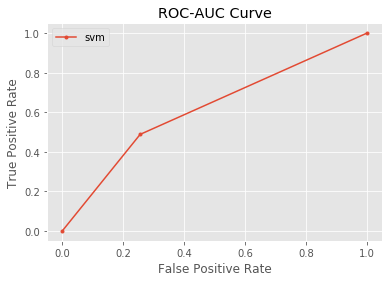


 Classification Report is as follows
                     precision    recall  f1-score   support

 offflight_facility       0.52      0.60      0.56       370
  offflight_general       0.45      0.51      0.48       278
offflight_ticketing       0.46      0.26      0.33       210

           accuracy                           0.49       858
          macro avg       0.48      0.46      0.46       858
       weighted avg       0.48      0.49      0.48       858


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.5938534664107965	
 2. F1 Score: 0.48834498834498835	
 3. Average absolute error: 0.34 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'offflight_general': 1114, 'offflight_ticketing': 1114, 'offflight_facility': 1114})

 Viewing class scattered distribution


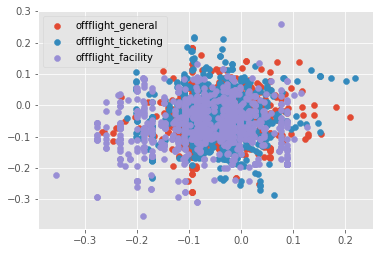


Training Fresh


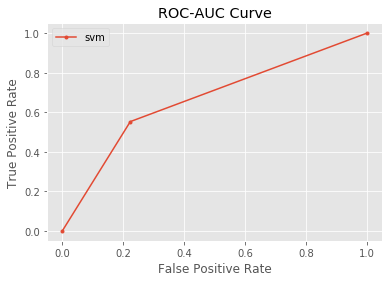


 Classification Report is as follows
                     precision    recall  f1-score   support

 offflight_facility       0.58      0.43      0.50       360
  offflight_general       0.51      0.56      0.54       375
offflight_ticketing       0.57      0.67      0.62       368

           accuracy                           0.55      1103
          macro avg       0.56      0.55      0.55      1103
       weighted avg       0.56      0.55      0.55      1103


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.6641286767844934	
 2. F1 Score: 0.5530371713508613	
 3. Average absolute error: 0.3 degrees


In [61]:
model('svm', 'offflight', 'SMOTE')

# Possession


Beginning the Linear Support Vector Machine Classification Model Processing
Counter({'possession_general': 575, 'possession_handling': 412})

 Viewing class scattered distribution


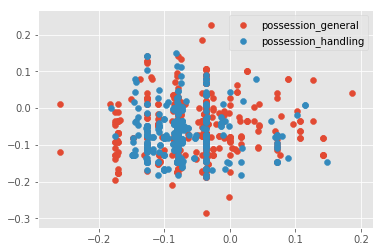


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


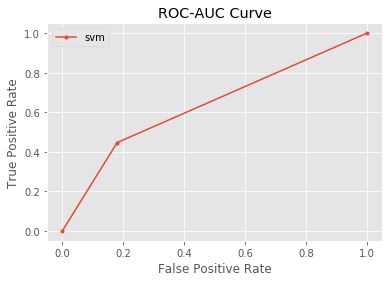


 Classification Report is as follows
                     precision    recall  f1-score   support

 possession_general       0.69      0.82      0.75       194
possession_handling       0.63      0.45      0.52       132

           accuracy                           0.67       326
          macro avg       0.66      0.63      0.63       326
       weighted avg       0.66      0.67      0.66       326


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.6332786629178381	
 2. F1 Score: 0.5221238938053097	
 3. Average absolute error: 0.33 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'possession_general': 575, 'possession_handling': 575})

 Viewing class scattered distribution


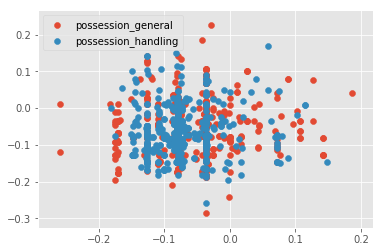


Training Fresh


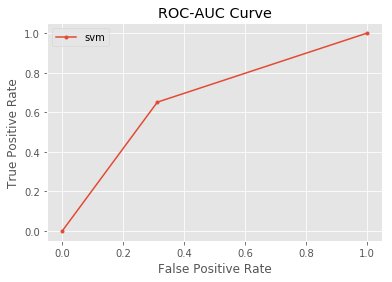


 Classification Report is as follows
                     precision    recall  f1-score   support

 possession_general       0.70      0.69      0.69       205
possession_handling       0.64      0.65      0.65       175

           accuracy                           0.67       380
          macro avg       0.67      0.67      0.67       380
       weighted avg       0.67      0.67      0.67       380


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.669616724738676	
 2. F1 Score: 0.6458923512747875	
 3. Average absolute error: 0.33 degrees


In [62]:
model('svm', 'possession', 'SMOTE')


Beginning the Decision Tree Classification Model Processing
Counter({'possession_general': 575, 'possession_handling': 412})

 Viewing class scattered distribution


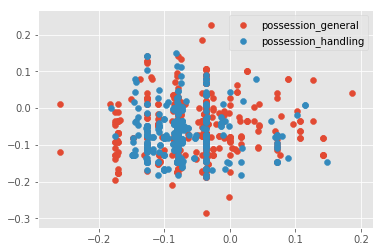


 Training without fixing imbalance


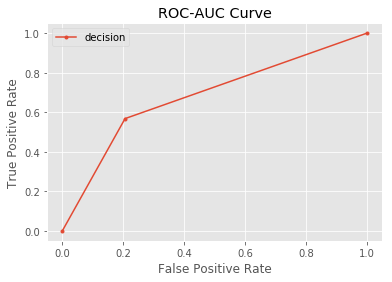


 Classification Report is as follows
                     precision    recall  f1-score   support

 possession_general       0.73      0.79      0.76       194
possession_handling       0.65      0.57      0.61       132

           accuracy                           0.70       326
          macro avg       0.69      0.68      0.68       326
       weighted avg       0.70      0.70      0.70       326


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.6809981255857546	
 2. F1 Score: 0.6072874493927126	
 3. Average absolute error: 0.3 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'possession_general': 575, 'possession_handling': 575})

 Viewing class scattered distribution


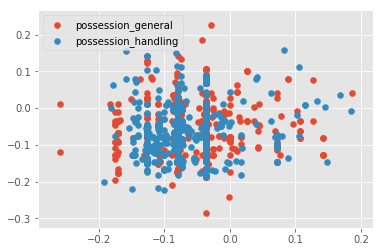


Training Fresh


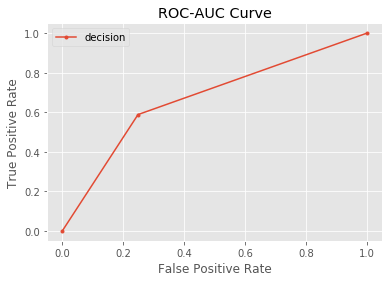


 Classification Report is as follows
                     precision    recall  f1-score   support

 possession_general       0.68      0.75      0.71       205
possession_handling       0.67      0.59      0.63       175

           accuracy                           0.68       380
          macro avg       0.68      0.67      0.67       380
       weighted avg       0.68      0.68      0.67       380


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.6698954703832752	
 2. F1 Score: 0.6261398176291793	
 3. Average absolute error: 0.32 degrees


In [63]:
model('decision', 'possession', 'SMOTE')


Beginning the Random Forest Classification Model Processing
Counter({'possession_general': 575, 'possession_handling': 412})

 Viewing class scattered distribution


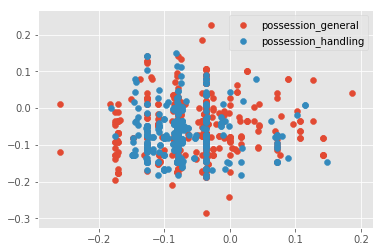


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


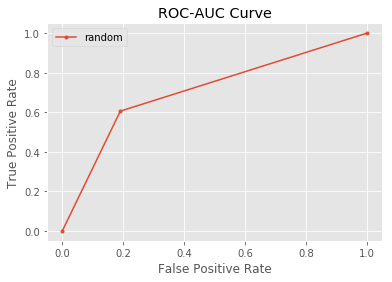


 Classification Report is as follows
                     precision    recall  f1-score   support

 possession_general       0.75      0.81      0.78       194
possession_handling       0.68      0.61      0.64       132

           accuracy                           0.73       326
          macro avg       0.72      0.71      0.71       326
       weighted avg       0.72      0.73      0.72       326


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.707669478288035	
 2. F1 Score: 0.642570281124498	
 3. Average absolute error: 0.27 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'possession_general': 575, 'possession_handling': 575})

 Viewing class scattered distribution


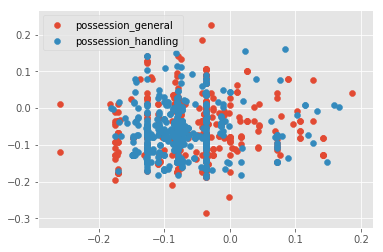


Training Fresh


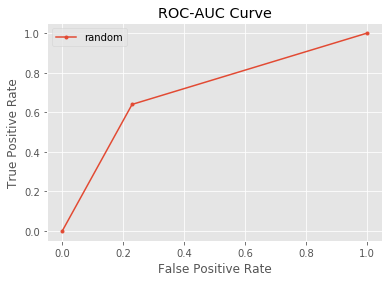


 Classification Report is as follows
                     precision    recall  f1-score   support

 possession_general       0.71      0.77      0.74       205
possession_handling       0.70      0.64      0.67       175

           accuracy                           0.71       380
          macro avg       0.71      0.71      0.71       380
       weighted avg       0.71      0.71      0.71       380


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.7053658536585368	
 2. F1 Score: 0.6706586826347305	
 3. Average absolute error: 0.29 degrees


In [64]:
model('random', 'possession', 'SMOTE')


Beginning the Random Forest Classification Model Processing
Counter({'possession_general': 575, 'possession_handling': 412})

 Viewing class scattered distribution


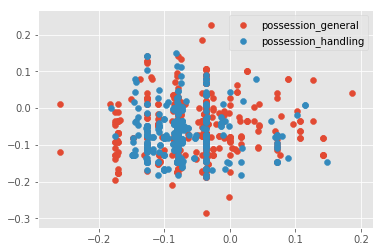


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


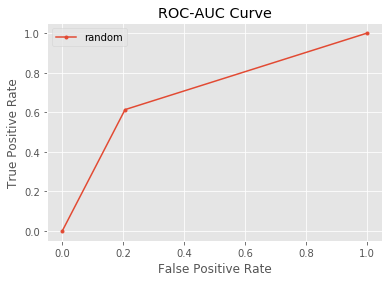


 Classification Report is as follows
                     precision    recall  f1-score   support

 possession_general       0.75      0.79      0.77       194
possession_handling       0.67      0.61      0.64       132

           accuracy                           0.72       326
          macro avg       0.71      0.70      0.71       326
       weighted avg       0.72      0.72      0.72       326


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.7037253983130273	
 2. F1 Score: 0.6403162055335969	
 3. Average absolute error: 0.28 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'possession_general': 575, 'possession_handling': 575})

 Viewing class scattered distribution


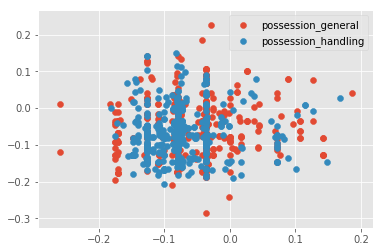


Training Fresh


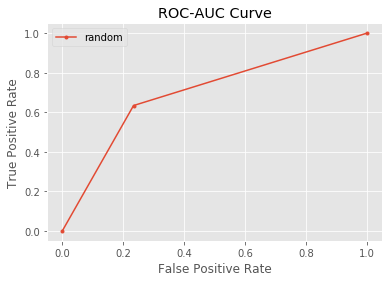


 Classification Report is as follows
                     precision    recall  f1-score   support

 possession_general       0.71      0.77      0.74       205
possession_handling       0.70      0.63      0.66       175

           accuracy                           0.71       380
          macro avg       0.70      0.70      0.70       380
       weighted avg       0.70      0.71      0.70       380


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.7000696864111499	
 2. F1 Score: 0.6646706586826346	
 3. Average absolute error: 0.29 degrees


In [65]:
model('random', 'possession', 'SMOTE')


Beginning the Voting Classifier Model Processing
Counter({'possession_general': 575, 'possession_handling': 412})

 Viewing class scattered distribution


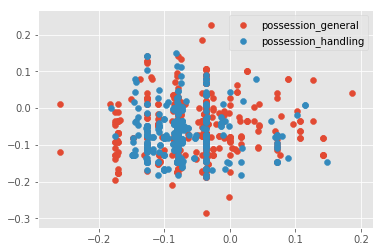


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


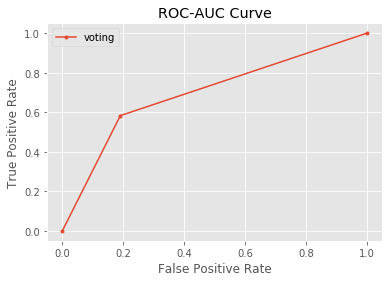


 Classification Report is as follows
                     precision    recall  f1-score   support

 possession_general       0.74      0.81      0.77       194
possession_handling       0.68      0.58      0.63       132

           accuracy                           0.72       326
          macro avg       0.71      0.70      0.70       326
       weighted avg       0.71      0.72      0.71       326


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.6963058419243987	
 2. F1 Score: 0.6260162601626017	
 3. Average absolute error: 0.28 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'possession_general': 575, 'possession_handling': 575})

 Viewing class scattered distribution


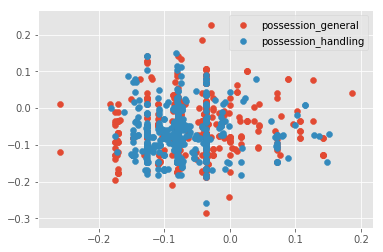


Training Fresh


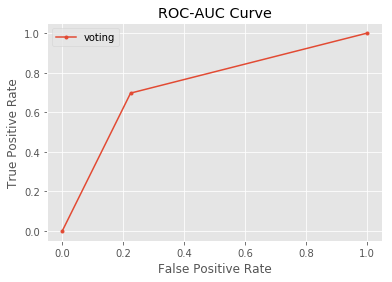


 Classification Report is as follows
                     precision    recall  f1-score   support

 possession_general       0.75      0.78      0.76       205
possession_handling       0.73      0.70      0.71       175

           accuracy                           0.74       380
          macro avg       0.74      0.74      0.74       380
       weighted avg       0.74      0.74      0.74       380


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.736376306620209	
 2. F1 Score: 0.7113702623906706	
 3. Average absolute error: 0.26 degrees


In [66]:
model('voting', 'possession', 'SMOTE')


Beginning the XG Boost Classification Model Processing

 Using LOGISTIC BINARY classification for XG Boost since there are only 2 classes

Counter({'possession_general': 575, 'possession_handling': 412})

 Viewing class scattered distribution


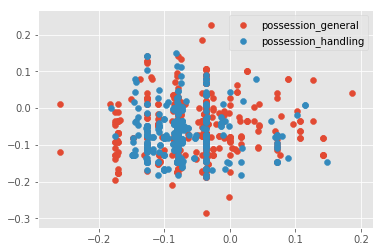


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


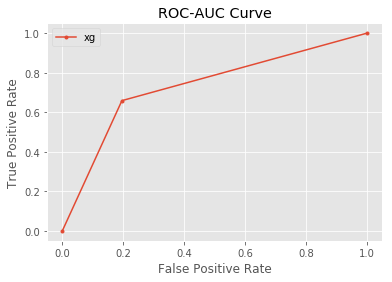


 Classification Report is as follows
                     precision    recall  f1-score   support

 possession_general       0.78      0.80      0.79       194
possession_handling       0.70      0.66      0.68       132

           accuracy                           0.75       326
          macro avg       0.74      0.73      0.73       326
       weighted avg       0.74      0.75      0.74       326


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.7316073102155577	
 2. F1 Score: 0.6770428015564202	
 3. Average absolute error: 0.25 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'possession_general': 575, 'possession_handling': 575})

 Viewing class scattered distribution


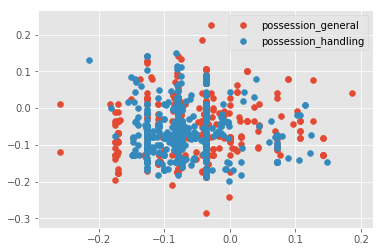


Training Fresh


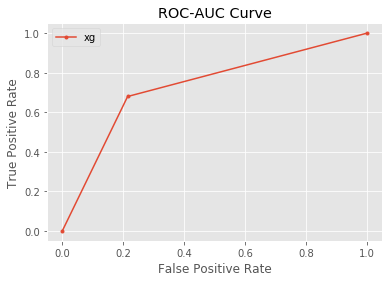


 Classification Report is as follows
                     precision    recall  f1-score   support

 possession_general       0.74      0.79      0.76       205
possession_handling       0.73      0.68      0.70       175

           accuracy                           0.74       380
          macro avg       0.74      0.73      0.73       380
       weighted avg       0.74      0.74      0.74       380


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.7326829268292685	
 2. F1 Score: 0.7041420118343197	
 3. Average absolute error: 0.26 degrees


In [68]:
model('xg', 'possession', 'SMOTE')

# Seat


Beginning the Linear Support Vector Machine Classification Model Processing
Counter({'seat_comfort': 587, 'seat_operations': 570})

 Viewing class scattered distribution


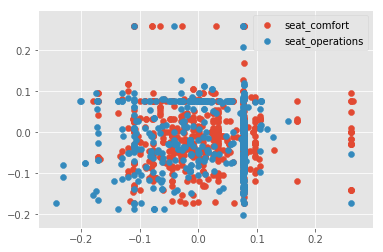


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


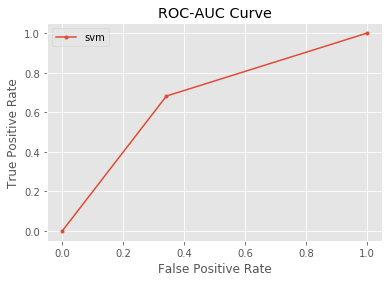


 Classification Report is as follows
                 precision    recall  f1-score   support

   seat_comfort       0.67      0.66      0.66       190
seat_operations       0.67      0.68      0.68       192

       accuracy                           0.67       382
      macro avg       0.67      0.67      0.67       382
   weighted avg       0.67      0.67      0.67       382


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.6700932017543859	
 2. F1 Score: 0.6752577319587629	
 3. Average absolute error: 0.33 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'seat_comfort': 587, 'seat_operations': 587})

 Viewing class scattered distribution


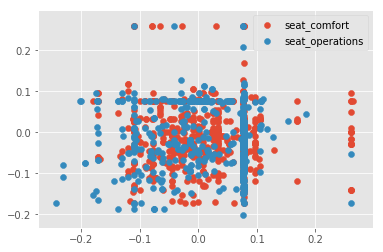


Training Fresh


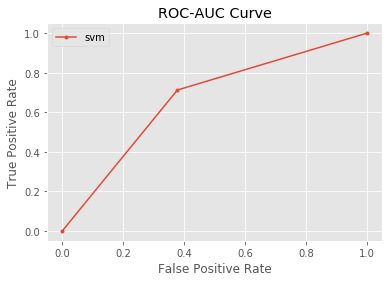


 Classification Report is as follows
                 precision    recall  f1-score   support

   seat_comfort       0.68      0.62      0.65       193
seat_operations       0.66      0.71      0.68       195

       accuracy                           0.67       388
      macro avg       0.67      0.67      0.67       388
   weighted avg       0.67      0.67      0.67       388


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.6672910854258005	
 2. F1 Score: 0.6830466830466831	
 3. Average absolute error: 0.33 degrees


In [69]:
model('svm', 'seat', 'SMOTE')


Beginning the Decision Tree Classification Model Processing
Counter({'seat_comfort': 587, 'seat_operations': 570})

 Viewing class scattered distribution


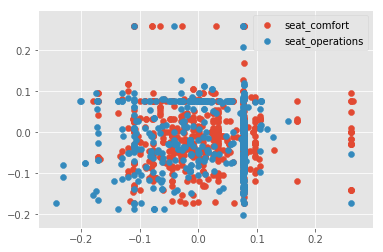


 Training without fixing imbalance


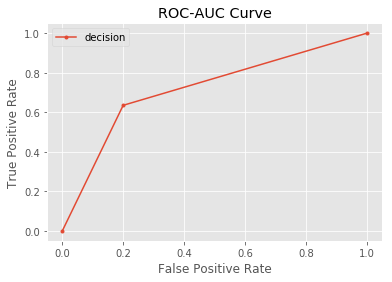


 Classification Report is as follows
                 precision    recall  f1-score   support

   seat_comfort       0.68      0.80      0.74       190
seat_operations       0.76      0.64      0.69       192

       accuracy                           0.72       382
      macro avg       0.72      0.72      0.72       382
   weighted avg       0.72      0.72      0.72       382


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.7177083333333334	
 2. F1 Score: 0.6931818181818181	
 3. Average absolute error: 0.28 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'seat_comfort': 587, 'seat_operations': 587})

 Viewing class scattered distribution


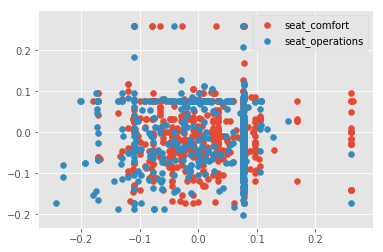


Training Fresh


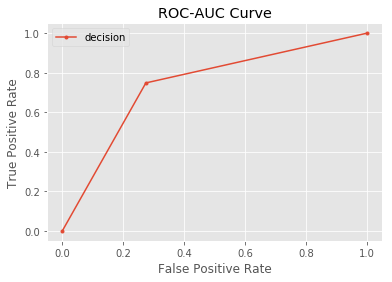


 Classification Report is as follows
                 precision    recall  f1-score   support

   seat_comfort       0.74      0.73      0.73       193
seat_operations       0.73      0.75      0.74       195

       accuracy                           0.74       388
      macro avg       0.74      0.74      0.74       388
   weighted avg       0.74      0.74      0.74       388


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.7370532748771091	
 2. F1 Score: 0.7411167512690356	
 3. Average absolute error: 0.26 degrees


In [74]:
model('decision', 'seat', 'SMOTE')


Beginning the Random Forest Classification Model Processing
Counter({'seat_comfort': 587, 'seat_operations': 570})

 Viewing class scattered distribution


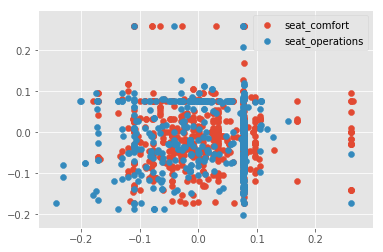


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


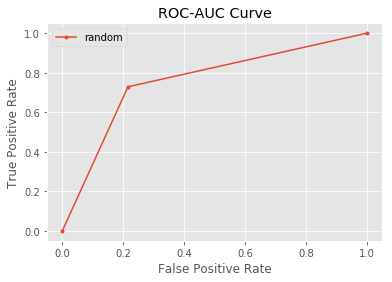


 Classification Report is as follows
                 precision    recall  f1-score   support

   seat_comfort       0.74      0.78      0.76       190
seat_operations       0.77      0.73      0.75       192

       accuracy                           0.76       382
      macro avg       0.76      0.76      0.76       382
   weighted avg       0.76      0.76      0.76       382


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.756688596491228	
 2. F1 Score: 0.7506702412868632	
 3. Average absolute error: 0.24 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'seat_comfort': 587, 'seat_operations': 587})

 Viewing class scattered distribution


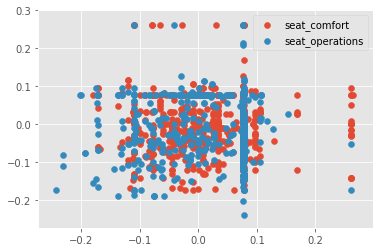


Training Fresh


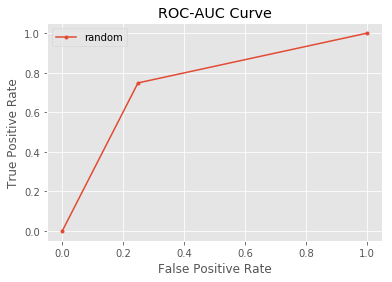


 Classification Report is as follows
                 precision    recall  f1-score   support

   seat_comfort       0.75      0.75      0.75       193
seat_operations       0.75      0.75      0.75       195

       accuracy                           0.75       388
      macro avg       0.75      0.75      0.75       388
   weighted avg       0.75      0.75      0.75       388


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.7500066427527567	
 2. F1 Score: 0.7506426735218509	
 3. Average absolute error: 0.25 degrees


In [75]:
model('random', 'seat', 'SMOTE')


Beginning the Voting Classifier Model Processing
Counter({'seat_comfort': 587, 'seat_operations': 570})

 Viewing class scattered distribution


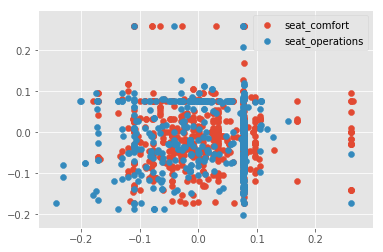


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


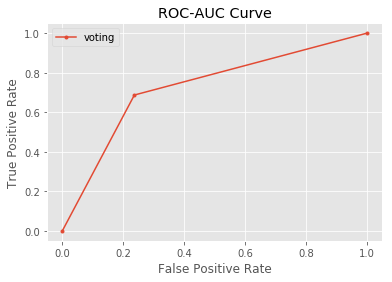


 Classification Report is as follows
                 precision    recall  f1-score   support

   seat_comfort       0.71      0.76      0.73       190
seat_operations       0.75      0.69      0.72       192

       accuracy                           0.73       382
      macro avg       0.73      0.73      0.72       382
   weighted avg       0.73      0.73      0.72       382


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.725328947368421	
 2. F1 Score: 0.7154471544715446	
 3. Average absolute error: 0.27 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'seat_comfort': 587, 'seat_operations': 587})

 Viewing class scattered distribution


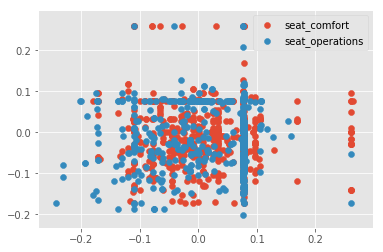


Training Fresh


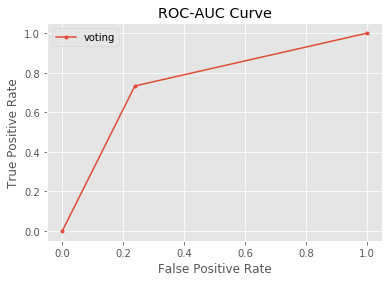


 Classification Report is as follows
                 precision    recall  f1-score   support

   seat_comfort       0.74      0.76      0.75       193
seat_operations       0.76      0.73      0.74       195

       accuracy                           0.75       388
      macro avg       0.75      0.75      0.75       388
   weighted avg       0.75      0.75      0.75       388


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.7474956822107082	
 2. F1 Score: 0.7447916666666667	
 3. Average absolute error: 0.25 degrees


In [76]:
model('voting', 'seat', 'SMOTE')


Beginning the XG Boost Classification Model Processing

 Using LOGISTIC BINARY classification for XG Boost since there are only 2 classes

Counter({'seat_comfort': 587, 'seat_operations': 570})

 Viewing class scattered distribution


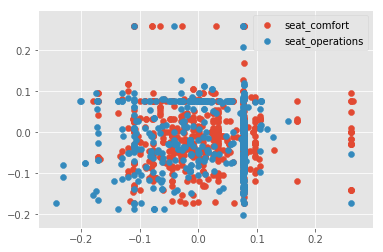


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


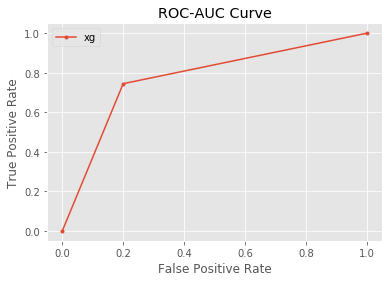


 Classification Report is as follows
                 precision    recall  f1-score   support

   seat_comfort       0.76      0.80      0.78       190
seat_operations       0.79      0.74      0.77       192

       accuracy                           0.77       382
      macro avg       0.77      0.77      0.77       382
   weighted avg       0.77      0.77      0.77       382


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.7723958333333333	
 2. F1 Score: 0.7667560321715818	
 3. Average absolute error: 0.23 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'seat_comfort': 587, 'seat_operations': 587})

 Viewing class scattered distribution


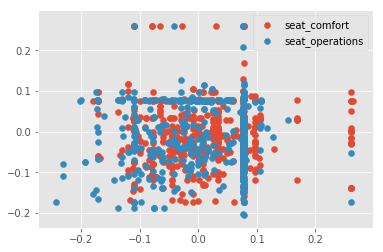


Training Fresh


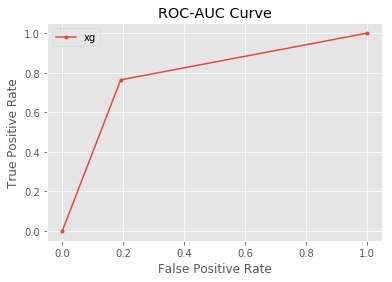


 Classification Report is as follows
                 precision    recall  f1-score   support

   seat_comfort       0.77      0.81      0.79       193
seat_operations       0.80      0.76      0.78       195

       accuracy                           0.79       388
      macro avg       0.79      0.79      0.79       388
   weighted avg       0.79      0.79      0.79       388


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.7861963597714893	
 2. F1 Score: 0.7821522309711285	
 3. Average absolute error: 0.21 degrees


In [77]:
model('xg', 'seat', 'SMOTE')

# Staff


Beginning the Linear Support Vector Machine Classification Model Processing
Counter({'staff_behaviour': 928, 'staff_general': 826})

 Viewing class scattered distribution


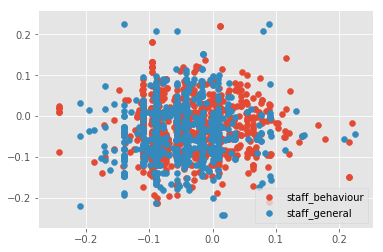


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


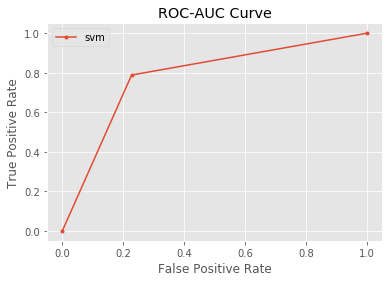


 Classification Report is as follows
                 precision    recall  f1-score   support

staff_behaviour       0.78      0.77      0.77       281
  staff_general       0.79      0.79      0.79       298

       accuracy                           0.78       579
      macro avg       0.78      0.78      0.78       579
   weighted avg       0.78      0.78      0.78       579


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.780416298454704	
 2. F1 Score: 0.7872696817420436	
 3. Average absolute error: 0.22 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'staff_behaviour': 928, 'staff_general': 928})

 Viewing class scattered distribution


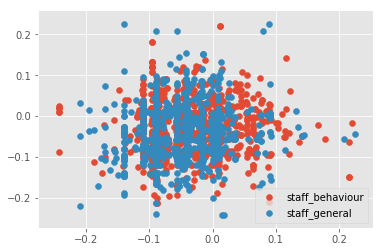


Training Fresh


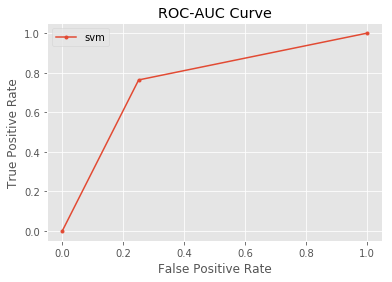


 Classification Report is as follows
                 precision    recall  f1-score   support

staff_behaviour       0.74      0.75      0.74       287
  staff_general       0.78      0.76      0.77       326

       accuracy                           0.76       613
      macro avg       0.76      0.76      0.76       613
   weighted avg       0.76      0.76      0.76       613


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.7564663004211112	
 2. F1 Score: 0.7697063369397218	
 3. Average absolute error: 0.24 degrees


In [78]:
model('svm', 'staff', 'SMOTE')


Beginning the Decision Tree Classification Model Processing
Counter({'staff_behaviour': 928, 'staff_general': 826})

 Viewing class scattered distribution


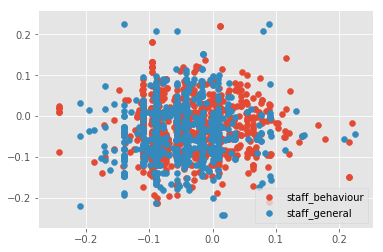


 Training without fixing imbalance


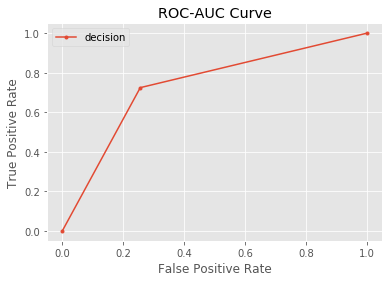


 Classification Report is as follows
                 precision    recall  f1-score   support

staff_behaviour       0.72      0.74      0.73       281
  staff_general       0.75      0.72      0.74       298

       accuracy                           0.73       579
      macro avg       0.73      0.73      0.73       579
   weighted avg       0.73      0.73      0.73       579


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.7343022283789915	
 2. F1 Score: 0.7372013651877134	
 3. Average absolute error: 0.27 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'staff_behaviour': 928, 'staff_general': 928})

 Viewing class scattered distribution


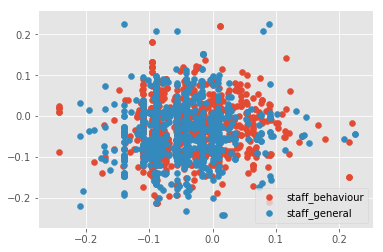


Training Fresh


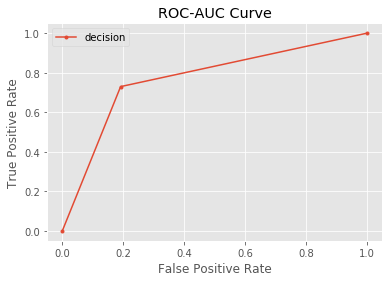


 Classification Report is as follows
                 precision    recall  f1-score   support

staff_behaviour       0.72      0.81      0.76       287
  staff_general       0.81      0.73      0.77       326

       accuracy                           0.77       613
      macro avg       0.77      0.77      0.77       613
   weighted avg       0.77      0.77      0.77       613


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.7692118595156153	
 2. F1 Score: 0.7689822294022618	
 3. Average absolute error: 0.23 degrees


In [79]:
model('decision', 'staff', 'SMOTE')


Beginning the Random Forest Classification Model Processing
Counter({'staff_behaviour': 928, 'staff_general': 826})

 Viewing class scattered distribution


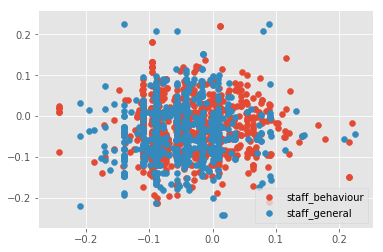


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


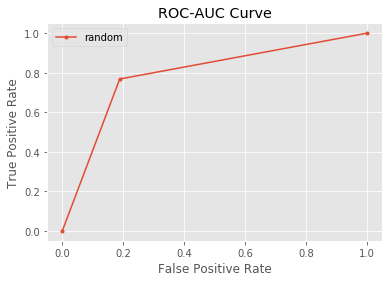


 Classification Report is as follows
                 precision    recall  f1-score   support

staff_behaviour       0.77      0.81      0.79       281
  staff_general       0.81      0.77      0.79       298

       accuracy                           0.79       579
      macro avg       0.79      0.79      0.79       579
   weighted avg       0.79      0.79      0.79       579


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.7899221380973991	
 2. F1 Score: 0.789655172413793	
 3. Average absolute error: 0.21 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'staff_behaviour': 928, 'staff_general': 928})

 Viewing class scattered distribution


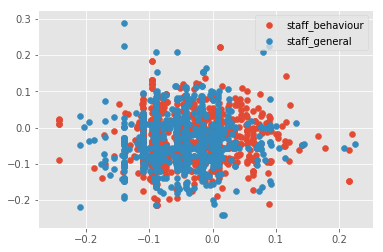


Training Fresh


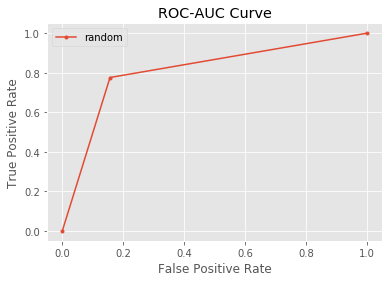


 Classification Report is as follows
                 precision    recall  f1-score   support

staff_behaviour       0.77      0.84      0.80       287
  staff_general       0.85      0.78      0.81       326

       accuracy                           0.81       613
      macro avg       0.81      0.81      0.81       613
   weighted avg       0.81      0.81      0.81       613


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.8096395972723969	
 2. F1 Score: 0.8108974358974358	
 3. Average absolute error: 0.19 degrees


In [80]:
model('random', 'staff', 'SMOTE')


Beginning the Voting Classifier Model Processing
Counter({'staff_behaviour': 928, 'staff_general': 826})

 Viewing class scattered distribution


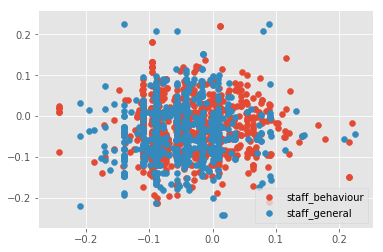


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


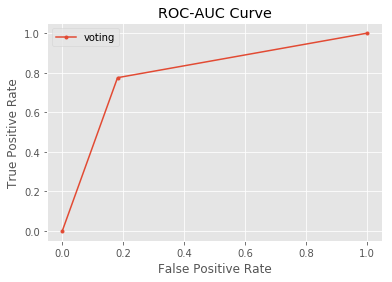


 Classification Report is as follows
                 precision    recall  f1-score   support

staff_behaviour       0.77      0.82      0.80       281
  staff_general       0.82      0.78      0.80       298

       accuracy                           0.80       579
      macro avg       0.80      0.80      0.80       579
   weighted avg       0.80      0.80      0.80       579


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.7968365616565957	
 2. F1 Score: 0.7965517241379311	
 3. Average absolute error: 0.2 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'staff_behaviour': 928, 'staff_general': 928})

 Viewing class scattered distribution


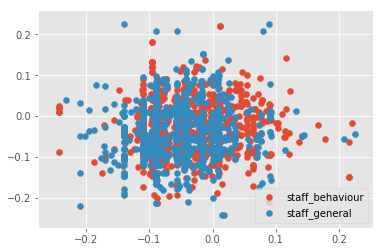


Training Fresh


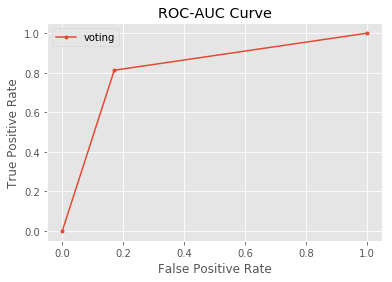


 Classification Report is as follows
                 precision    recall  f1-score   support

staff_behaviour       0.80      0.83      0.81       287
  staff_general       0.84      0.81      0.83       326

       accuracy                           0.82       613
      macro avg       0.82      0.82      0.82       613
   weighted avg       0.82      0.82      0.82       613


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.8210758641328744	
 2. F1 Score: 0.8281250000000001	
 3. Average absolute error: 0.18 degrees


In [81]:
model('voting', 'staff', 'SMOTE')


Beginning the XG Boost Classification Model Processing

 Using LOGISTIC BINARY classification for XG Boost since there are only 2 classes

Counter({'staff_behaviour': 928, 'staff_general': 826})

 Viewing class scattered distribution


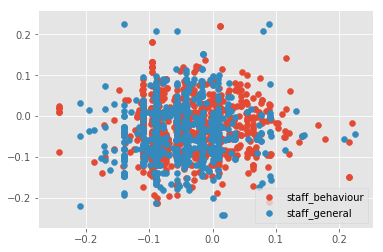


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


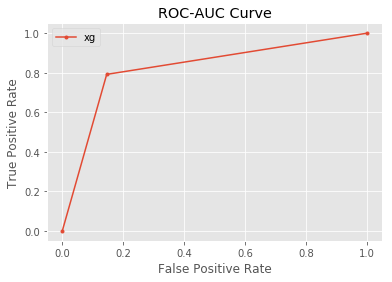


 Classification Report is as follows
                 precision    recall  f1-score   support

staff_behaviour       0.79      0.85      0.82       281
  staff_general       0.85      0.79      0.82       298

       accuracy                           0.82       579
      macro avg       0.82      0.82      0.82       579
   weighted avg       0.82      0.82      0.82       579


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.8230194177076118	
 2. F1 Score: 0.8208695652173912	
 3. Average absolute error: 0.18 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'staff_behaviour': 928, 'staff_general': 928})

 Viewing class scattered distribution


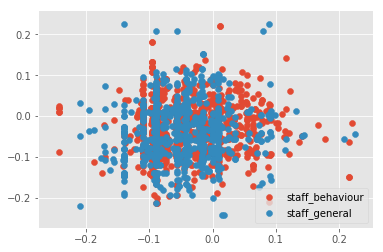


Training Fresh


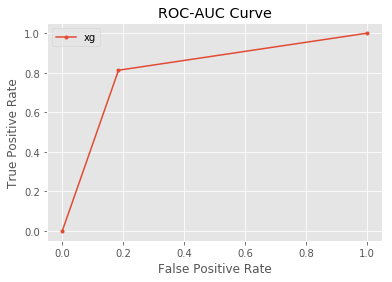


 Classification Report is as follows
                 precision    recall  f1-score   support

staff_behaviour       0.79      0.82      0.80       287
  staff_general       0.83      0.81      0.82       326

       accuracy                           0.81       613
      macro avg       0.81      0.81      0.81       613
   weighted avg       0.81      0.81      0.81       613


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.8141072230178918	
 2. F1 Score: 0.8229813664596273	
 3. Average absolute error: 0.19 degrees


In [82]:
model('xg', 'staff', 'SMOTE')


Beginning the Random Forest Classification Model Processing
Counter({'food_service': 934, 'food_taste': 157, 'food_temperature': 32})

 Viewing class scattered distribution


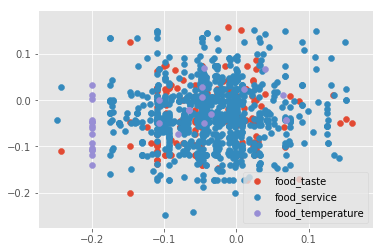


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


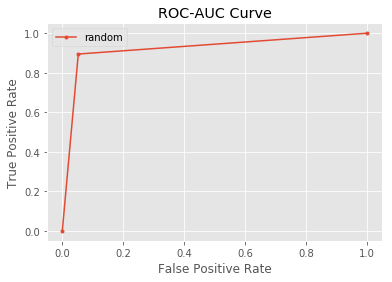


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.91      0.97      0.94       314
      food_taste       0.74      0.43      0.54        47
food_temperature       0.86      0.60      0.71        10

        accuracy                           0.89       371
       macro avg       0.84      0.67      0.73       371
    weighted avg       0.89      0.89      0.88       371


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.7386365895650572	
 2. F1 Score: 0.894878706199461	
 3. Average absolute error: 0.07 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'food_taste': 934, 'food_service': 934, 'food_temperature': 542})

 Viewing class scattered distribution


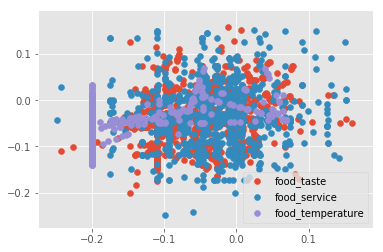


Training Fresh


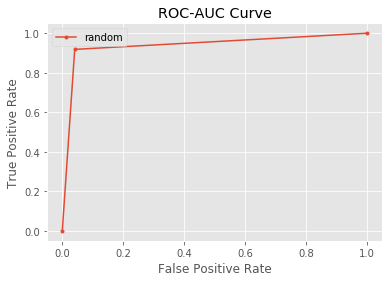


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.89      0.91      0.90       317
      food_taste       0.92      0.91      0.92       316
food_temperature       0.97      0.94      0.96       163

        accuracy                           0.92       796
       macro avg       0.93      0.92      0.92       796
    weighted avg       0.92      0.92      0.92       796


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.939134019650238	
 2. F1 Score: 0.9183417085427136	
 3. Average absolute error: 0.05 degrees


In [44]:
model('random', 'food', 'SMOTE')


Beginning the Random Forest Classification Model Processing
Counter({'food_service': 934, 'food_taste': 157, 'food_temperature': 32})

 Viewing class scattered distribution


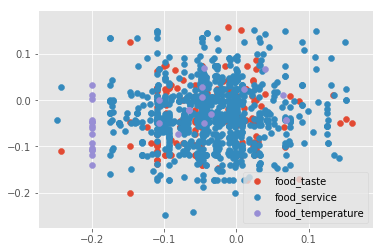


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


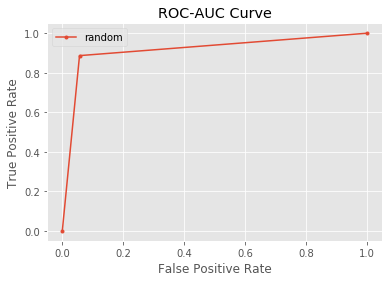


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.90      0.97      0.94       314
      food_taste       0.68      0.40      0.51        47
food_temperature       0.86      0.60      0.71        10

        accuracy                           0.89       371
       macro avg       0.81      0.66      0.72       371
    weighted avg       0.87      0.89      0.87       371


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.7300761359564624	
 2. F1 Score: 0.8867924528301887	
 3. Average absolute error: 0.08 degrees

 Fixing Imbalance

 Using ADA SYN

 After fixing imbalance
Counter({'food_temperature': 937, 'food_service': 934, 'food_taste': 157})

 Viewing class scattered distribution


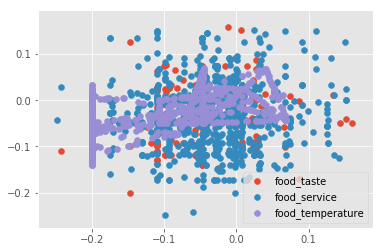


Training Fresh


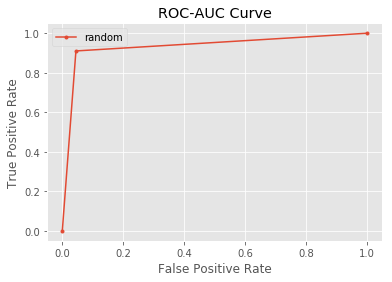


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.87      0.95      0.91       304
      food_taste       0.58      0.31      0.40        59
food_temperature       0.99      0.99      0.99       307

        accuracy                           0.91       670
       macro avg       0.81      0.75      0.77       670
    weighted avg       0.90      0.91      0.90       670


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.8488202570091814	
 2. F1 Score: 0.9104477611940298	
 3. Average absolute error: 0.06 degrees


In [45]:
model('random', 'food', 'ADASYN')


Beginning the Linear Support Vector Machine Classification Model Processing
Counter({'food_service': 934, 'food_taste': 157, 'food_temperature': 32})

 Viewing class scattered distribution


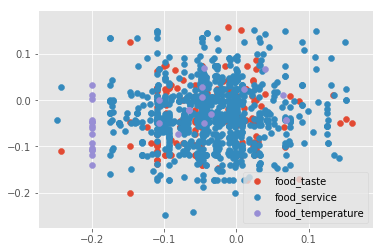


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


C:\Users\Kanishk Verma\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


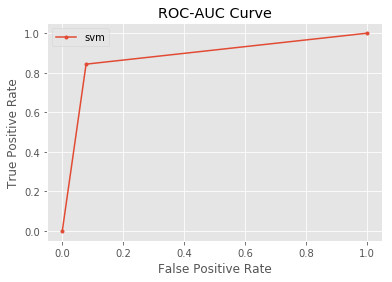


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.87      0.96      0.91       314
      food_taste       0.48      0.21      0.29        47
food_temperature       0.00      0.00      0.00        10

        accuracy                           0.84       371
       macro avg       0.45      0.39      0.40       371
    weighted avg       0.79      0.84      0.81       371


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.5532036815867213	
 2. F1 Score: 0.8436657681940701	
 3. Average absolute error: 0.1 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'food_taste': 934, 'food_service': 934, 'food_temperature': 644})

 Viewing class scattered distribution


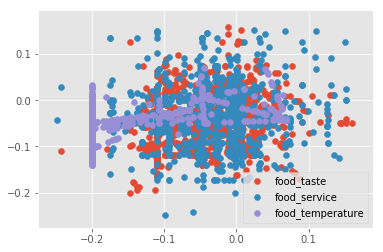


Training Fresh


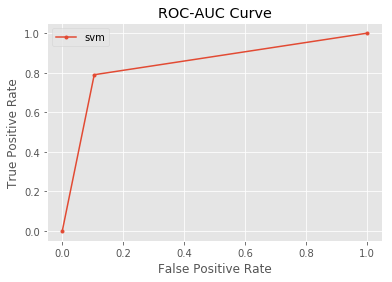


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.82      0.68      0.74       305
      food_taste       0.74      0.81      0.77       309
food_temperature       0.83      0.92      0.87       215

        accuracy                           0.79       829
       macro avg       0.80      0.80      0.80       829
    weighted avg       0.79      0.79      0.79       829


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.8477456991123717	
 2. F1 Score: 0.7901085645355851	
 3. Average absolute error: 0.14 degrees


In [46]:
model('svm', 'food', 'SMOTE')


Beginning the Linear Support Vector Machine Classification Model Processing
Counter({'food_service': 934, 'food_taste': 157, 'food_temperature': 32})

 Viewing class scattered distribution


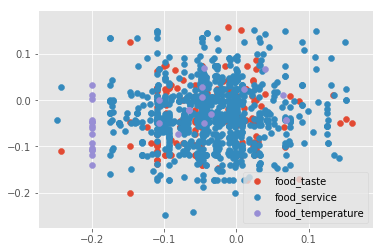


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


C:\Users\Kanishk Verma\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


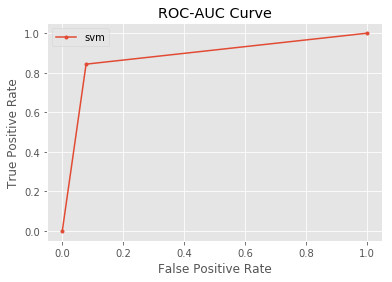


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.87      0.96      0.91       314
      food_taste       0.48      0.21      0.29        47
food_temperature       0.00      0.00      0.00        10

        accuracy                           0.84       371
       macro avg       0.45      0.39      0.40       371
    weighted avg       0.79      0.84      0.81       371


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.5532036815867213	
 2. F1 Score: 0.8436657681940701	
 3. Average absolute error: 0.1 degrees

 Fixing Imbalance

 Using ADA SYN

 After fixing imbalance
Counter({'food_temperature': 937, 'food_service': 934, 'food_taste': 157})

 Viewing class scattered distribution


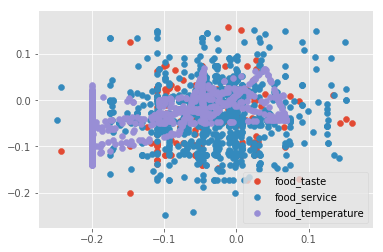


Training Fresh


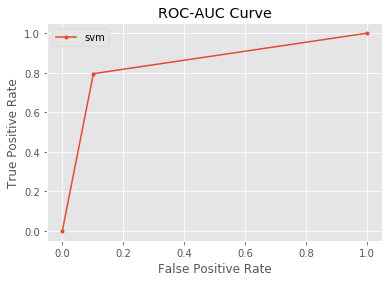


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.80      0.80      0.80       304
      food_taste       0.57      0.07      0.12        59
food_temperature       0.80      0.93      0.86       307

        accuracy                           0.80       670
       macro avg       0.72      0.60      0.59       670
    weighted avg       0.78      0.80      0.77       670


Metrics for svm trained on Original Data
 1. ROC AUC Score: 0.7376744439614416	
 2. F1 Score: 0.7955223880597015	
 3. Average absolute error: 0.14 degrees


In [47]:
model('svm', 'food', 'ADASYN')


Beginning the XG Boost Classification Model Processing

 Using MULTICLASS SOFTMAX classification approach for XG Boost since there are 3 classes

Counter({'food_service': 934, 'food_taste': 157, 'food_temperature': 32})

 Viewing class scattered distribution


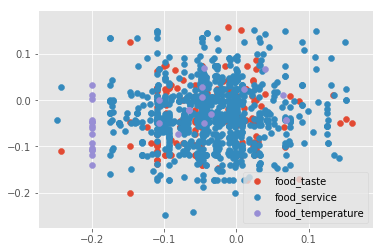


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


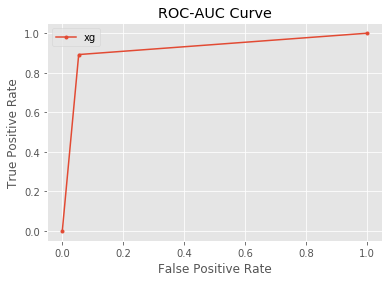


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.92      0.96      0.94       314
      food_taste       0.66      0.53      0.59        47
food_temperature       0.86      0.60      0.71        10

        accuracy                           0.89       371
       macro avg       0.81      0.70      0.74       371
    weighted avg       0.89      0.89      0.89       371


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.7647158359310109	
 2. F1 Score: 0.8921832884097035	
 3. Average absolute error: 0.07 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'food_taste': 934, 'food_service': 934, 'food_temperature': 348})

 Viewing class scattered distribution


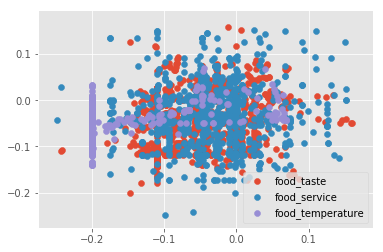


Training Fresh


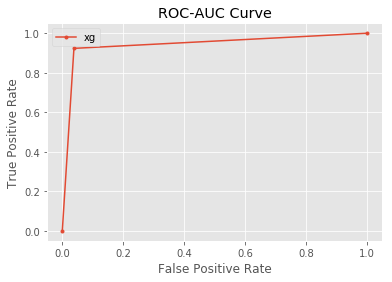


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.92      0.90      0.91       313
      food_taste       0.90      0.94      0.92       300
food_temperature       0.98      0.95      0.97       119

        accuracy                           0.92       732
       macro avg       0.94      0.93      0.93       732
    weighted avg       0.92      0.92      0.92       732


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.9428697735985333	
 2. F1 Score: 0.9234972677595629	
 3. Average absolute error: 0.05 degrees


In [48]:
model('xg', 'food', 'SMOTE')


Beginning the XG Boost Classification Model Processing

 Using MULTICLASS SOFTMAX classification approach for XG Boost since there are 3 classes

Counter({'food_service': 934, 'food_taste': 157, 'food_temperature': 32})

 Viewing class scattered distribution


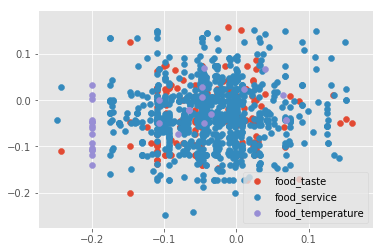


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


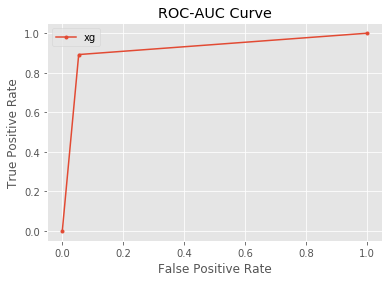


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.92      0.96      0.94       314
      food_taste       0.66      0.53      0.59        47
food_temperature       0.86      0.60      0.71        10

        accuracy                           0.89       371
       macro avg       0.81      0.70      0.74       371
    weighted avg       0.89      0.89      0.89       371


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.7647158359310109	
 2. F1 Score: 0.8921832884097035	
 3. Average absolute error: 0.07 degrees

 Fixing Imbalance

 Using ADA SYN

 After fixing imbalance
Counter({'food_temperature': 937, 'food_service': 934, 'food_taste': 157})

 Viewing class scattered distribution


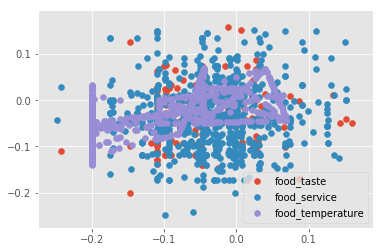


Training Fresh


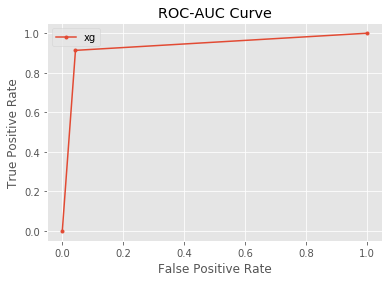


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.89      0.92      0.91       304
      food_taste       0.63      0.44      0.52        59
food_temperature       0.97      0.99      0.98       307

        accuracy                           0.91       670
       macro avg       0.83      0.79      0.80       670
    weighted avg       0.91      0.91      0.91       670


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.8693776553207195	
 2. F1 Score: 0.9134328358208955	
 3. Average absolute error: 0.06 degrees


In [49]:
model('xg', 'food', 'ADASYN')


Beginning the Voting Classifier Model Processing
Counter({'food_service': 934, 'food_taste': 157, 'food_temperature': 32})

 Viewing class scattered distribution


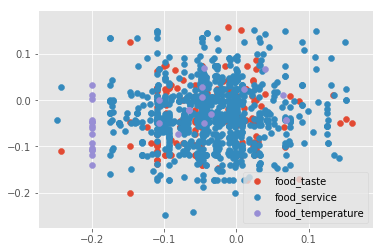


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


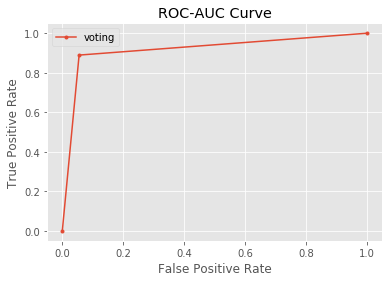


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.91      0.97      0.94       314
      food_taste       0.67      0.43      0.52        47
food_temperature       1.00      0.60      0.75        10

        accuracy                           0.89       371
       macro avg       0.86      0.66      0.74       371
    weighted avg       0.88      0.89      0.88       371


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.7364934890803306	
 2. F1 Score: 0.889487870619946	
 3. Average absolute error: 0.07 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'food_taste': 934, 'food_service': 934, 'food_temperature': 406})

 Viewing class scattered distribution


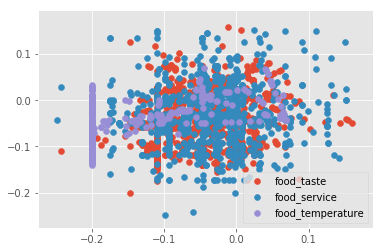


Training Fresh


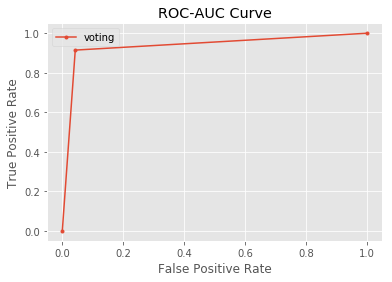


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.90      0.90      0.90       317
      food_taste       0.91      0.92      0.92       308
food_temperature       0.96      0.94      0.95       126

        accuracy                           0.91       751
       macro avg       0.92      0.92      0.92       751
    weighted avg       0.91      0.91      0.91       751


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.9358264476979988	
 2. F1 Score: 0.914780292942743	
 3. Average absolute error: 0.06 degrees


In [53]:
model('voting', 'food', 'SMOTE')


Beginning the Voting Classifier Model Processing
Counter({'food_service': 934, 'food_taste': 157, 'food_temperature': 32})

 Viewing class scattered distribution


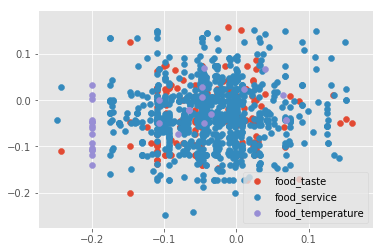


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


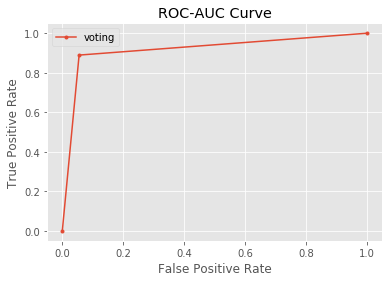


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.91      0.97      0.94       314
      food_taste       0.67      0.43      0.52        47
food_temperature       1.00      0.60      0.75        10

        accuracy                           0.89       371
       macro avg       0.86      0.66      0.74       371
    weighted avg       0.88      0.89      0.88       371


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.7364934890803306	
 2. F1 Score: 0.889487870619946	
 3. Average absolute error: 0.07 degrees

 Fixing Imbalance

 Using ADA SYN

 After fixing imbalance
Counter({'food_temperature': 937, 'food_service': 934, 'food_taste': 157})

 Viewing class scattered distribution


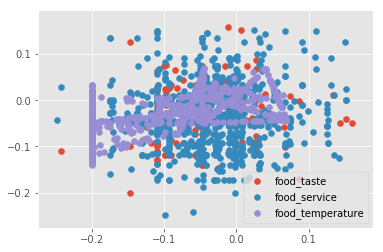


Training Fresh


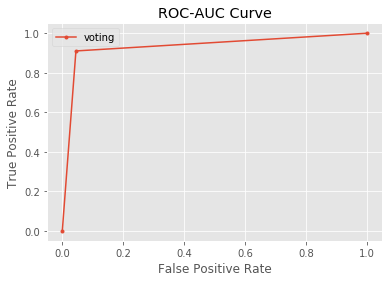


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.88      0.93      0.91       304
      food_taste       0.61      0.37      0.46        59
food_temperature       0.97      0.99      0.98       307

        accuracy                           0.91       670
       macro avg       0.82      0.77      0.78       670
    weighted avg       0.90      0.91      0.90       670


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.8580904890360607	
 2. F1 Score: 0.9104477611940298	
 3. Average absolute error: 0.06 degrees


In [54]:
model('voting', 'food', 'ADASYN')


Beginning the Decision Tree Classification Model Processing
Counter({'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39, 'cabin_fragrance': 20})

 Viewing class scattered distribution


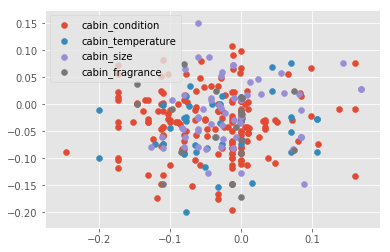


 Training without fixing imbalance


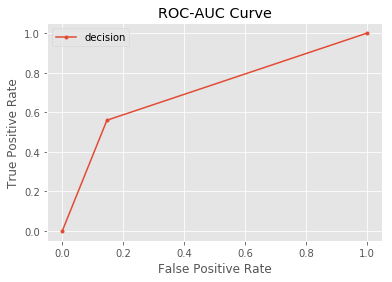


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.65      0.81      0.72        57
  cabin_fragrance       0.17      0.11      0.13         9
       cabin_size       0.47      0.37      0.41        19
cabin_temperature       0.25      0.13      0.17        15

         accuracy                           0.56       100
        macro avg       0.38      0.35      0.36       100
     weighted avg       0.51      0.56      0.53       100


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.5767736212200656	
 2. F1 Score: 0.56	
 3. Average absolute error: 0.22 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'cabin_condition': 182, 'cabin_size': 182, 'cabin_temperature': 103, 'cabin_fragrance': 86})

 Viewing class scattered distribution


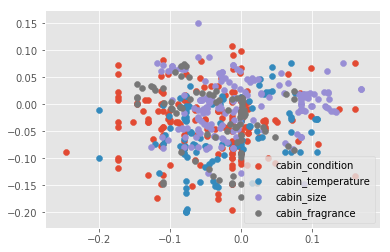


Training Fresh


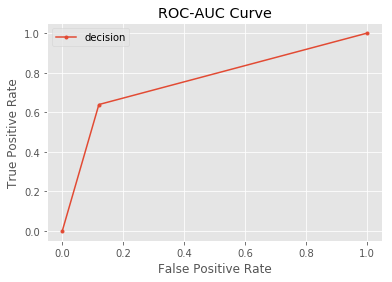


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.59      0.59      0.59        61
  cabin_fragrance       0.58      0.81      0.68        26
       cabin_size       0.82      0.67      0.74        61
cabin_temperature       0.53      0.54      0.54        35

         accuracy                           0.64       183
        macro avg       0.63      0.65      0.64       183
     weighted avg       0.65      0.64      0.64       183


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.7654687177234687	
 2. F1 Score: 0.639344262295082	
 3. Average absolute error: 0.18 degrees


In [55]:
model('decision', 'cabin', 'SMOTE')


Beginning the Decision Tree Classification Model Processing
Counter({'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39, 'cabin_fragrance': 20})

 Viewing class scattered distribution


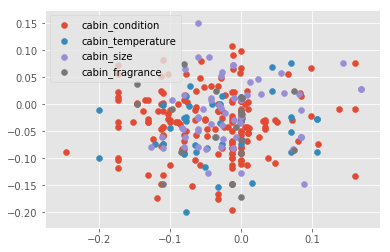


 Training without fixing imbalance


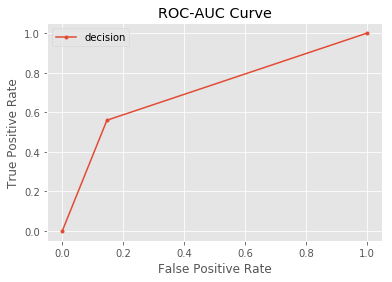


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.65      0.81      0.72        57
  cabin_fragrance       0.17      0.11      0.13         9
       cabin_size       0.47      0.37      0.41        19
cabin_temperature       0.25      0.13      0.17        15

         accuracy                           0.56       100
        macro avg       0.38      0.35      0.36       100
     weighted avg       0.51      0.56      0.53       100


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.5767736212200656	
 2. F1 Score: 0.56	
 3. Average absolute error: 0.22 degrees

 Fixing Imbalance

 Using ADA SYN

 After fixing imbalance
Counter({'cabin_fragrance': 188, 'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39})

 Viewing class scattered distribution


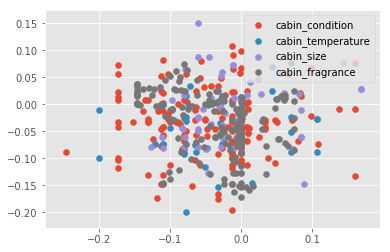


Training Fresh


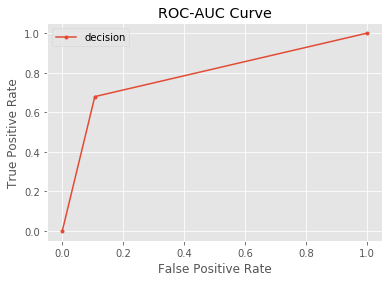


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.66      0.64      0.65        61
  cabin_fragrance       0.80      0.88      0.84        64
       cabin_size       0.53      0.47      0.50        19
cabin_temperature       0.20      0.17      0.18        12

         accuracy                           0.68       156
        macro avg       0.55      0.54      0.54       156
     weighted avg       0.67      0.68      0.67       156


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.7097556493144519	
 2. F1 Score: 0.6794871794871795	
 3. Average absolute error: 0.16 degrees


In [56]:
model('decision','cabin','ADASYN')


Beginning the Random Forest Classification Model Processing
Counter({'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39, 'cabin_fragrance': 20})

 Viewing class scattered distribution


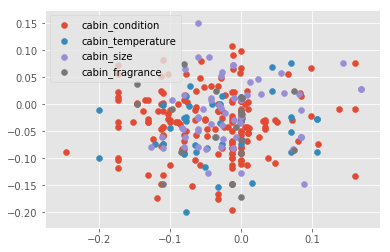


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


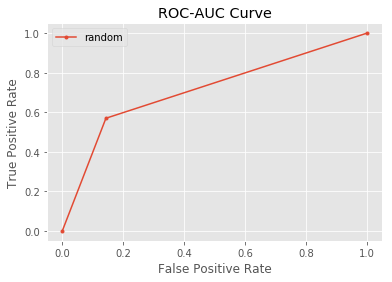


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.59      0.89      0.71        57
  cabin_fragrance       0.33      0.11      0.17         9
       cabin_size       0.57      0.21      0.31        19
cabin_temperature       0.25      0.07      0.11        15

         accuracy                           0.57       100
        macro avg       0.44      0.32      0.32       100
     weighted avg       0.51      0.57      0.50       100


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.546847283829788	
 2. F1 Score: 0.57	
 3. Average absolute error: 0.22 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'cabin_condition': 182, 'cabin_size': 182, 'cabin_temperature': 117, 'cabin_fragrance': 102})

 Viewing class scattered distribution


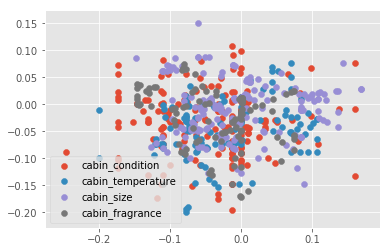


Training Fresh


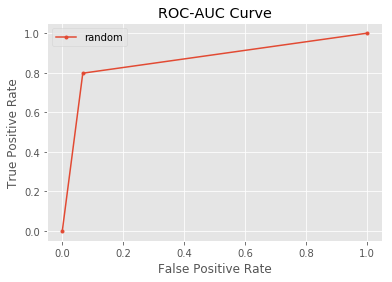


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.69      0.74      0.72        58
  cabin_fragrance       0.83      0.77      0.80        31
       cabin_size       0.89      0.87      0.88        62
cabin_temperature       0.80      0.79      0.80        42

         accuracy                           0.80       193
        macro avg       0.80      0.79      0.80       193
     weighted avg       0.80      0.80      0.80       193


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.8617793376444927	
 2. F1 Score: 0.7979274611398963	
 3. Average absolute error: 0.1 degrees


In [57]:
model('random', 'cabin', 'SMOTE')


Beginning the Random Forest Classification Model Processing
Counter({'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39, 'cabin_fragrance': 20})

 Viewing class scattered distribution


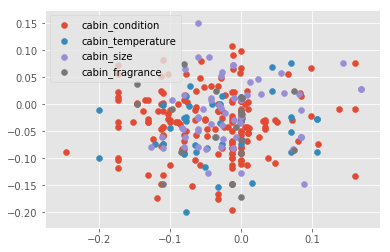


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


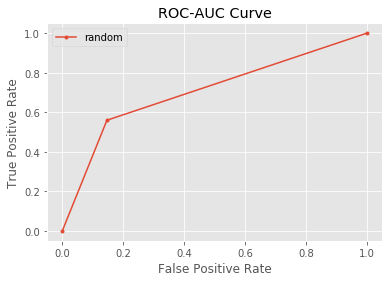


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.58      0.89      0.70        57
  cabin_fragrance       0.33      0.11      0.17         9
       cabin_size       0.60      0.16      0.25        19
cabin_temperature       0.25      0.07      0.11        15

         accuracy                           0.56       100
        macro avg       0.44      0.31      0.31       100
     weighted avg       0.51      0.56      0.48       100


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.535997592849538	
 2. F1 Score: 0.56	
 3. Average absolute error: 0.22 degrees

 Fixing Imbalance

 Using ADA SYN

 After fixing imbalance
Counter({'cabin_fragrance': 188, 'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39})

 Viewing class scattered distribution


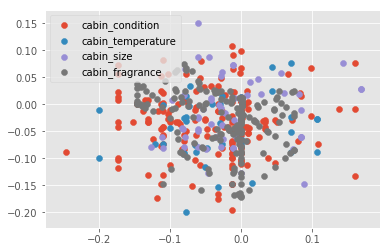


Training Fresh


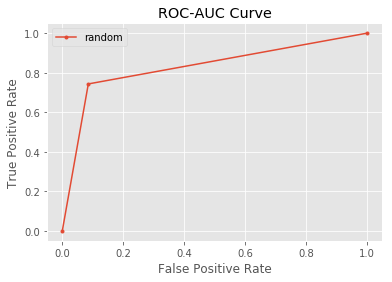


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.64      0.85      0.73        61
  cabin_fragrance       0.88      0.95      0.92        64
       cabin_size       0.50      0.11      0.17        19
cabin_temperature       0.50      0.08      0.14        12

         accuracy                           0.74       156
        macro avg       0.63      0.50      0.49       156
     weighted avg       0.71      0.74      0.69       156


Metrics for random trained on Original Data
 1. ROC AUC Score: 0.697552230424652	
 2. F1 Score: 0.7435897435897437	
 3. Average absolute error: 0.13 degrees


In [58]:
model('random', 'cabin', 'ADASYN')


Beginning the XG Boost Classification Model Processing

 Using MULTICLASS SOFTMAX classification approach for XG Boost since there are 4 classes

Counter({'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39, 'cabin_fragrance': 20})

 Viewing class scattered distribution


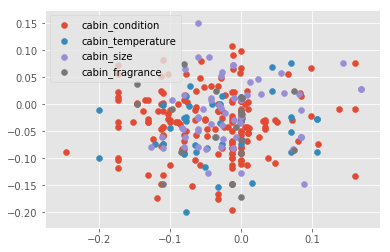


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


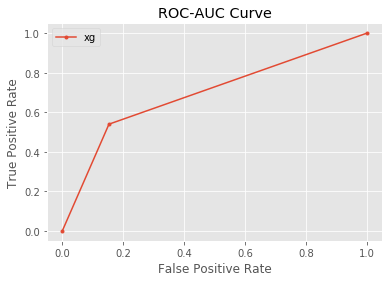


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.61      0.77      0.68        57
  cabin_fragrance       0.17      0.11      0.13         9
       cabin_size       0.46      0.32      0.37        19
cabin_temperature       0.33      0.20      0.25        15

         accuracy                           0.54       100
        macro avg       0.39      0.35      0.36       100
     weighted avg       0.50      0.54      0.51       100


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.5669643219166823	
 2. F1 Score: 0.54	
 3. Average absolute error: 0.23 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'cabin_condition': 182, 'cabin_size': 182, 'cabin_temperature': 119, 'cabin_fragrance': 99})

 Viewing class scattered distribution


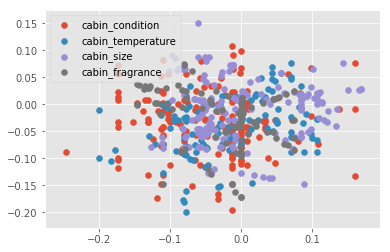


Training Fresh


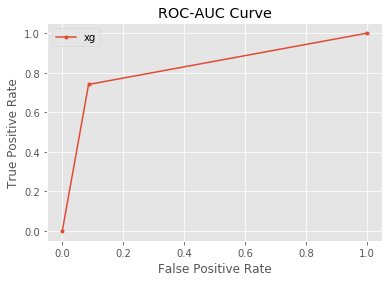


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.62      0.66      0.64        56
  cabin_fragrance       0.77      0.83      0.80        29
       cabin_size       0.82      0.78      0.80        63
cabin_temperature       0.79      0.73      0.76        45

         accuracy                           0.74       193
        macro avg       0.75      0.75      0.75       193
     weighted avg       0.75      0.74      0.74       193


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.8304274087234566	
 2. F1 Score: 0.7409326424870466	
 3. Average absolute error: 0.13 degrees


In [59]:
model('xg', 'cabin', 'SMOTE')


Beginning the XG Boost Classification Model Processing

 Using MULTICLASS SOFTMAX classification approach for XG Boost since there are 4 classes

Counter({'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39, 'cabin_fragrance': 20})

 Viewing class scattered distribution


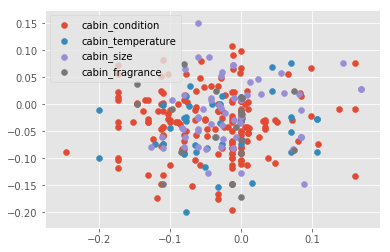


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


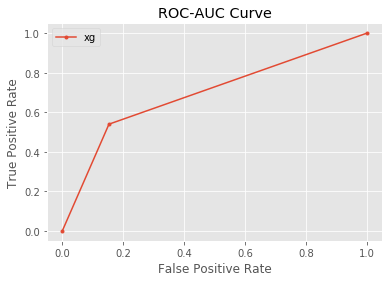


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.61      0.77      0.68        57
  cabin_fragrance       0.17      0.11      0.13         9
       cabin_size       0.46      0.32      0.37        19
cabin_temperature       0.33      0.20      0.25        15

         accuracy                           0.54       100
        macro avg       0.39      0.35      0.36       100
     weighted avg       0.50      0.54      0.51       100


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.5669643219166823	
 2. F1 Score: 0.54	
 3. Average absolute error: 0.23 degrees

 Fixing Imbalance

 Using ADA SYN

 After fixing imbalance
Counter({'cabin_fragrance': 188, 'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39})

 Viewing class scattered distribution


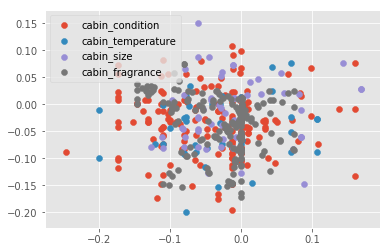


Training Fresh


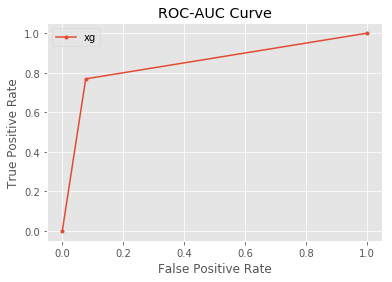


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.73      0.79      0.76        61
  cabin_fragrance       0.91      0.98      0.95        64
       cabin_size       0.50      0.21      0.30        19
cabin_temperature       0.38      0.42      0.40        12

         accuracy                           0.77       156
        macro avg       0.63      0.60      0.60       156
     weighted avg       0.75      0.77      0.75       156


Metrics for xg trained on Original Data
 1. ROC AUC Score: 0.7573761896244224	
 2. F1 Score: 0.7692307692307693	
 3. Average absolute error: 0.12 degrees


In [60]:
model('xg', 'cabin', 'ADASYN')


Beginning the Voting Classifier Model Processing
Counter({'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39, 'cabin_fragrance': 20})

 Viewing class scattered distribution


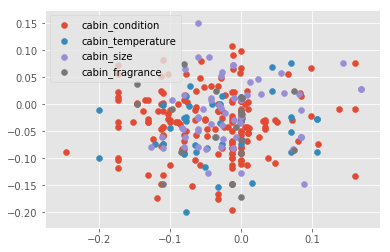


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


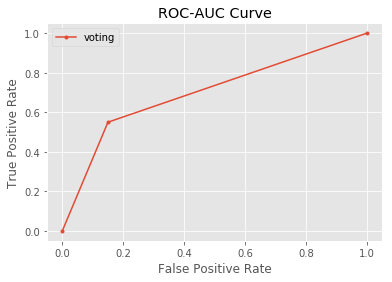


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.59      0.86      0.70        57
  cabin_fragrance       0.33      0.11      0.17         9
       cabin_size       0.50      0.21      0.30        19
cabin_temperature       0.17      0.07      0.10        15

         accuracy                           0.55       100
        macro avg       0.40      0.31      0.31       100
     weighted avg       0.49      0.55      0.48       100


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.5408839093145619	
 2. F1 Score: 0.55	
 3. Average absolute error: 0.22 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'cabin_condition': 182, 'cabin_size': 182, 'cabin_temperature': 132, 'cabin_fragrance': 106})

 Viewing class scattered distribution


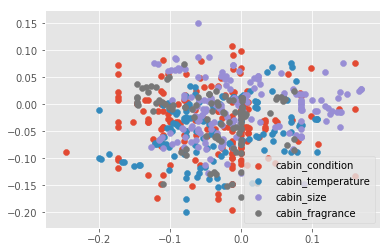


Training Fresh


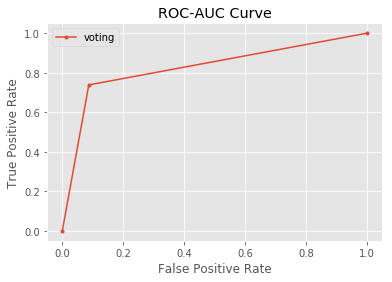


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.60      0.70      0.65        61
  cabin_fragrance       0.82      0.88      0.85        32
       cabin_size       0.83      0.67      0.74        60
cabin_temperature       0.80      0.78      0.79        46

         accuracy                           0.74       199
        macro avg       0.76      0.76      0.76       199
     weighted avg       0.75      0.74      0.74       199


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.8333428547013277	
 2. F1 Score: 0.7386934673366834	
 3. Average absolute error: 0.13 degrees


In [61]:
model('voting', 'cabin', 'SMOTE')


Beginning the Voting Classifier Model Processing
Counter({'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39, 'cabin_fragrance': 20})

 Viewing class scattered distribution


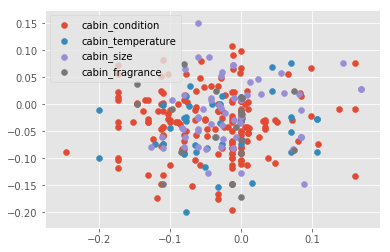


 Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach


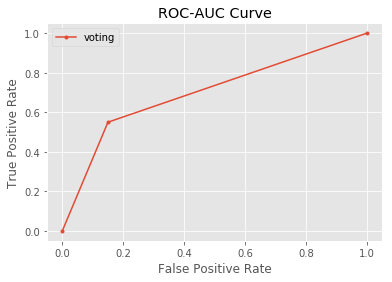


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.59      0.86      0.70        57
  cabin_fragrance       0.33      0.11      0.17         9
       cabin_size       0.50      0.21      0.30        19
cabin_temperature       0.17      0.07      0.10        15

         accuracy                           0.55       100
        macro avg       0.40      0.31      0.31       100
     weighted avg       0.49      0.55      0.48       100


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.5408839093145619	
 2. F1 Score: 0.55	
 3. Average absolute error: 0.22 degrees

 Fixing Imbalance

 Using ADA SYN

 After fixing imbalance
Counter({'cabin_fragrance': 188, 'cabin_condition': 182, 'cabin_size': 61, 'cabin_temperature': 39})

 Viewing class scattered distribution


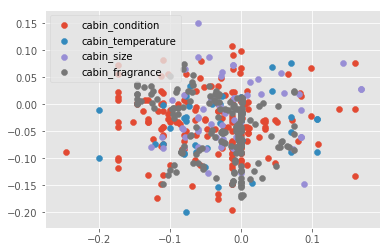


Training Fresh


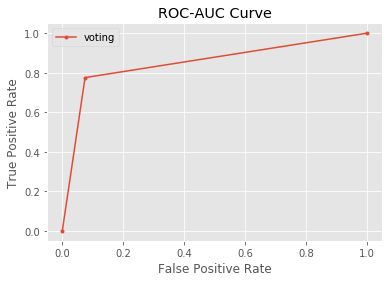


 Classification Report is as follows
                   precision    recall  f1-score   support

  cabin_condition       0.68      0.82      0.75        61
  cabin_fragrance       0.89      0.98      0.93        64
       cabin_size       0.71      0.26      0.38        19
cabin_temperature       0.60      0.25      0.35        12

         accuracy                           0.78       156
        macro avg       0.72      0.58      0.60       156
     weighted avg       0.77      0.78      0.75       156


Metrics for voting trained on Original Data
 1. ROC AUC Score: 0.7449569764940605	
 2. F1 Score: 0.7756410256410257	
 3. Average absolute error: 0.11 degrees


In [62]:
model('voting', 'cabin', 'ADASYN')

# Run on User Input

## User input Methods

In [63]:
def decision(string1, string2, string3, ndf):
    X,y, df = getData(string2)
    print("\nBeginning the Decision Tree Classification Model Processing")
    dclf = DecisionTreeClassifier(random_state=0)
        
    counter = Counter(y)
    print(counter)
        
    classDist(X, y, counter)
        
    print("\n Training without fixing imbalance")
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    dclf.fit(X_train, y_train)
    pred = dclf.predict(X_test)
        
    evaluations(dclf, y_test, pred, string1)
        
    print("\n Fixing Imbalance")
    if (string3 == 'SMOTE'):
        print("\nUsing SMOTE")
        X,y = smote_oversampling(X,y)
        
    elif (string3 == 'ADASYN'):
        print("\n Using ADA SYN")
        X,y = adasyn_oversampling(X,y)
    
    counter = Counter(y)
    print("\n After fixing imbalance")
    print(counter)
        
    classDist(X, y, counter)
        
    print("\nTraining Fresh")
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    dclf.fit(X_train, y_train)
    pred = dclf.predict(X_test)
        
    evaluations(dclf, y_test, pred, string1)
    
    print("\n")
    print("\n")
    print("Predictions for User Input\n")
    print("\n")
    print(dclf.predict(ndf))
  

In [64]:
def random1(string1, string2, string3, ndf):
    X,y, df = getData(string2)
    print("\nBeginning the Random Forest Classification Model Processing")
    rclf = RandomForestClassifier(n_estimators=150)
        
    counter = Counter(y)
    print(counter)
        
    classDist(X, y, counter)
        
    print("\n Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach")
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    rclf.fit(X_train, y_train)
    pred = rclf.predict(X_test)
        
    evaluations(rclf, y_test, pred, string1)
        
    print("\n Fixing Imbalance")
        
    if (string3 == 'SMOTE'):
        print("\nUsing SMOTE")
        X,y = smote_oversampling(X,y)
        
    elif (string3 == 'ADASYN'):
        print("\n Using ADA SYN")
        X,y = adasyn_oversampling(X,y)
    counter = Counter(y)
    print("\n After fixing imbalance")
    print(counter)
        
    classDist(X, y, counter)
        
    print("\nTraining Fresh")
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    rclf.fit(X_train, y_train)
    pred = rclf.predict(X_test)
        
    evaluations(rclf, y_test, pred, string1)
    print("\n")
    print("\n")
    print("Predictions for User Input\n")
    print("\n")
    print(rclf.predict(ndf))
    

In [65]:
def svm1(string1, string2, string3, ndf):
    X,y, df = getData(string2)
    print("\nBeginning the Linear Support Vector Machine Classification Model Processing")
    lin_clf = svm.LinearSVC()
        
    counter = Counter(y)
    print(counter)
        
    classDist(X, y, counter)
        
    print("\n Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach")
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    lin_clf.fit(X_train, y_train)
    pred = lin_clf.predict(X_test)
        
    evaluations(lin_clf, y_test, pred, string1)
        
    print("\n Fixing Imbalance")
        
    if (string3 == 'SMOTE'):
        print("\nUsing SMOTE")
        X,y = smote_oversampling(X,y)
        
    elif (string3 == 'ADASYN'):
        print("\n Using ADA SYN")
        X,y = adasyn_oversampling(X,y)
    counter = Counter(y)
    print("\n After fixing imbalance")
    print(counter)
        
    classDist(X, y, counter)
        
    print("\nTraining Fresh")
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    lin_clf.fit(X_train, y_train)
    pred = lin_clf.predict(X_test)
        
    evaluations(lin_clf, y_test, pred, string1)
    

    print("\n")
    print("\n")
    print("Predictions for User Input\n")
    print("\n")
    print(lin_clf.predict(ndf))
    

In [66]:
def xg(string1, string2, string3, ndf):
    X,y, df = getData(string2)
    print("\nBeginning the XG Boost Classification Model Processing")
    countClass = list(Counter(y))
    if len(countClass) == 2:
        print("\n Using LOGISTIC BINARY classification for XG Boost since there are only "+str(len(countClass))+" classes\n")
        xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)#objective="multi:softprob", random_state=42)
        counter = Counter(y)
        print(counter)
        
        classDist(X, y, counter)
        
        print("\n Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach")
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        xgb_model.fit(X_train, y_train)
        pred = xgb_model.predict(X_test)
        
        evaluations(xgb_model, y_test, pred, string1)
        
        print("\n Fixing Imbalance")
        
        if (string3 == 'SMOTE'):
            print("\nUsing SMOTE")
            X,y = smote_oversampling(X,y)
        
        elif (string3 == 'ADASYN'):
            print("\n Using ADA SYN")
            X,y = adasyn_oversampling(X,y)
        
        counter = Counter(y)
        print("\n After fixing imbalance")
        print(counter)
        
        classDist(X, y, counter)
        
        print("\nTraining Fresh")
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        xgb_model.fit(X_train, y_train)
        pred = xgb_model.predict(X_test)
        
        evaluations(xgb_model, y_test, pred, string1)
    else:
        print("\n Using MULTICLASS SOFTMAX classification approach for XG Boost since there are "+str(len(countClass))+" classes\n")
        xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
        counter = Counter(y)
        print(counter)
        
        classDist(X, y, counter)
        
        print("\n Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach")
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        xgb_model.fit(X_train, y_train)
        pred = xgb_model.predict(X_test)
        
        evaluations(xgb_model, y_test, pred, string1)
        
        print("\n Fixing Imbalance")
        
        if (string3 == 'SMOTE'):
            print("\nUsing SMOTE")
            X,y = smote_oversampling(X,y)
        
        elif (string3 == 'ADASYN'):
            print("\n Using ADA SYN")
            X,y = adasyn_oversampling(X,y)
        
        counter = Counter(y)
        print("\n After fixing imbalance")
        print(counter)
        
        classDist(X, y, counter)
        
        print("\nTraining Fresh")
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        xgb_model.fit(X_train, y_train)
        pred = xgb_model.predict(X_test)
        
        evaluations(xgb_model, y_test, pred, string1)
        
        print("\n")
        print("\n")
        print("Predictions for User Input\n")
        print("\n")
        print(xgb_model.predict(ndf))

In [67]:
def voting(string1, string2, ndf):
    rnf = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 42)
    xtratree =  ExtraTreesClassifier(n_jobs=-1, random_state=42, bootstrap=True, max_depth=100,
                                  max_features= 3, min_samples_leaf= 3, min_samples_split= 10,
                                  n_estimators=200, class_weight='balanced_subsample', )
    dtree = DecisionTreeClassifier(splitter='random',random_state=42)
    bag = BaggingClassifier(random_state=42, base_estimator=dtree)
    estimators=[('rnf', rnf),('bag', bag), ('extra', xtratree)]
    ensemble = VotingClassifier(estimators, voting='hard')
    
    X,y, df = getData(string2)
    print("\nBeginning the Voting Classifier Model Processing")
    
        
    counter = Counter(y)
    print(counter)
        
    classDist(X, y, counter)
        
    print("\n Training without fixing imbalance to see if improvement with SVM SMOTE oversampling approach")
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    ensemble.fit(X_train, y_train)
    pred = ensemble.predict(X_test)
        
    evaluations(ensemble, y_test, pred, string1)
        
    print("\n Fixing Imbalance")
        
    if (string3 == 'SMOTE'):
        print("\nUsing SMOTE")
        X,y = smote_oversampling(X,y)
        
    elif (string3 == 'ADASYN'):
        print("\n Using ADA SYN")
        X,y = adasyn_oversampling(X,y)
        
    counter = Counter(y)
    print("\n After fixing imbalance")
    print(counter)
        
    classDist(X, y, counter)
        
    print("\nTraining Fresh")
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    ensemble.fit(X_train, y_train)
    pred = ensemble.predict(X_test)
        
    evaluations(ensemble, y_test, pred, string1)
    
    print("\n")
    print("\n")
    print("Predictions for User Input\n")
    print("\n")
    print(ensemble.predict(ndf))

In [68]:
def modelTest(string1, string2, string3, df):
    #try:
        if (string1=='decision'):
            decision(string1, string2, string3, df)
        elif (string1 == 'random'):
            random1(string1, string2, string3, df)
        elif (string1 == 'svm'):
            svm1(string1, string2, string3, df)
        elif (string1 == 'xg' or string1=='xgboost'):
            xg(string1, string2, string3, df)
        elif(string1=='voting'):
            voting(string1, string2, string3, df)
        else:
            print(string1+" is not a model")
    #except:
       # print("Invalid entity name")
     #   pass;

In [69]:
def tokenize(sent):
    #Tokenize
    sent = sent.lower()
    sentTkn = sent.split()
    w = []
    for word in sentTkn:
        if word in corpus:
            w.append(word)
        else:
            print("From the sentence "+word+" is not an aspect term, hence will not be processed\n")
    print("Aspect terms are as follows:\n")
    for asp in w:
        print(asp)
    return w

In [70]:
def parsing(sent, labels):
    sent = sent.lower()
    dep_parser = nltk.parse.CoreNLPDependencyParser(url='http://localhost:9000')
    nnlp = StanfordCoreNLP('http://localhost:9000')
    
    output = nnlp.annotate(str(sent),
                          properties = {
                              'annotators' : 'tokenize, ssplit, pos, depparse, parse',
                              'outputFormat':'json'
                          })
    
    par, = dep_parser.raw_parse(sent)

    tokens = output['sentences'][0]['tokens']
    ab = output['sentences'][0]['enhancedDependencies']
  
    xl = par.nodes
    sentTkn = sent.split()
    combo = []
    for i in range(len(ab)):
        for j in range(len(tokens)):
            for k,v in xl.items():
                for lb in labels:
                    for m in range(len(sentTkn)):
                        if (lb == ab[i]['governorGloss'] and xl[k]['word'] == lb): 
                            if(ab[i]['dependentGloss'] == tokens[j]['word'] and ab[i]['dependentGloss'] == sentTkn[m]):
                                if (m == 0):
                                    comb = (lb, xl[k]['tag'], ab[i]['dependentGloss'], tokens[j]['pos'], ab[i]['dep'], '', sentTkn[m+1])
                                    combo.append(comb)
                                elif (m == len(sentTkn)-1):
                                    comb = (lb, xl[k]['tag'], ab[i]['dependentGloss'], tokens[j]['pos'], ab[i]['dep'],  sentTkn[m-1], '')
                                    combo.append(comb)
                                else:
                                    comb = (lb, xl[k]['tag'], ab[i]['dependentGloss'], tokens[j]['pos'], ab[i]['dep'],  sentTkn[m-1], sentTkn[m+1])
                                    combo.append(comb)
                        elif (lb == ab[i]['dependentGloss'] and xl[k]['word'] == lb): 
                            if (ab[i]['governorGloss'] == tokens[j]['word']):
                                if (m == 0):
                                    comb = (lb, xl[k]['tag'], ab[i]['dependentGloss'], tokens[j]['pos'], ab[i]['dep'], '', sentTkn[m+1])
                                    combo.append(comb)
                                elif (m == len(sentTkn)-1):
                                    comb = (lb, xl[k]['tag'], ab[i]['dependentGloss'], tokens[j]['pos'], ab[i]['dep'],  sentTkn[m-1], '')
                                    combo.append(comb)
                                else:
                                    comb = (lb, xl[k]['tag'], ab[i]['dependentGloss'], tokens[j]['pos'], ab[i]['dep'],  sentTkn[m-1], sentTkn[m+1])
                                    combo.append(comb)
    combo = list(set(combo))
    
    return combo

In [71]:
def word2features(doc):
    word = doc[0]
    wordPos = doc[1]
    depWord = doc[2]
    depWordPos = doc[3]
    depTag = doc[4]
    previousWord = doc[5]
    nextWord = doc[-1]

    features = [
        'bias',
        'word.lower=' + word.lower(),
        'previousWord' + previousWord,
        'nextWord=' +nextWord,
        'wordLen=' + str(len(word)),
        'posTag=' + wordPos,
        'depWord=' + str (depWord),
        'depWordPos=' + depWordPos,
        'depTag=' + depTag
        
    ]


    return features

def extract_features(doc):
    return [word2features(doc) for i in range(len(doc))]

In [72]:
def testVectorizing(sent, stop_words, df_data):
    
    reviews = []
    reviews.append(sent)
    
    transformer = TfidfTransformer()
    cvec = CountVectorizer(stop_words=stop_words)
    tokenizer = Tokenizer(num_words = 5000)
    sf = cvec.fit_transform(reviews)
    
    transformed_weights = transformer.fit_transform(sf)
    
    weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
    weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
    
    dff=weights_df.sort_values(by='weight', ascending=False)
    
    df_data['main_s']=df_data['main'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: round(float(dff[dff['term']==x]['weight']),7) if x in list(dff['term']) else 0)
    df_data['dep_s']=df_data['dep'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: round(float(dff[dff['term']==x]['weight']),7) if x in list(dff['term']) else 0)
    df_data['prev_s']=df_data['prev'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: round(float(dff[dff['term']==x]['weight']),7) if x in list(dff['term']) else 0)
    df_data['next_s']=df_data['next'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: round(float(dff[dff['term']==x]['weight']),7) if x in list(dff['term']) else 0)
    
    
    lst1= []
    for i in zip(df_data['main'],df_data['dep']):
        try:
            lst1.append(float(cosine_distance_between_two_words(i[0],i[1])))
        except:
            lst1.append(float(0))
            continue;
    df_data['dep_d']=lst1
    
    lst2=[]
    for i in zip(df_data['main'],df_data['prev']):
        try:
            lst2.append(float(cosine_distance_between_two_words(i[0],i[1])))
        except:
            lst2.append(float(0))
            continue;
    df_data['prev_d']=lst2

    lst3=[]
    for i in zip(df_data['main'],df_data['next']):
        try:
            lst3.append(float(cosine_distance_between_two_words(i[0],i[1])))
        except:
            lst3.append(float(0))
            continue;
    df_data['next_d']=lst3
    
    
    df_data['main_s']=df_data['main'].apply(lambda x: float(format(wvec[x].mean(), '.8f')) if x in wvec.keys() else 0)
    df_data['dep_s']=df_data['dep'].apply(lambda x: float(format(wvec[x].mean(), '.8f')) if x in wvec.keys() else 0)
    df_data['prev_s']=df_data['prev'].apply(lambda x: float(format(wvec[x].mean(), '.8f')) if x in wvec.keys() else 0)
    df_data['next_s']=df_data['next'].apply(lambda x: float(format(wvec[x].mean(), '.8f')) if x in wvec.keys() else 0)
    
    
    df_main_pos=pd.get_dummies(df_data['main_pos'],prefix='main_pos')
    df_dep_pos=pd.get_dummies(df_data['dep_pos'],prefix='dep_pos')
    df_dep_tag=pd.get_dummies(df_data['dep_tag'],prefix='dep_tag')
    
    
    df_data2=pd.concat([df_data,df_main_pos,df_dep_pos,df_dep_tag], axis=1)
    
    new_columns=['main_s','dep_s', 'prev_s', 'next_s','main_sent'] + list(df_main_pos.columns)+ list(df_dep_pos.columns)+ list(df_dep_tag.columns)
    
    
    df_data3=df_data2[new_columns]
    
    #df_data3['Aspect']=df_data3['Aspect'].str.lower()
    
    x_columns=['main_s','dep_s', 'prev_s', 'next_s','main_sent'] + list(df_main_pos.columns)+ list(df_dep_pos.columns)+ list(df_dep_tag.columns)
    
    return df_data3, x_columns

In [85]:
def getImplicitAspects(X, prediction, labels, combination, string1, string3, df):
    finT = []
    
    for i in range(len(X)):
        t = []
        for j in range(len(X[i])):
            for f in X[i][j]:
                if f.startswith('word.lower='):
                    t.append(f.split('word.lower=')[1])
        t = list(set(t))
        finT.append(t[0])
        
    p = []
    for i in range(len(prediction)):
        p.append(list(set(prediction[i]))[0])
        
    faspect = []
    iaspect = []
    staspect = []
    oaspect = []
    easpect = []
    paspect = []
    saspect = []
    caspect = []
    
    for lb in labels:
        for i in range(len(finT)):
            for j in range(len(p)):
                if (lb == finT[i]):
                    if (i==j):
                        if (p[j] == 'f'):
                            faspect.append(finT[i])
                        elif(p[j] == 'i'):
                            iaspect.append(finT[i])
                        elif(p[j] == 's'):
                            saspect.append(finT[i])
                        elif(p[j] == 'o'):
                            oaspect.append(finT[i])
                        elif(p[j] == 'e'):
                            easpect.append(finT[i])
                        elif(p[j] == 'p'):
                            paspect.append(finT[i])
                        elif(p[j] == 'st'):
                            staspect.append(finT[i])
                        else:
                            caspect.append(finT[i])
    faspect = list(set(faspect))
    iaspect = list(set(iaspect))
    caspect = list(set(caspect))
    easpect = list(set(easpect))
    saspect = list(set(saspect))
    staspect = list(set(staspect))
    paspect = list(set(paspect))
    oaspect = list(set(oaspect))
    
    if (faspect!=[]):
        print("Explicitly mentioned Food aspects are:\n", faspect)
        print("\n Running Classification on Food aspects by training Original data\n")
        print("\n Entered model is "+string1.upper()+" and imbalance handling techinque is "+string3+"\n")
        mdl = modelTest(string1, 'food', string3, df)
        pred = mdl.predict(df)
        print(pred)
    if (iaspect!=[]):
        print("Explicitly mentioned Inflight aspects are:\n", iaspect)
        print("\n Running Classification on Inflight aspects by training Original data\n")
        print("\n Entered model is "+string1.upper()+" and imbalance handling techinque is "+string3+"\n")
        mdl = modelTest(string1, 'inflight', string3, df)
    if (caspect!=[]):
        print("Explicitly mentioned Cabin aspects are:\n", caspect)
        print("\n Running Classification on Cabin aspects by training Original data\n")
        print("\n Entered model is "+string1.upper()+" and imbalance handling techinque is "+string3+"\n")
        mdl = modelTest(string1, 'cabin', string3, df)
    if (easpect!=[]):
        print("Explicitly mentioned Entity aspects are:\n", easpect)
        print("\n Running Classification on Entertainment aspects by training Original data\n")
        print("\n Entered model is "+string1.upper()+" and imbalance handling techinque is "+string3+"\n")
        mdl = modelTest(string1, 'entertainment', string3,df)
    if (saspect!=[]):
        print("Explicitly mentioned Seat aspects are:\n", saspect)
        print("\n Running Classification on Seat aspects by training Original data\n")
        print("\n Entered model is "+string1.upper()+" and imbalance handling techinque is "+string3+"\n")
        mdl = modelTest(string1, 'seat', string3, df)
    if (staspect!=[]):
        print("Explicitly mentioned Staff aspects are:\n", staspect)
        print("\n Running Classification on Staff aspects by training Original data\n")
        print("\n Entered model is "+string1.upper()+" and imbalance handling techinque is "+string3+"\n")
        mdl = modelTest(string1, 'staff', string3, df)
    if (paspect!=[]):
        print("Explicitly mentioned Possession aspects are:\n", paspect)
        print("\n Running Classification on Possession aspects by training Original data\n")
        print("\n Entered model is "+string1.upper()+" and imbalance handling techinque is "+string3+"\n")
        mdl = modelTest(string1, 'possession', string3, df)
    if (oaspect!=[]):
        print("Explicitly mentioned Off-flgiht aspects are:\n", oaspect)
        print("\n Running Classification on Off-flgiht aspects by training Original data\n")
        print("\n Entered model is "+string1.upper()+" and imbalance handling techinque is "+string3+"\n")
        mdl = modelTest(string1, 'offflight', string3, df)
    

In [86]:
def getNewCombinations(X, prediction, combination):
    newcombination = []
    for c in combination:
        main, main_pos, dep, dep_pos, dep_tag, prev, nextt = c
        ss = sid.polarity_scores(main)
        main_sent = ss['compound']
        newcombination.append((main, main_pos, dep, dep_pos, main_sent, dep_tag, prev, nextt))
        
    finT = []
    for i in range(len(X)):
        t = []
        for j in range(len(X[i])):
            for f in X[i][j]:
                if f.startswith('word.lower='):
                    t.append(f.split('word.lower=')[1])
        t = list(set(t))
        finT.append(t[0])
        
    p = []
    for i in range(len(prediction)):
        p.append(list(set(prediction[i]))[0])
        
    newCombo = []
    for i in range(len(finT)):
        for j in range(len(p)):
            for c in newcombination:
                main, main_pos, dep, dep_pos, main_sent, dep_tag, prev, nextt = c
                if (i==j and finT[i] == main):
                    newCombo.append((main, main_pos, dep, dep_pos, main_sent, dep_tag, prev, nextt, p[j]))
                    
    return newCombo

In [87]:
def getTestDataFrame(comb, x_columns, stop_words):
    dfTest = pd.DataFrame(comb, columns = ['main', 'main_pos', 'dep', 'dep_pos', 'main_sent', 'dep_tag', 'prev',
       'next', 'entity'])
    dfFinTest, xTestColumns = testVectorizing(sent, stop_words, dfTest)
    
    for cols in x_columns:
        if cols not in dfFinTest.columns:
            dfFinTest[cols] = 0
        
    return dfFinTest

In [76]:
sent = input("Enter your review and will beign the process\n")

Enter your review and will beign the process
Overall the experience was comfortable and spacious with delicious meals


In [77]:
labels = tokenize(sent)

From the sentence the is not an aspect term, hence will not be processed

From the sentence was is not an aspect term, hence will not be processed

From the sentence and is not an aspect term, hence will not be processed

From the sentence with is not an aspect term, hence will not be processed

Aspect terms are as follows:

overall
experience
comfortable
spacious
delicious
meals


In [78]:
combination  = parsing(sent, labels)

In [79]:
X = [extract_features(doc) for doc in combination]
loaded_model = pickle.load(open(r'C:\Users\Kanishk Verma\Desktop\Practicum\Code\finalized_crf_model.sav', 'rb'))
prediction = loaded_model.predict(X)

In [90]:
combination

[('delicious', 'JJ', 'delicious', 'NNS', 'amod', 'and', 'with'),
 ('meals', 'NNS', 'meals', 'JJ', 'obl:with', '', 'the'),
 ('comfortable', 'JJ', 'experience', 'NN', 'nsubj', 'the', 'was'),
 ('overall', 'RB', 'overall', 'JJ', 'advmod', 'delicious', ''),
 ('experience',
  'NN',
  'experience',
  'JJ',
  'nsubj',
  'experience',
  'comfortable'),
 ('overall', 'RB', 'overall', 'JJ', 'advmod', 'and', 'with'),
 ('delicious', 'JJ', 'delicious', 'NNS', 'amod', 'experience', 'comfortable'),
 ('meals', 'NNS', 'meals', 'JJ', 'obl:with', 'the', 'was'),
 ('meals', 'NNS', 'meals', 'JJ', 'obl:with', 'comfortable', 'spacious'),
 ('delicious', 'JJ', 'delicious', 'NNS', 'amod', 'the', 'was'),
 ('meals', 'NNS', 'meals', 'JJ', 'obl:with', 'spacious', 'delicious'),
 ('spacious', 'JJ', 'spacious', 'JJ', 'conj:and', 'was', 'and'),
 ('overall', 'RB', 'overall', 'JJ', 'advmod', 'with', 'meals'),
 ('comfortable', 'JJ', 'was', 'VBD', 'cop', 'experience', 'comfortable'),
 ('spacious', 'JJ', 'spacious', 'JJ', 'con

In [ ]:
def getNewCombinations(X, prediction, combination):
    newcombination = []
    for c in combination:
        main, main_pos, dep, dep_pos, dep_tag, prev, nextt = c
        ss = sid.polarity_scores(main)
        main_sent = ss['compound']
        newcombination.append((main, main_pos, dep, dep_pos, main_sent, dep_tag, prev, nextt))
        
    finT = []
    for i in range(len(X)):
        t = []
        for j in range(len(X[i])):
            for f in X[i][j]:
                if f.startswith('word.lower='):
                    t.append(f.split('word.lower=')[1])
        t = list(set(t))
        finT.append(t[0])
        
    p = []
    for i in range(len(prediction)):
        p.append(list(set(prediction[i]))[0])
        
    newCombo = []
    for i in range(len(finT)):
        for j in range(len(p)):
            for c in newcombination:
                main, main_pos, dep, dep_pos, main_sent, dep_tag, prev, nextt = c
                if (i==j and finT[i] == main):
                    newCombo.append((main, main_pos, dep, dep_pos, main_sent, dep_tag, prev, nextt, p[j]))
                    
    return newCombo

In [80]:
comb = getNewCombinations(X, prediction, combination)

In [83]:
testdf = getTestDataFrame(comb, x_columns, stop_words)
testdf = testdf.iloc[:,:-1]

Explicitly mentioned Food aspects are:
 ['overall', 'spacious', 'delicious', 'meals', 'experience']

 Running Classification on Food aspects by training Original data


 Entered model is DECISION and imbalance handling techinque is SMOTE


Beginning the Decision Tree Classification Model Processing
Counter({'food_service': 934, 'food_taste': 157, 'food_temperature': 32})

 Viewing class scattered distribution


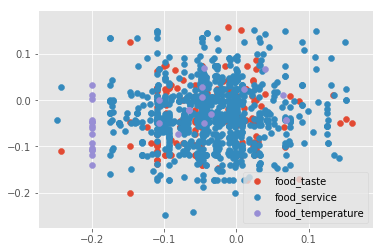


 Training without fixing imbalance


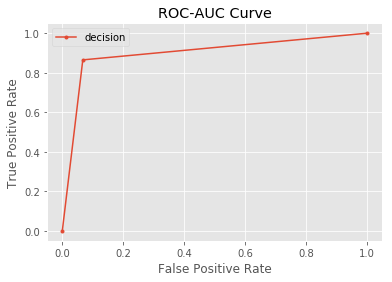


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.93      0.92      0.92       314
      food_taste       0.51      0.55      0.53        47
food_temperature       0.78      0.70      0.74        10

        accuracy                           0.87       371
       macro avg       0.74      0.72      0.73       371
    weighted avg       0.87      0.87      0.87       371


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.7806965849381718	
 2. F1 Score: 0.8652291105121294	
 3. Average absolute error: 0.09 degrees

 Fixing Imbalance

Using SMOTE

 After fixing imbalance
Counter({'food_taste': 934, 'food_service': 934, 'food_temperature': 654})

 Viewing class scattered distribution


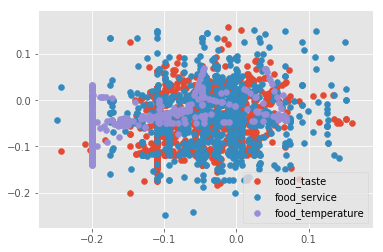


Training Fresh


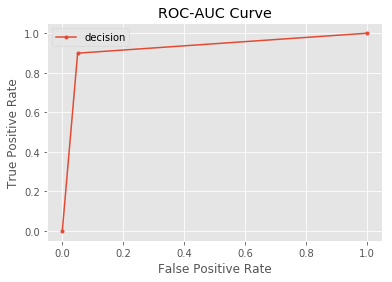


 Classification Report is as follows
                  precision    recall  f1-score   support

    food_service       0.89      0.84      0.86       305
      food_taste       0.85      0.93      0.88       313
food_temperature       1.00      0.95      0.97       215

        accuracy                           0.90       833
       macro avg       0.91      0.90      0.91       833
    weighted avg       0.90      0.90      0.90       833


Metrics for decision trained on Original Data
 1. ROC AUC Score: 0.9251768288731994	
 2. F1 Score: 0.8991596638655462	
 3. Average absolute error: 0.07 degrees




Predictions for User Input





ValueError: Number of features of the model must match the input. Model n_features is 180 and input n_features is 183 

In [88]:
getImplicitAspects(X, prediction, labels, comb, 'decision', 'SMOTE', testdf)

In [ ]:
pred = ['seat_comfort', 'seat_operations', 'seat_comfort', 'seat_comfort',
 'seat_operations','seat_comfort','seat_comfort','seat_comfort',
 'seat_comfort','seat_operations','seat_comfort','seat_comfort',
 'seat_comfort']

In [ ]:
def getPredictions(pred, comb):
    ls = []
    for i in range(len(comb)):
        for j in range(len(pred)):
            main, main_pos, dep, dep_pos, main_sent, dep_tag, prev, nexxt, ent = comb[i]
            ls.append((main, pred[j]))
    
    countls = Counter(ls)
    ab = countls.most_common(len(labels))
    
    dic= {}
    for i in range(len(ab)):
        b, c = ab[i]
        label, aspect = b
    
        dic[label] = aspect
        
    return dic

In [ ]:
final = getPredictions(pred, comb)

In [ ]:
final